In [33]:
## similar to github.com/Michaelvll/DeepCCA main
import torch
import torch.nn as nn
import numpy as np
from linear_gcca import linear_gcca
from synth_data import create_synthData,create_synthData_new
from torch.utils.data import BatchSampler, SequentialSampler, RandomSampler
from models import DeepGCCA
# from utils import load_data, svm_classify
import time
import logging
try:
    import cPickle as thepickle
except ImportError:
    import _pickle as thepickle

import gzip
import numpy as np
import torch.nn as nn

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import pandas as pd

torch.set_default_tensor_type(torch.DoubleTensor)
from main import Solver
from loss_objectives import new_loss

In [34]:
############
# Parameters Section

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using", torch.cuda.device_count(), "GPUs")

# the path to save the final learned features
save_name = './DGCCA.model'

# the size of the new space learned by the model (number of the new features)
outdim_size = 1

# number of layers with nodes in each one
layer_sizes1 = [256, 512, 128, outdim_size]
layer_sizes2 = [256, 512, 128, outdim_size]
layer_sizes3 = [256, 512, 128, outdim_size]
layer_sizes_list = [layer_sizes1, layer_sizes2, layer_sizes3] 

# the parameters for training the network
learning_rate = 5*1e-2
epoch_num = 100
batch_size = 400

# the regularization parameter of the network
# seems necessary to avoid the gradient exploding especially when non-saturating activations are used
reg_par = 1e-5

# specifies if all the singular values should get used to calculate the correlation or just the top outdim_size ones
# if one option does not work for a network or dataset, try the other one
use_all_singular_values = False


apply_linear_gcca = True
# end of parameters section

Using 0 GPUs


In [35]:
N = 400
views = create_synthData_new(N,mode=1,F=20)
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to(device)

U_sum = []
outputs_sum = []
test = []
for i in range(3):
    testm = torch.eye(20)
    test.append(testm)
    
import pandas as pd
for _ in range(100):

    # size of the input for view 1 and view 2
    input_shape_list = [view.shape[-1] for view in views]

    # Building, training, and producing the new features by DCCA
    model = DeepGCCA(layer_sizes_list, input_shape_list, outdim_size,
                             use_all_singular_values, device=device).double()
    l_gcca = None
    if apply_linear_gcca:
        l_gcca = linear_gcca
    solver = Solver(model, l_gcca, outdim_size, epoch_num, batch_size,
                    learning_rate, reg_par, device=device)
    # train1, train2 = data1[0][0], data2[0][0]
    # val1, val2 = data1[1][0], data2[1][0]
    # test1, test2 = data1[2][0], data2[2][0]

    solver.fit(views, checkpoint=save_name)


    # TODO: Save l_gcca model if needed
    _ , _, outputs_def = solver.test(test, apply_linear_gcca)

    A = outputs_def[0]
    B = outputs_def[1]
    C = outputs_def[2]
    U = [A,B,C]

    A = outputs_def[0]
    B = outputs_def[1]
    C = outputs_def[2]

    os = [A,B,C]
    U_sum.append(U)
    outputs_sum.append(os)
    

#variables = pd.DataFrame(U_sum)
#results = pd.DataFrame(results_sum)

[ INFO : 2023-05-31 17:03:19,198 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:03:19,215 ] - Adam (
Parameter Group

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


[ INFO : 2023-05-31 17:03:19,425 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.1007
[ INFO : 2023-05-31 17:03:19,462 ] - Epoch 7/100 - time: 0.04 - training_loss: -6.4605
[ INFO : 2023-05-31 17:03:19,495 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.7306
[ INFO : 2023-05-31 17:03:19,529 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.9417
[ INFO : 2023-05-31 17:03:19,563 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1160
[ INFO : 2023-05-31 17:03:19,596 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2637
[ INFO : 2023-05-31 17:03:19,628 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3892
[ INFO : 2023-05-31 17:03:19,661 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4955
[ INFO : 2023-05-31 17:03:19,694 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5867
[ INFO : 2023-05-31 17:03:19,728 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6660
[ INFO : 2023-05-31 17:03:19,760 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7364
[ INFO : 2023-05-31 17:03:19,794 ] -

[ INFO : 2023-05-31 17:03:22,553 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6737
[ INFO : 2023-05-31 17:03:22,582 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:22,826 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0795
[ INFO : 2023-05-31 17:03:22,859 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2818
[ INFO : 2023-05-31 17:03:22,892 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.4385
[ INFO : 2023-05-31 17:03:22,926 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5677
[ INFO : 2023-05-31 17:03:22,959 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6761
[ INFO : 2023-05-31 17:03:22,992 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7674
[ INFO : 2023-05-31 17:03:23,024 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8452
[ INFO : 2023-05-31 17:03:23,057 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9126
[ INFO : 2023-05-31 17:03:23,093 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9721
[ INFO : 2023-05-31 17:03:23,126 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0249
[ INFO : 2023-05-31 17:03:23,159 ] - Epoch 17/100 - time: 0.03 - training_loss: -8.0719
[ INFO : 2023-05-31 17:03:23,192 ] 

[ INFO : 2023-05-31 17:03:26,045 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:03:26,051 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:03:26,264 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9394
[ INFO : 2023-05-31 17:03:26,297 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1966
[ INFO : 2023-05-31 17:03:26,332 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3859
[ INFO : 2023-05-31 17:03:26,365 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5313
[ INFO : 2023-05-31 17:03:26,397 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6488
[ INFO : 2023-05-31 17:03:26,430 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7469
[ INFO : 2023-05-31 17:03:26,461 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8310
[ INFO : 2023-05-31 17:03:26,494 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9045
[ INFO : 2023-05-31 17:03:26,526 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9691
[ INFO : 2023-05-31 17:03:26,559 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0257
[ INFO : 2023-05-31 17:03:26,593 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0751
[ INFO : 2023-05-31 17:03:26,625 ] -

[ INFO : 2023-05-31 17:03:29,420 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7283
[ INFO : 2023-05-31 17:03:29,448 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:29,658 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1608
[ INFO : 2023-05-31 17:03:29,690 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.6206
[ INFO : 2023-05-31 17:03:29,723 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.9851
[ INFO : 2023-05-31 17:03:29,755 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.2817
[ INFO : 2023-05-31 17:03:29,787 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.5252
[ INFO : 2023-05-31 17:03:29,820 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.7269
[ INFO : 2023-05-31 17:03:29,853 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.8959
[ INFO : 2023-05-31 17:03:29,885 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.0397
[ INFO : 2023-05-31 17:03:29,918 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.1636
[ INFO : 2023-05-31 17:03:29,950 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.2716
[ INFO : 2023-05-31 17:03:29,982 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.3666
[ INFO : 2023-05-31 17:03:30,015 ] -

[ INFO : 2023-05-31 17:03:32,816 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6145
[ INFO : 2023-05-31 17:03:32,844 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:33,053 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.8184
[ INFO : 2023-05-31 17:03:33,086 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.2117
[ INFO : 2023-05-31 17:03:33,119 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.5154
[ INFO : 2023-05-31 17:03:33,151 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.7582
[ INFO : 2023-05-31 17:03:33,183 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.9563
[ INFO : 2023-05-31 17:03:33,215 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1204
[ INFO : 2023-05-31 17:03:33,251 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.2582
[ INFO : 2023-05-31 17:03:33,283 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.3755
[ INFO : 2023-05-31 17:03:33,316 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.4766
[ INFO : 2023-05-31 17:03:33,348 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.5647
[ INFO : 2023-05-31 17:03:33,382 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.6423
[ INFO : 2023-05-31 17:03:33,415 ] -

[ INFO : 2023-05-31 17:03:36,205 ] - Epoch 100/100 - time: 0.04 - training_loss: -8.6594
[ INFO : 2023-05-31 17:03:36,236 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:36,414 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.2671
[ INFO : 2023-05-31 17:03:36,447 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.6263
[ INFO : 2023-05-31 17:03:36,479 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.9116
[ INFO : 2023-05-31 17:03:36,512 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1384
[ INFO : 2023-05-31 17:03:36,545 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3139
[ INFO : 2023-05-31 17:03:36,579 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4521
[ INFO : 2023-05-31 17:03:36,618 ] - Epoch 11/100 - time: 0.04 - training_loss: -7.5659
[ INFO : 2023-05-31 17:03:36,652 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6636
[ INFO : 2023-05-31 17:03:36,685 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7492
[ INFO : 2023-05-31 17:03:36,718 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8241
[ INFO : 2023-05-31 17:03:36,750 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8896
[ INFO : 2023-05-31 17:03:36,783 ] - 

[ INFO : 2023-05-31 17:03:39,564 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7058
[ INFO : 2023-05-31 17:03:39,597 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7074
[ INFO : 2023-05-31 17:03:39,624 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:03:39,802 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.9801
[ INFO : 2023-05-31 17:03:39,835 ] - Epoch 6/100 - time: 0.03 - training_loss: -7.2750
[ INFO : 2023-05-31 17:03:39,867 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.4847
[ INFO : 2023-05-31 17:03:39,901 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.6422
[ INFO : 2023-05-31 17:03:39,934 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.7681
[ INFO : 2023-05-31 17:03:39,967 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.8710
[ INFO : 2023-05-31 17:03:40,000 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.9560
[ INFO : 2023-05-31 17:03:40,035 ] - Epoch 12/100 - time: 0.03 - training_loss: -8.0274
[ INFO : 2023-05-31 17:03:40,073 ] - Epoch 13/100 - time: 0.04 - training_loss: -8.0883
[ INFO : 2023-05-31 17:03:40,106 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.1409
[ INFO : 2023-05-31 17:03:40,138 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.1867
[ INFO : 2023-05-31 17:03:40,172 ] - 

[ INFO : 2023-05-31 17:03:42,964 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7537
[ INFO : 2023-05-31 17:03:42,998 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7547
[ INFO : 2023-05-31 17:03:43,027 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:03:43,253 ] - Epoch 6/100 - time: 0.04 - training_loss: -4.5659
[ INFO : 2023-05-31 17:03:43,286 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0518
[ INFO : 2023-05-31 17:03:43,319 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4418
[ INFO : 2023-05-31 17:03:43,353 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7681
[ INFO : 2023-05-31 17:03:43,385 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0514
[ INFO : 2023-05-31 17:03:43,419 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2911
[ INFO : 2023-05-31 17:03:43,452 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4924
[ INFO : 2023-05-31 17:03:43,484 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.6639
[ INFO : 2023-05-31 17:03:43,516 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.8120
[ INFO : 2023-05-31 17:03:43,550 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.9412
[ INFO : 2023-05-31 17:03:43,582 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.0548
[ INFO : 2023-05-31 17:03:43,615 ] -

[ INFO : 2023-05-31 17:03:46,440 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5627
[ INFO : 2023-05-31 17:03:46,467 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:46,677 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.6613
[ INFO : 2023-05-31 17:03:46,710 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.0639
[ INFO : 2023-05-31 17:03:46,742 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.3737
[ INFO : 2023-05-31 17:03:46,774 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.6229
[ INFO : 2023-05-31 17:03:46,806 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.8290
[ INFO : 2023-05-31 17:03:46,839 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.0010
[ INFO : 2023-05-31 17:03:46,871 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.1457
[ INFO : 2023-05-31 17:03:46,903 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.2692
[ INFO : 2023-05-31 17:03:46,937 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.3762
[ INFO : 2023-05-31 17:03:46,969 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.4700
[ INFO : 2023-05-31 17:03:47,001 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.5528
[ INFO : 2023-05-31 17:03:47,033 ] -

[ INFO : 2023-05-31 17:03:49,826 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6436
[ INFO : 2023-05-31 17:03:49,853 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:50,063 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.9335
[ INFO : 2023-05-31 17:03:50,096 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3135
[ INFO : 2023-05-31 17:03:50,129 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.5944
[ INFO : 2023-05-31 17:03:50,162 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8197
[ INFO : 2023-05-31 17:03:50,196 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0080
[ INFO : 2023-05-31 17:03:50,230 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1674
[ INFO : 2023-05-31 17:03:50,264 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3031
[ INFO : 2023-05-31 17:03:50,296 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4190
[ INFO : 2023-05-31 17:03:50,328 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5182
[ INFO : 2023-05-31 17:03:50,359 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6038
[ INFO : 2023-05-31 17:03:50,391 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.6784
[ INFO : 2023-05-31 17:03:50,424 ] -

[ INFO : 2023-05-31 17:03:53,165 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6649
[ INFO : 2023-05-31 17:03:53,192 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:53,407 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.7570
[ INFO : 2023-05-31 17:03:53,440 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.1490
[ INFO : 2023-05-31 17:03:53,493 ] - Epoch 8/100 - time: 0.05 - training_loss: -6.4617
[ INFO : 2023-05-31 17:03:53,526 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.7096
[ INFO : 2023-05-31 17:03:53,558 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.9088
[ INFO : 2023-05-31 17:03:53,589 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.0727
[ INFO : 2023-05-31 17:03:53,621 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.2101
[ INFO : 2023-05-31 17:03:53,653 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.3275
[ INFO : 2023-05-31 17:03:53,686 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.4294
[ INFO : 2023-05-31 17:03:53,719 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.5194
[ INFO : 2023-05-31 17:03:53,751 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.5995
[ INFO : 2023-05-31 17:03:53,786 ] -

[ INFO : 2023-05-31 17:03:56,568 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6524
[ INFO : 2023-05-31 17:03:56,595 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:03:56,839 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.6567
[ INFO : 2023-05-31 17:03:56,871 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.9099
[ INFO : 2023-05-31 17:03:56,903 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.1046
[ INFO : 2023-05-31 17:03:56,935 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.2623
[ INFO : 2023-05-31 17:03:56,969 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3964
[ INFO : 2023-05-31 17:03:57,003 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5119
[ INFO : 2023-05-31 17:03:57,035 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6108
[ INFO : 2023-05-31 17:03:57,068 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6956
[ INFO : 2023-05-31 17:03:57,101 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7692
[ INFO : 2023-05-31 17:03:57,133 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8339
[ INFO : 2023-05-31 17:03:57,165 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.8913
[ INFO : 2023-05-31 17:03:57,197 ] 

[ INFO : 2023-05-31 17:04:00,020 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:04:00,028 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:04:00,236 ] - Epoch 6/100 - time: 0.04 - training_loss: -5.3370
[ INFO : 2023-05-31 17:04:00,272 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.7561
[ INFO : 2023-05-31 17:04:00,305 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.0970
[ INFO : 2023-05-31 17:04:00,338 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.3812
[ INFO : 2023-05-31 17:04:00,371 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.6154
[ INFO : 2023-05-31 17:04:00,404 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.8071
[ INFO : 2023-05-31 17:04:00,436 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.9657
[ INFO : 2023-05-31 17:04:00,468 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.0998
[ INFO : 2023-05-31 17:04:00,501 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.2157
[ INFO : 2023-05-31 17:04:00,535 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3176
[ INFO : 2023-05-31 17:04:00,568 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.4081
[ INFO : 2023-05-31 17:04:00,602 ] -

[ INFO : 2023-05-31 17:04:03,460 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6196
[ INFO : 2023-05-31 17:04:03,488 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:03,702 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9530
[ INFO : 2023-05-31 17:04:03,735 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.2042
[ INFO : 2023-05-31 17:04:03,769 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3886
[ INFO : 2023-05-31 17:04:03,801 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5352
[ INFO : 2023-05-31 17:04:03,835 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6579
[ INFO : 2023-05-31 17:04:03,868 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7605
[ INFO : 2023-05-31 17:04:03,901 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8462
[ INFO : 2023-05-31 17:04:03,935 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9190
[ INFO : 2023-05-31 17:04:03,970 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9822
[ INFO : 2023-05-31 17:04:04,007 ] - Epoch 15/100 - time: 0.04 - training_loss: -8.0375
[ INFO : 2023-05-31 17:04:04,042 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0860
[ INFO : 2023-05-31 17:04:04,077 ] -

[ INFO : 2023-05-31 17:04:06,896 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7308
[ INFO : 2023-05-31 17:04:06,925 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:07,143 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3776
[ INFO : 2023-05-31 17:04:07,177 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8963
[ INFO : 2023-05-31 17:04:07,211 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3075
[ INFO : 2023-05-31 17:04:07,247 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6467
[ INFO : 2023-05-31 17:04:07,283 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9356
[ INFO : 2023-05-31 17:04:07,317 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1807
[ INFO : 2023-05-31 17:04:07,350 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3892
[ INFO : 2023-05-31 17:04:07,383 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5684
[ INFO : 2023-05-31 17:04:07,416 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.7236
[ INFO : 2023-05-31 17:04:07,448 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.8591
[ INFO : 2023-05-31 17:04:07,481 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.9783
[ INFO : 2023-05-31 17:04:07,515 ] -

[ INFO : 2023-05-31 17:04:10,339 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5504
[ INFO : 2023-05-31 17:04:10,368 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:10,599 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9361
[ INFO : 2023-05-31 17:04:10,631 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1913
[ INFO : 2023-05-31 17:04:10,663 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3834
[ INFO : 2023-05-31 17:04:10,694 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5341
[ INFO : 2023-05-31 17:04:10,726 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6576
[ INFO : 2023-05-31 17:04:10,757 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7609
[ INFO : 2023-05-31 17:04:10,790 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8482
[ INFO : 2023-05-31 17:04:10,821 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9224
[ INFO : 2023-05-31 17:04:10,852 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9862
[ INFO : 2023-05-31 17:04:10,886 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0416
[ INFO : 2023-05-31 17:04:10,922 ] - Epoch 16/100 - time: 0.04 - training_loss: -8.0903
[ INFO : 2023-05-31 17:04:10,954 ] -

[ INFO : 2023-05-31 17:04:13,688 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7321
[ INFO : 2023-05-31 17:04:13,716 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:13,898 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.9209
[ INFO : 2023-05-31 17:04:13,932 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.5026
[ INFO : 2023-05-31 17:04:13,966 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.9245
[ INFO : 2023-05-31 17:04:14,003 ] - Epoch 8/100 - time: 0.04 - training_loss: -6.2540
[ INFO : 2023-05-31 17:04:14,037 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.5201
[ INFO : 2023-05-31 17:04:14,071 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.7378
[ INFO : 2023-05-31 17:04:14,103 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.9177
[ INFO : 2023-05-31 17:04:14,136 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.0686
[ INFO : 2023-05-31 17:04:14,168 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1975
[ INFO : 2023-05-31 17:04:14,200 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.3095
[ INFO : 2023-05-31 17:04:14,236 ] - Epoch 15/100 - time: 0.04 - training_loss: -7.4080
[ INFO : 2023-05-31 17:04:14,271 ] - 

[ INFO : 2023-05-31 17:04:17,101 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6325
[ INFO : 2023-05-31 17:04:17,135 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6348
[ INFO : 2023-05-31 17:04:17,163 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:04:17,384 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3287
[ INFO : 2023-05-31 17:04:17,418 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8851
[ INFO : 2023-05-31 17:04:17,451 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3179
[ INFO : 2023-05-31 17:04:17,483 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6672
[ INFO : 2023-05-31 17:04:17,515 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9535
[ INFO : 2023-05-31 17:04:17,548 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1926
[ INFO : 2023-05-31 17:04:17,582 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3988
[ INFO : 2023-05-31 17:04:17,616 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5779
[ INFO : 2023-05-31 17:04:17,650 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.7332
[ INFO : 2023-05-31 17:04:17,684 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.8686
[ INFO : 2023-05-31 17:04:17,717 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.9875
[ INFO : 2023-05-31 17:04:17,751 ] -

[ INFO : 2023-05-31 17:04:20,575 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5512
[ INFO : 2023-05-31 17:04:20,604 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:20,784 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.0992
[ INFO : 2023-05-31 17:04:20,819 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.5171
[ INFO : 2023-05-31 17:04:20,854 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8241
[ INFO : 2023-05-31 17:04:20,888 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.0552
[ INFO : 2023-05-31 17:04:20,921 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2373
[ INFO : 2023-05-31 17:04:20,956 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3868
[ INFO : 2023-05-31 17:04:20,988 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5119
[ INFO : 2023-05-31 17:04:21,020 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6179
[ INFO : 2023-05-31 17:04:21,067 ] - Epoch 13/100 - time: 0.04 - training_loss: -7.7088
[ INFO : 2023-05-31 17:04:21,101 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7873
[ INFO : 2023-05-31 17:04:21,135 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8555
[ INFO : 2023-05-31 17:04:21,168 ] - 

[ INFO : 2023-05-31 17:04:23,972 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7017
[ INFO : 2023-05-31 17:04:24,004 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7032
[ INFO : 2023-05-31 17:04:24,032 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:04:24,249 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.4413
[ INFO : 2023-05-31 17:04:24,282 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.7529
[ INFO : 2023-05-31 17:04:24,314 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.9896
[ INFO : 2023-05-31 17:04:24,347 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.1773
[ INFO : 2023-05-31 17:04:24,380 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3305
[ INFO : 2023-05-31 17:04:24,412 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4589
[ INFO : 2023-05-31 17:04:24,444 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5685
[ INFO : 2023-05-31 17:04:24,475 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6628
[ INFO : 2023-05-31 17:04:24,508 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7440
[ INFO : 2023-05-31 17:04:24,541 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8143
[ INFO : 2023-05-31 17:04:24,573 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8756
[ INFO : 2023-05-31 17:04:24,607 ] -

[ INFO : 2023-05-31 17:04:27,382 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6960
[ INFO : 2023-05-31 17:04:27,409 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:27,619 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.2529
[ INFO : 2023-05-31 17:04:27,653 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.5838
[ INFO : 2023-05-31 17:04:27,686 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8352
[ INFO : 2023-05-31 17:04:27,718 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0394
[ INFO : 2023-05-31 17:04:27,750 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.2102
[ INFO : 2023-05-31 17:04:27,783 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3530
[ INFO : 2023-05-31 17:04:27,815 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4726
[ INFO : 2023-05-31 17:04:27,848 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5740
[ INFO : 2023-05-31 17:04:27,881 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6612
[ INFO : 2023-05-31 17:04:27,914 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7370
[ INFO : 2023-05-31 17:04:27,947 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8035
[ INFO : 2023-05-31 17:04:27,979 ] -

[ INFO : 2023-05-31 17:04:30,708 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6851
[ INFO : 2023-05-31 17:04:30,736 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:30,948 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.1912
[ INFO : 2023-05-31 17:04:30,982 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.5402
[ INFO : 2023-05-31 17:04:31,016 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8037
[ INFO : 2023-05-31 17:04:31,050 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0121
[ INFO : 2023-05-31 17:04:31,082 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1803
[ INFO : 2023-05-31 17:04:31,114 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3211
[ INFO : 2023-05-31 17:04:31,147 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4421
[ INFO : 2023-05-31 17:04:31,179 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5464
[ INFO : 2023-05-31 17:04:31,212 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6361
[ INFO : 2023-05-31 17:04:31,247 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7138
[ INFO : 2023-05-31 17:04:31,279 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7819
[ INFO : 2023-05-31 17:04:31,311 ] -

[ INFO : 2023-05-31 17:04:34,055 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6812
[ INFO : 2023-05-31 17:04:34,083 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:34,297 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.7961
[ INFO : 2023-05-31 17:04:34,330 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0615
[ INFO : 2023-05-31 17:04:34,362 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2644
[ INFO : 2023-05-31 17:04:34,395 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.4277
[ INFO : 2023-05-31 17:04:34,429 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5602
[ INFO : 2023-05-31 17:04:34,461 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6693
[ INFO : 2023-05-31 17:04:34,493 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7619
[ INFO : 2023-05-31 17:04:34,526 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8419
[ INFO : 2023-05-31 17:04:34,559 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9113
[ INFO : 2023-05-31 17:04:34,591 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9712
[ INFO : 2023-05-31 17:04:34,623 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0235
[ INFO : 2023-05-31 17:04:34,657 ] -

[ INFO : 2023-05-31 17:04:37,437 ] - Epoch 100/100 - time: 0.05 - training_loss: -8.7211
[ INFO : 2023-05-31 17:04:37,467 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:37,680 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.5930
[ INFO : 2023-05-31 17:04:37,713 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1102
[ INFO : 2023-05-31 17:04:37,745 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5015
[ INFO : 2023-05-31 17:04:37,778 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.8108
[ INFO : 2023-05-31 17:04:37,810 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0706
[ INFO : 2023-05-31 17:04:37,842 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2965
[ INFO : 2023-05-31 17:04:37,875 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4939
[ INFO : 2023-05-31 17:04:37,908 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.6654
[ INFO : 2023-05-31 17:04:37,941 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.8136
[ INFO : 2023-05-31 17:04:37,973 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.9421
[ INFO : 2023-05-31 17:04:38,005 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.0543
[ INFO : 2023-05-31 17:04:38,038 ] -

[ INFO : 2023-05-31 17:04:40,809 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5592
[ INFO : 2023-05-31 17:04:40,837 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:41,055 ] - Epoch 6/100 - time: 0.03 - training_loss: -7.0862
[ INFO : 2023-05-31 17:04:41,089 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.3137
[ INFO : 2023-05-31 17:04:41,122 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.4911
[ INFO : 2023-05-31 17:04:41,155 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.6282
[ INFO : 2023-05-31 17:04:41,191 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.7377
[ INFO : 2023-05-31 17:04:41,229 ] - Epoch 11/100 - time: 0.04 - training_loss: -7.8295
[ INFO : 2023-05-31 17:04:41,267 ] - Epoch 12/100 - time: 0.04 - training_loss: -7.9085
[ INFO : 2023-05-31 17:04:41,299 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9768
[ INFO : 2023-05-31 17:04:41,331 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.0359
[ INFO : 2023-05-31 17:04:41,363 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0875
[ INFO : 2023-05-31 17:04:41,397 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.1329
[ INFO : 2023-05-31 17:04:41,430 ] -

[ INFO : 2023-05-31 17:04:44,213 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7381
[ INFO : 2023-05-31 17:04:44,242 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:44,451 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0745
[ INFO : 2023-05-31 17:04:44,484 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6041
[ INFO : 2023-05-31 17:04:44,516 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0741
[ INFO : 2023-05-31 17:04:44,548 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4507
[ INFO : 2023-05-31 17:04:44,580 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7583
[ INFO : 2023-05-31 17:04:44,612 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0174
[ INFO : 2023-05-31 17:04:44,644 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2372
[ INFO : 2023-05-31 17:04:44,677 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4253
[ INFO : 2023-05-31 17:04:44,710 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5885
[ INFO : 2023-05-31 17:04:44,743 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.7318
[ INFO : 2023-05-31 17:04:44,775 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.8587
[ INFO : 2023-05-31 17:04:44,808 ] -

[ INFO : 2023-05-31 17:04:47,538 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5312
[ INFO : 2023-05-31 17:04:47,565 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:47,810 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.5041
[ INFO : 2023-05-31 17:04:47,843 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.8827
[ INFO : 2023-05-31 17:04:47,875 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.1843
[ INFO : 2023-05-31 17:04:47,907 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.4300
[ INFO : 2023-05-31 17:04:47,942 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.6335
[ INFO : 2023-05-31 17:04:47,979 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.8054
[ INFO : 2023-05-31 17:04:48,012 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.9531
[ INFO : 2023-05-31 17:04:48,044 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.0816
[ INFO : 2023-05-31 17:04:48,076 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.1943
[ INFO : 2023-05-31 17:04:48,109 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.2939
[ INFO : 2023-05-31 17:04:48,141 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.3824
[ INFO : 2023-05-31 17:04:48,174 ] 

[ INFO : 2023-05-31 17:04:50,927 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:04:50,937 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:04:51,144 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.3731
[ INFO : 2023-05-31 17:04:51,177 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.7016
[ INFO : 2023-05-31 17:04:51,209 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.9543
[ INFO : 2023-05-31 17:04:51,245 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.1540
[ INFO : 2023-05-31 17:04:51,279 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3146
[ INFO : 2023-05-31 17:04:51,311 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4473
[ INFO : 2023-05-31 17:04:51,344 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5591
[ INFO : 2023-05-31 17:04:51,377 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6544
[ INFO : 2023-05-31 17:04:51,409 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7365
[ INFO : 2023-05-31 17:04:51,442 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8082
[ INFO : 2023-05-31 17:04:51,475 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8714
[ INFO : 2023-05-31 17:04:51,508 ] -

[ INFO : 2023-05-31 17:04:54,279 ] - Epoch 100/100 - time: 0.06 - training_loss: -8.6971
[ INFO : 2023-05-31 17:04:54,307 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:54,522 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.0127
[ INFO : 2023-05-31 17:04:54,555 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3776
[ INFO : 2023-05-31 17:04:54,588 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.6651
[ INFO : 2023-05-31 17:04:54,622 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8935
[ INFO : 2023-05-31 17:04:54,654 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0791
[ INFO : 2023-05-31 17:04:54,688 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2330
[ INFO : 2023-05-31 17:04:54,721 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3624
[ INFO : 2023-05-31 17:04:54,755 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4720
[ INFO : 2023-05-31 17:04:54,789 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5658
[ INFO : 2023-05-31 17:04:54,822 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6471
[ INFO : 2023-05-31 17:04:54,855 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7188
[ INFO : 2023-05-31 17:04:54,888 ] -

[ INFO : 2023-05-31 17:04:57,704 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6718
[ INFO : 2023-05-31 17:04:57,732 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:04:57,946 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.4589
[ INFO : 2023-05-31 17:04:57,979 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.7802
[ INFO : 2023-05-31 17:04:58,014 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.0215
[ INFO : 2023-05-31 17:04:58,047 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2089
[ INFO : 2023-05-31 17:04:58,080 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3613
[ INFO : 2023-05-31 17:04:58,113 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4894
[ INFO : 2023-05-31 17:04:58,146 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5985
[ INFO : 2023-05-31 17:04:58,179 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6917
[ INFO : 2023-05-31 17:04:58,211 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7716
[ INFO : 2023-05-31 17:04:58,248 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8407
[ INFO : 2023-05-31 17:04:58,282 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9009
[ INFO : 2023-05-31 17:04:58,315 ] -

[ INFO : 2023-05-31 17:05:01,127 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7013
[ INFO : 2023-05-31 17:05:01,155 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:01,341 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.7481
[ INFO : 2023-05-31 17:05:01,374 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.2120
[ INFO : 2023-05-31 17:05:01,407 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.5491
[ INFO : 2023-05-31 17:05:01,440 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8057
[ INFO : 2023-05-31 17:05:01,473 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0118
[ INFO : 2023-05-31 17:05:01,506 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1819
[ INFO : 2023-05-31 17:05:01,541 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3233
[ INFO : 2023-05-31 17:05:01,575 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4417
[ INFO : 2023-05-31 17:05:01,608 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5419
[ INFO : 2023-05-31 17:05:01,642 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6283
[ INFO : 2023-05-31 17:05:01,675 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7041
[ INFO : 2023-05-31 17:05:01,709 ] - 

[ INFO : 2023-05-31 17:05:04,509 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6771
[ INFO : 2023-05-31 17:05:04,544 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6789
[ INFO : 2023-05-31 17:05:04,572 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:05:04,788 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8564
[ INFO : 2023-05-31 17:05:04,823 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3705
[ INFO : 2023-05-31 17:05:04,855 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.7575
[ INFO : 2023-05-31 17:05:04,889 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.0665
[ INFO : 2023-05-31 17:05:04,921 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.3222
[ INFO : 2023-05-31 17:05:04,954 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.5377
[ INFO : 2023-05-31 17:05:04,988 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.7209
[ INFO : 2023-05-31 17:05:05,021 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.8779
[ INFO : 2023-05-31 17:05:05,058 ] - Epoch 14/100 - time: 0.04 - training_loss: -7.0135
[ INFO : 2023-05-31 17:05:05,091 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.1317
[ INFO : 2023-05-31 17:05:05,124 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.2356
[ INFO : 2023-05-31 17:05:05,157 ] -

[ INFO : 2023-05-31 17:05:07,906 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5930
[ INFO : 2023-05-31 17:05:07,933 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:08,142 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.5997
[ INFO : 2023-05-31 17:05:08,174 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8946
[ INFO : 2023-05-31 17:05:08,206 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1257
[ INFO : 2023-05-31 17:05:08,240 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3050
[ INFO : 2023-05-31 17:05:08,272 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4494
[ INFO : 2023-05-31 17:05:08,305 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5688
[ INFO : 2023-05-31 17:05:08,336 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6684
[ INFO : 2023-05-31 17:05:08,368 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7534
[ INFO : 2023-05-31 17:05:08,399 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8275
[ INFO : 2023-05-31 17:05:08,431 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8926
[ INFO : 2023-05-31 17:05:08,463 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9496
[ INFO : 2023-05-31 17:05:08,495 ] -

[ INFO : 2023-05-31 17:05:11,207 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7086
[ INFO : 2023-05-31 17:05:11,235 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:11,441 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.0361
[ INFO : 2023-05-31 17:05:11,473 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3851
[ INFO : 2023-05-31 17:05:11,504 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.6576
[ INFO : 2023-05-31 17:05:11,536 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8808
[ INFO : 2023-05-31 17:05:11,568 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0638
[ INFO : 2023-05-31 17:05:11,600 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2136
[ INFO : 2023-05-31 17:05:11,631 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3383
[ INFO : 2023-05-31 17:05:11,663 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4450
[ INFO : 2023-05-31 17:05:11,694 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5383
[ INFO : 2023-05-31 17:05:11,726 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6211
[ INFO : 2023-05-31 17:05:11,758 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.6946
[ INFO : 2023-05-31 17:05:11,789 ] -

[ INFO : 2023-05-31 17:05:14,452 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6662
[ INFO : 2023-05-31 17:05:14,479 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:14,692 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.1807
[ INFO : 2023-05-31 17:05:14,724 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.5420
[ INFO : 2023-05-31 17:05:14,756 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8131
[ INFO : 2023-05-31 17:05:14,789 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0252
[ INFO : 2023-05-31 17:05:14,821 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1966
[ INFO : 2023-05-31 17:05:14,855 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3379
[ INFO : 2023-05-31 17:05:14,887 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4568
[ INFO : 2023-05-31 17:05:14,919 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5587
[ INFO : 2023-05-31 17:05:14,951 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6470
[ INFO : 2023-05-31 17:05:14,984 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7241
[ INFO : 2023-05-31 17:05:15,016 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7919
[ INFO : 2023-05-31 17:05:15,049 ] -

[ INFO : 2023-05-31 17:05:17,773 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6837
[ INFO : 2023-05-31 17:05:17,800 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:18,042 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.5408
[ INFO : 2023-05-31 17:05:18,074 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8056
[ INFO : 2023-05-31 17:05:18,107 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0152
[ INFO : 2023-05-31 17:05:18,139 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1845
[ INFO : 2023-05-31 17:05:18,172 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3244
[ INFO : 2023-05-31 17:05:18,204 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4426
[ INFO : 2023-05-31 17:05:18,238 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5440
[ INFO : 2023-05-31 17:05:18,271 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6320
[ INFO : 2023-05-31 17:05:18,303 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7093
[ INFO : 2023-05-31 17:05:18,334 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7776
[ INFO : 2023-05-31 17:05:18,368 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.8385
[ INFO : 2023-05-31 17:05:18,400 ] 

[ INFO : 2023-05-31 17:05:21,102 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:05:21,112 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:05:21,314 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.8684
[ INFO : 2023-05-31 17:05:21,346 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.2535
[ INFO : 2023-05-31 17:05:21,380 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.5483
[ INFO : 2023-05-31 17:05:21,412 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.7860
[ INFO : 2023-05-31 17:05:21,444 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.9827
[ INFO : 2023-05-31 17:05:21,476 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1457
[ INFO : 2023-05-31 17:05:21,508 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.2813
[ INFO : 2023-05-31 17:05:21,540 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.3961
[ INFO : 2023-05-31 17:05:21,573 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.4953
[ INFO : 2023-05-31 17:05:21,605 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.5823
[ INFO : 2023-05-31 17:05:21,638 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.6594
[ INFO : 2023-05-31 17:05:21,671 ] -

[ INFO : 2023-05-31 17:05:24,471 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6623
[ INFO : 2023-05-31 17:05:24,499 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:24,718 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.8696
[ INFO : 2023-05-31 17:05:24,751 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1207
[ INFO : 2023-05-31 17:05:24,784 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3200
[ INFO : 2023-05-31 17:05:24,816 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.4770
[ INFO : 2023-05-31 17:05:24,849 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6033
[ INFO : 2023-05-31 17:05:24,884 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7086
[ INFO : 2023-05-31 17:05:24,918 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7985
[ INFO : 2023-05-31 17:05:24,952 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8759
[ INFO : 2023-05-31 17:05:24,989 ] - Epoch 14/100 - time: 0.04 - training_loss: -7.9424
[ INFO : 2023-05-31 17:05:25,025 ] - Epoch 15/100 - time: 0.04 - training_loss: -7.9999
[ INFO : 2023-05-31 17:05:25,060 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0502
[ INFO : 2023-05-31 17:05:25,093 ] -

[ INFO : 2023-05-31 17:05:27,872 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7251
[ INFO : 2023-05-31 17:05:27,901 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:28,088 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.7985
[ INFO : 2023-05-31 17:05:28,122 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3805
[ INFO : 2023-05-31 17:05:28,156 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.8278
[ INFO : 2023-05-31 17:05:28,188 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.1742
[ INFO : 2023-05-31 17:05:28,225 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.4514
[ INFO : 2023-05-31 17:05:28,261 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.6780
[ INFO : 2023-05-31 17:05:28,294 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.8660
[ INFO : 2023-05-31 17:05:28,326 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.0245
[ INFO : 2023-05-31 17:05:28,359 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1597
[ INFO : 2023-05-31 17:05:28,393 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.2761
[ INFO : 2023-05-31 17:05:28,427 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3774
[ INFO : 2023-05-31 17:05:28,459 ] - 

[ INFO : 2023-05-31 17:05:31,204 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6287
[ INFO : 2023-05-31 17:05:31,240 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6310
[ INFO : 2023-05-31 17:05:31,269 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:05:31,487 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.5740
[ INFO : 2023-05-31 17:05:31,523 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.9722
[ INFO : 2023-05-31 17:05:31,558 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.2889
[ INFO : 2023-05-31 17:05:31,594 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.5502
[ INFO : 2023-05-31 17:05:31,630 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.7658
[ INFO : 2023-05-31 17:05:31,666 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.9440
[ INFO : 2023-05-31 17:05:31,703 ] - Epoch 12/100 - time: 0.04 - training_loss: -7.0936
[ INFO : 2023-05-31 17:05:31,738 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.2213
[ INFO : 2023-05-31 17:05:31,774 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.3315
[ INFO : 2023-05-31 17:05:31,810 ] - Epoch 15/100 - time: 0.04 - training_loss: -7.4277
[ INFO : 2023-05-31 17:05:31,845 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.5123
[ INFO : 2023-05-31 17:05:31,880 ] -

[ INFO : 2023-05-31 17:05:34,736 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6369
[ INFO : 2023-05-31 17:05:34,765 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:34,984 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.4678
[ INFO : 2023-05-31 17:05:35,018 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.9027
[ INFO : 2023-05-31 17:05:35,050 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.2371
[ INFO : 2023-05-31 17:05:35,082 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.5039
[ INFO : 2023-05-31 17:05:35,116 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.7228
[ INFO : 2023-05-31 17:05:35,148 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.9051
[ INFO : 2023-05-31 17:05:35,182 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.0584
[ INFO : 2023-05-31 17:05:35,215 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1890
[ INFO : 2023-05-31 17:05:35,251 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.3016
[ INFO : 2023-05-31 17:05:35,284 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3998
[ INFO : 2023-05-31 17:05:35,316 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.4865
[ INFO : 2023-05-31 17:05:35,349 ] -

[ INFO : 2023-05-31 17:05:38,113 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6332
[ INFO : 2023-05-31 17:05:38,140 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:38,355 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.4242
[ INFO : 2023-05-31 17:05:38,387 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.7320
[ INFO : 2023-05-31 17:05:38,423 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.9604
[ INFO : 2023-05-31 17:05:38,459 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.1492
[ INFO : 2023-05-31 17:05:38,491 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3067
[ INFO : 2023-05-31 17:05:38,524 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4380
[ INFO : 2023-05-31 17:05:38,556 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5489
[ INFO : 2023-05-31 17:05:38,588 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6438
[ INFO : 2023-05-31 17:05:38,619 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7256
[ INFO : 2023-05-31 17:05:38,651 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7966
[ INFO : 2023-05-31 17:05:38,684 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8590
[ INFO : 2023-05-31 17:05:38,738 ] -

[ INFO : 2023-05-31 17:05:41,447 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6936
[ INFO : 2023-05-31 17:05:41,476 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:41,653 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.2623
[ INFO : 2023-05-31 17:05:41,685 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.6536
[ INFO : 2023-05-31 17:05:41,718 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.9406
[ INFO : 2023-05-31 17:05:41,750 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1639
[ INFO : 2023-05-31 17:05:41,782 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3383
[ INFO : 2023-05-31 17:05:41,813 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4760
[ INFO : 2023-05-31 17:05:41,844 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5895
[ INFO : 2023-05-31 17:05:41,876 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6867
[ INFO : 2023-05-31 17:05:41,908 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7714
[ INFO : 2023-05-31 17:05:41,939 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8456
[ INFO : 2023-05-31 17:05:41,973 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9107
[ INFO : 2023-05-31 17:05:42,005 ] - 

[ INFO : 2023-05-31 17:05:44,765 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7098
[ INFO : 2023-05-31 17:05:44,799 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7112
[ INFO : 2023-05-31 17:05:44,826 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:05:45,019 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.8622
[ INFO : 2023-05-31 17:05:45,056 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.2811
[ INFO : 2023-05-31 17:05:45,090 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7316
[ INFO : 2023-05-31 17:05:45,124 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.2131
[ INFO : 2023-05-31 17:05:45,156 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6573
[ INFO : 2023-05-31 17:05:45,190 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0220
[ INFO : 2023-05-31 17:05:45,229 ] - Epoch 11/100 - time: 0.04 - training_loss: -5.3248
[ INFO : 2023-05-31 17:05:45,266 ] - Epoch 12/100 - time: 0.04 - training_loss: -5.5875
[ INFO : 2023-05-31 17:05:45,301 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8191
[ INFO : 2023-05-31 17:05:45,337 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0225
[ INFO : 2023-05-31 17:05:45,372 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.2004
[ INFO : 2023-05-31 17:05:45,406 ] - 

[ INFO : 2023-05-31 17:05:48,209 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.4420
[ INFO : 2023-05-31 17:05:48,248 ] - Epoch 100/100 - time: 0.04 - training_loss: -8.4462
[ INFO : 2023-05-31 17:05:48,277 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:05:48,461 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4712
[ INFO : 2023-05-31 17:05:48,496 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1081
[ INFO : 2023-05-31 17:05:48,529 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.5910
[ INFO : 2023-05-31 17:05:48,562 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.9560
[ INFO : 2023-05-31 17:05:48,595 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.2412
[ INFO : 2023-05-31 17:05:48,628 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.4724
[ INFO : 2023-05-31 17:05:48,661 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.6665
[ INFO : 2023-05-31 17:05:48,695 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.8339
[ INFO : 2023-05-31 17:05:48,727 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.9802
[ INFO : 2023-05-31 17:05:48,762 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.1082
[ INFO : 2023-05-31 17:05:48,821 ] - Epoch 15/100 - time: 0.06 - training_loss: -7.2201
[ INFO : 2023-05-31 17:05:48,855 ] - 

[ INFO : 2023-05-31 17:05:51,669 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6020
[ INFO : 2023-05-31 17:05:51,702 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6046
[ INFO : 2023-05-31 17:05:51,741 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:05:51,978 ] - Epoch 6/100 - time: 0.03 - training_loss: -7.1295
[ INFO : 2023-05-31 17:05:52,012 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.3619
[ INFO : 2023-05-31 17:05:52,045 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.5339
[ INFO : 2023-05-31 17:05:52,078 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.6687
[ INFO : 2023-05-31 17:05:52,112 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.7796
[ INFO : 2023-05-31 17:05:52,145 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.8728
[ INFO : 2023-05-31 17:05:52,177 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.9515
[ INFO : 2023-05-31 17:05:52,209 ] - Epoch 13/100 - time: 0.03 - training_loss: -8.0183
[ INFO : 2023-05-31 17:05:52,242 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.0754
[ INFO : 2023-05-31 17:05:52,275 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.1250
[ INFO : 2023-05-31 17:05:52,306 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.1688
[ INFO : 2023-05-31 17:05:52,337 ] -

[ INFO : 2023-05-31 17:05:55,068 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7452
[ INFO : 2023-05-31 17:05:55,096 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:05:55,335 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8056
[ INFO : 2023-05-31 17:05:55,366 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.0341
[ INFO : 2023-05-31 17:05:55,398 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2183
[ INFO : 2023-05-31 17:05:55,428 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3690
[ INFO : 2023-05-31 17:05:55,460 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4948
[ INFO : 2023-05-31 17:05:55,494 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6015
[ INFO : 2023-05-31 17:05:55,528 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6927
[ INFO : 2023-05-31 17:05:55,561 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7713
[ INFO : 2023-05-31 17:05:55,592 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8399
[ INFO : 2023-05-31 17:05:55,625 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9005
[ INFO : 2023-05-31 17:05:55,659 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.9544
[ INFO : 2023-05-31 17:05:55,692 ] 

[ INFO : 2023-05-31 17:05:58,462 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:05:58,474 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:05:58,645 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.6459
[ INFO : 2023-05-31 17:05:58,677 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.1276
[ INFO : 2023-05-31 17:05:58,711 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.4827
[ INFO : 2023-05-31 17:05:58,745 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.7554
[ INFO : 2023-05-31 17:05:58,777 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.9670
[ INFO : 2023-05-31 17:05:58,810 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1366
[ INFO : 2023-05-31 17:05:58,842 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2786
[ INFO : 2023-05-31 17:05:58,874 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4009
[ INFO : 2023-05-31 17:05:58,906 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5075
[ INFO : 2023-05-31 17:05:58,942 ] - Epoch 14/100 - time: 0.04 - training_loss: -7.6004
[ INFO : 2023-05-31 17:05:58,983 ] - Epoch 15/100 - time: 0.04 - training_loss: -7.6813
[ INFO : 2023-05-31 17:05:59,020 ] - 

[ INFO : 2023-05-31 17:06:01,693 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6742
[ INFO : 2023-05-31 17:06:01,724 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6761
[ INFO : 2023-05-31 17:06:01,751 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:06:01,958 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.5552
[ INFO : 2023-05-31 17:06:01,989 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.9632
[ INFO : 2023-05-31 17:06:02,023 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.2768
[ INFO : 2023-05-31 17:06:02,059 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.5305
[ INFO : 2023-05-31 17:06:02,091 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.7414
[ INFO : 2023-05-31 17:06:02,122 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.9192
[ INFO : 2023-05-31 17:06:02,153 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.0710
[ INFO : 2023-05-31 17:06:02,184 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.2016
[ INFO : 2023-05-31 17:06:02,216 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.3148
[ INFO : 2023-05-31 17:06:02,247 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.4131
[ INFO : 2023-05-31 17:06:02,278 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.4990
[ INFO : 2023-05-31 17:06:02,311 ] -

[ INFO : 2023-05-31 17:06:04,950 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6339
[ INFO : 2023-05-31 17:06:04,977 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:05,163 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.2408
[ INFO : 2023-05-31 17:06:05,196 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.7405
[ INFO : 2023-05-31 17:06:05,231 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1843
[ INFO : 2023-05-31 17:06:05,264 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5809
[ INFO : 2023-05-31 17:06:05,296 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9406
[ INFO : 2023-05-31 17:06:05,331 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2662
[ INFO : 2023-05-31 17:06:05,364 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5539
[ INFO : 2023-05-31 17:06:05,397 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.8025
[ INFO : 2023-05-31 17:06:05,430 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.0162
[ INFO : 2023-05-31 17:06:05,463 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2013
[ INFO : 2023-05-31 17:06:05,496 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3637
[ INFO : 2023-05-31 17:06:05,529 ] - 

[ INFO : 2023-05-31 17:06:08,252 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.4658
[ INFO : 2023-05-31 17:06:08,303 ] - Epoch 100/100 - time: 0.05 - training_loss: -8.4697
[ INFO : 2023-05-31 17:06:08,330 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:06:08,567 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0008
[ INFO : 2023-05-31 17:06:08,599 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2075
[ INFO : 2023-05-31 17:06:08,631 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3737
[ INFO : 2023-05-31 17:06:08,662 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5129
[ INFO : 2023-05-31 17:06:08,693 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6290
[ INFO : 2023-05-31 17:06:08,724 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7254
[ INFO : 2023-05-31 17:06:08,756 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8065
[ INFO : 2023-05-31 17:06:08,786 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8765
[ INFO : 2023-05-31 17:06:08,819 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9384
[ INFO : 2023-05-31 17:06:08,851 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9934
[ INFO : 2023-05-31 17:06:08,882 ] - Epoch 17/100 - time: 0.03 - training_loss: -8.0423
[ INFO : 2023-05-31 17:06:08,913 ] 

[ INFO : 2023-05-31 17:06:11,558 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:06:11,570 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:06:11,765 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3072
[ INFO : 2023-05-31 17:06:11,796 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.7543
[ INFO : 2023-05-31 17:06:11,827 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.1046
[ INFO : 2023-05-31 17:06:11,860 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.3958
[ INFO : 2023-05-31 17:06:11,892 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.6348
[ INFO : 2023-05-31 17:06:11,923 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.8298
[ INFO : 2023-05-31 17:06:11,953 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.9914
[ INFO : 2023-05-31 17:06:11,984 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1288
[ INFO : 2023-05-31 17:06:12,015 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.2481
[ INFO : 2023-05-31 17:06:12,047 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3527
[ INFO : 2023-05-31 17:06:12,079 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.4448
[ INFO : 2023-05-31 17:06:12,112 ] -

[ INFO : 2023-05-31 17:06:14,754 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6285
[ INFO : 2023-05-31 17:06:14,781 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:14,989 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9120
[ INFO : 2023-05-31 17:06:15,021 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1713
[ INFO : 2023-05-31 17:06:15,052 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3631
[ INFO : 2023-05-31 17:06:15,083 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5109
[ INFO : 2023-05-31 17:06:15,117 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6318
[ INFO : 2023-05-31 17:06:15,149 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7340
[ INFO : 2023-05-31 17:06:15,180 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8209
[ INFO : 2023-05-31 17:06:15,212 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8953
[ INFO : 2023-05-31 17:06:15,245 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9599
[ INFO : 2023-05-31 17:06:15,278 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0164
[ INFO : 2023-05-31 17:06:15,311 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0662
[ INFO : 2023-05-31 17:06:15,344 ] -

[ INFO : 2023-05-31 17:06:17,995 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7274
[ INFO : 2023-05-31 17:06:18,023 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:18,203 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.2881
[ INFO : 2023-05-31 17:06:18,237 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.8046
[ INFO : 2023-05-31 17:06:18,269 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.2012
[ INFO : 2023-05-31 17:06:18,301 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.5038
[ INFO : 2023-05-31 17:06:18,333 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.7460
[ INFO : 2023-05-31 17:06:18,365 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.9441
[ INFO : 2023-05-31 17:06:18,399 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1065
[ INFO : 2023-05-31 17:06:18,430 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.2418
[ INFO : 2023-05-31 17:06:18,462 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.3578
[ INFO : 2023-05-31 17:06:18,494 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.4593
[ INFO : 2023-05-31 17:06:18,526 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.5489
[ INFO : 2023-05-31 17:06:18,558 ] - 

[ INFO : 2023-05-31 17:06:21,191 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6544
[ INFO : 2023-05-31 17:06:21,224 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6564
[ INFO : 2023-05-31 17:06:21,252 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:06:21,466 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.9319
[ INFO : 2023-05-31 17:06:21,498 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3158
[ INFO : 2023-05-31 17:06:21,530 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.6082
[ INFO : 2023-05-31 17:06:21,561 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8385
[ INFO : 2023-05-31 17:06:21,592 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0275
[ INFO : 2023-05-31 17:06:21,623 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1852
[ INFO : 2023-05-31 17:06:21,656 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3182
[ INFO : 2023-05-31 17:06:21,687 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4318
[ INFO : 2023-05-31 17:06:21,718 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5298
[ INFO : 2023-05-31 17:06:21,749 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6149
[ INFO : 2023-05-31 17:06:21,780 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.6895
[ INFO : 2023-05-31 17:06:21,811 ] -

[ INFO : 2023-05-31 17:06:24,457 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6672
[ INFO : 2023-05-31 17:06:24,485 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:24,725 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.4761
[ INFO : 2023-05-31 17:06:24,756 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.7498
[ INFO : 2023-05-31 17:06:24,788 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.9656
[ INFO : 2023-05-31 17:06:24,819 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1399
[ INFO : 2023-05-31 17:06:24,850 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2847
[ INFO : 2023-05-31 17:06:24,881 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4077
[ INFO : 2023-05-31 17:06:24,913 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5140
[ INFO : 2023-05-31 17:06:24,945 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6063
[ INFO : 2023-05-31 17:06:24,976 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6869
[ INFO : 2023-05-31 17:06:25,008 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7575
[ INFO : 2023-05-31 17:06:25,040 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.8198
[ INFO : 2023-05-31 17:06:25,071 ] 

[ INFO : 2023-05-31 17:06:27,730 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:06:27,743 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:06:27,905 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.1640
[ INFO : 2023-05-31 17:06:27,937 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.5785
[ INFO : 2023-05-31 17:06:27,968 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8780
[ INFO : 2023-05-31 17:06:27,999 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1015
[ INFO : 2023-05-31 17:06:28,029 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2763
[ INFO : 2023-05-31 17:06:28,060 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4206
[ INFO : 2023-05-31 17:06:28,091 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5432
[ INFO : 2023-05-31 17:06:28,122 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6477
[ INFO : 2023-05-31 17:06:28,153 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7367
[ INFO : 2023-05-31 17:06:28,185 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8129
[ INFO : 2023-05-31 17:06:28,216 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8788
[ INFO : 2023-05-31 17:06:28,247 ] - 

[ INFO : 2023-05-31 17:06:30,950 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7053
[ INFO : 2023-05-31 17:06:30,981 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7068
[ INFO : 2023-05-31 17:06:31,008 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:06:31,219 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.2454
[ INFO : 2023-05-31 17:06:31,253 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.5571
[ INFO : 2023-05-31 17:06:31,284 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8034
[ INFO : 2023-05-31 17:06:31,316 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0104
[ INFO : 2023-05-31 17:06:31,346 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.1830
[ INFO : 2023-05-31 17:06:31,378 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3251
[ INFO : 2023-05-31 17:06:31,409 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4432
[ INFO : 2023-05-31 17:06:31,440 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5435
[ INFO : 2023-05-31 17:06:31,472 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6303
[ INFO : 2023-05-31 17:06:31,503 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7063
[ INFO : 2023-05-31 17:06:31,535 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7735
[ INFO : 2023-05-31 17:06:31,566 ] -

[ INFO : 2023-05-31 17:06:34,209 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6789
[ INFO : 2023-05-31 17:06:34,239 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:34,478 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.4355
[ INFO : 2023-05-31 17:06:34,509 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.7552
[ INFO : 2023-05-31 17:06:34,541 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.0954
[ INFO : 2023-05-31 17:06:34,573 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4504
[ INFO : 2023-05-31 17:06:34,604 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7951
[ INFO : 2023-05-31 17:06:34,635 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1065
[ INFO : 2023-05-31 17:06:34,666 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3732
[ INFO : 2023-05-31 17:06:34,699 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5965
[ INFO : 2023-05-31 17:06:34,731 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.7869
[ INFO : 2023-05-31 17:06:34,763 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.9549
[ INFO : 2023-05-31 17:06:34,794 ] - Epoch 17/100 - time: 0.03 - training_loss: -6.1075
[ INFO : 2023-05-31 17:06:34,826 ] 

[ INFO : 2023-05-31 17:06:37,500 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:06:37,513 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:06:37,703 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0642
[ INFO : 2023-05-31 17:06:37,736 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.5493
[ INFO : 2023-05-31 17:06:37,766 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.9248
[ INFO : 2023-05-31 17:06:37,796 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.2221
[ INFO : 2023-05-31 17:06:37,826 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.4629
[ INFO : 2023-05-31 17:06:37,856 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.6630
[ INFO : 2023-05-31 17:06:37,887 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.8325
[ INFO : 2023-05-31 17:06:37,917 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.9783
[ INFO : 2023-05-31 17:06:37,947 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.1051
[ INFO : 2023-05-31 17:06:37,978 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.2165
[ INFO : 2023-05-31 17:06:38,009 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.3149
[ INFO : 2023-05-31 17:06:38,039 ] -

[ INFO : 2023-05-31 17:06:40,735 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6046
[ INFO : 2023-05-31 17:06:40,763 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:40,973 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.3910
[ INFO : 2023-05-31 17:06:41,006 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.7106
[ INFO : 2023-05-31 17:06:41,038 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.9608
[ INFO : 2023-05-31 17:06:41,070 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.1588
[ INFO : 2023-05-31 17:06:41,102 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3174
[ INFO : 2023-05-31 17:06:41,134 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4481
[ INFO : 2023-05-31 17:06:41,166 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5583
[ INFO : 2023-05-31 17:06:41,198 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6525
[ INFO : 2023-05-31 17:06:41,231 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7339
[ INFO : 2023-05-31 17:06:41,266 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8051
[ INFO : 2023-05-31 17:06:41,298 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8680
[ INFO : 2023-05-31 17:06:41,330 ] -

[ INFO : 2023-05-31 17:06:44,026 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6959
[ INFO : 2023-05-31 17:06:44,054 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:44,235 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.6571
[ INFO : 2023-05-31 17:06:44,269 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9976
[ INFO : 2023-05-31 17:06:44,301 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.2404
[ INFO : 2023-05-31 17:06:44,333 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.4232
[ INFO : 2023-05-31 17:06:44,364 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5671
[ INFO : 2023-05-31 17:06:44,395 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6861
[ INFO : 2023-05-31 17:06:44,427 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7866
[ INFO : 2023-05-31 17:06:44,458 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8718
[ INFO : 2023-05-31 17:06:44,519 ] - Epoch 13/100 - time: 0.06 - training_loss: -7.9438
[ INFO : 2023-05-31 17:06:44,552 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.0054
[ INFO : 2023-05-31 17:06:44,584 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0591
[ INFO : 2023-05-31 17:06:44,616 ] - 

[ INFO : 2023-05-31 17:06:47,314 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7335
[ INFO : 2023-05-31 17:06:47,346 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7347
[ INFO : 2023-05-31 17:06:47,373 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:06:47,582 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.6555
[ INFO : 2023-05-31 17:06:47,614 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.9553
[ INFO : 2023-05-31 17:06:47,645 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1756
[ INFO : 2023-05-31 17:06:47,677 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3434
[ INFO : 2023-05-31 17:06:47,708 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4808
[ INFO : 2023-05-31 17:06:47,740 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5976
[ INFO : 2023-05-31 17:06:47,773 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6975
[ INFO : 2023-05-31 17:06:47,805 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7832
[ INFO : 2023-05-31 17:06:47,836 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8573
[ INFO : 2023-05-31 17:06:47,868 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9216
[ INFO : 2023-05-31 17:06:47,900 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9779
[ INFO : 2023-05-31 17:06:47,931 ] -

[ INFO : 2023-05-31 17:06:50,644 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7137
[ INFO : 2023-05-31 17:06:50,672 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:50,883 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9638
[ INFO : 2023-05-31 17:06:50,915 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1994
[ INFO : 2023-05-31 17:06:50,947 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3857
[ INFO : 2023-05-31 17:06:50,979 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5383
[ INFO : 2023-05-31 17:06:51,011 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6628
[ INFO : 2023-05-31 17:06:51,044 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7637
[ INFO : 2023-05-31 17:06:51,076 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8467
[ INFO : 2023-05-31 17:06:51,109 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9172
[ INFO : 2023-05-31 17:06:51,142 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9790
[ INFO : 2023-05-31 17:06:51,174 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0339
[ INFO : 2023-05-31 17:06:51,208 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0831
[ INFO : 2023-05-31 17:06:51,243 ] -

[ INFO : 2023-05-31 17:06:53,945 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7310
[ INFO : 2023-05-31 17:06:53,972 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:54,186 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.9420
[ INFO : 2023-05-31 17:06:54,220 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3114
[ INFO : 2023-05-31 17:06:54,254 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.5995
[ INFO : 2023-05-31 17:06:54,287 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8285
[ INFO : 2023-05-31 17:06:54,320 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0142
[ INFO : 2023-05-31 17:06:54,352 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1682
[ INFO : 2023-05-31 17:06:54,385 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.2987
[ INFO : 2023-05-31 17:06:54,417 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4110
[ INFO : 2023-05-31 17:06:54,449 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5088
[ INFO : 2023-05-31 17:06:54,482 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.5945
[ INFO : 2023-05-31 17:06:54,515 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.6702
[ INFO : 2023-05-31 17:06:54,551 ] -

[ INFO : 2023-05-31 17:06:57,245 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6629
[ INFO : 2023-05-31 17:06:57,274 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:06:57,490 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4016
[ INFO : 2023-05-31 17:06:57,524 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9560
[ INFO : 2023-05-31 17:06:57,557 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3789
[ INFO : 2023-05-31 17:06:57,590 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7123
[ INFO : 2023-05-31 17:06:57,625 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9874
[ INFO : 2023-05-31 17:06:57,660 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2213
[ INFO : 2023-05-31 17:06:57,691 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4227
[ INFO : 2023-05-31 17:06:57,722 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5974
[ INFO : 2023-05-31 17:06:57,754 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.7499
[ INFO : 2023-05-31 17:06:57,785 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.8840
[ INFO : 2023-05-31 17:06:57,817 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.0026
[ INFO : 2023-05-31 17:06:57,849 ] -

[ INFO : 2023-05-31 17:07:00,517 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5531
[ INFO : 2023-05-31 17:07:00,545 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:00,761 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.0048
[ INFO : 2023-05-31 17:07:00,793 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3656
[ INFO : 2023-05-31 17:07:00,824 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.6452
[ INFO : 2023-05-31 17:07:00,857 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8707
[ INFO : 2023-05-31 17:07:00,889 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0559
[ INFO : 2023-05-31 17:07:00,922 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2100
[ INFO : 2023-05-31 17:07:00,953 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3405
[ INFO : 2023-05-31 17:07:00,985 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4527
[ INFO : 2023-05-31 17:07:01,016 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5498
[ INFO : 2023-05-31 17:07:01,048 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6339
[ INFO : 2023-05-31 17:07:01,080 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7074
[ INFO : 2023-05-31 17:07:01,112 ] -

[ INFO : 2023-05-31 17:07:03,816 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6700
[ INFO : 2023-05-31 17:07:03,844 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:04,058 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.6166
[ INFO : 2023-05-31 17:07:04,091 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8939
[ INFO : 2023-05-31 17:07:04,125 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1179
[ INFO : 2023-05-31 17:07:04,157 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3000
[ INFO : 2023-05-31 17:07:04,188 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4458
[ INFO : 2023-05-31 17:07:04,222 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5647
[ INFO : 2023-05-31 17:07:04,255 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6647
[ INFO : 2023-05-31 17:07:04,286 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7509
[ INFO : 2023-05-31 17:07:04,318 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8257
[ INFO : 2023-05-31 17:07:04,350 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8910
[ INFO : 2023-05-31 17:07:04,382 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9485
[ INFO : 2023-05-31 17:07:04,414 ] -

[ INFO : 2023-05-31 17:07:07,107 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7087
[ INFO : 2023-05-31 17:07:07,135 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:07,344 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.2945
[ INFO : 2023-05-31 17:07:07,377 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.5526
[ INFO : 2023-05-31 17:07:07,408 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.8313
[ INFO : 2023-05-31 17:07:07,439 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.1474
[ INFO : 2023-05-31 17:07:07,471 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4902
[ INFO : 2023-05-31 17:07:07,504 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8184
[ INFO : 2023-05-31 17:07:07,535 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1063
[ INFO : 2023-05-31 17:07:07,566 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3586
[ INFO : 2023-05-31 17:07:07,597 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5812
[ INFO : 2023-05-31 17:07:07,631 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.7770
[ INFO : 2023-05-31 17:07:07,662 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.9496
[ INFO : 2023-05-31 17:07:07,693 ] -

[ INFO : 2023-05-31 17:07:10,401 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.3706
[ INFO : 2023-05-31 17:07:10,428 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:10,640 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.2626
[ INFO : 2023-05-31 17:07:10,672 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.6066
[ INFO : 2023-05-31 17:07:10,706 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.8726
[ INFO : 2023-05-31 17:07:10,738 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.0779
[ INFO : 2023-05-31 17:07:10,769 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.2402
[ INFO : 2023-05-31 17:07:10,801 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.3730
[ INFO : 2023-05-31 17:07:10,832 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.4862
[ INFO : 2023-05-31 17:07:10,864 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.5851
[ INFO : 2023-05-31 17:07:10,897 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.6721
[ INFO : 2023-05-31 17:07:10,929 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7485
[ INFO : 2023-05-31 17:07:10,961 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.8155
[ INFO : 2023-05-31 17:07:10,992 ] -

[ INFO : 2023-05-31 17:07:13,703 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6868
[ INFO : 2023-05-31 17:07:13,730 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:13,943 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.0065
[ INFO : 2023-05-31 17:07:13,975 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3770
[ INFO : 2023-05-31 17:07:14,006 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.6572
[ INFO : 2023-05-31 17:07:14,037 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8832
[ INFO : 2023-05-31 17:07:14,069 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0687
[ INFO : 2023-05-31 17:07:14,101 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2224
[ INFO : 2023-05-31 17:07:14,132 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3514
[ INFO : 2023-05-31 17:07:14,164 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4618
[ INFO : 2023-05-31 17:07:14,196 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5577
[ INFO : 2023-05-31 17:07:14,230 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6420
[ INFO : 2023-05-31 17:07:14,263 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7163
[ INFO : 2023-05-31 17:07:14,294 ] -

[ INFO : 2023-05-31 17:07:16,971 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6720
[ INFO : 2023-05-31 17:07:16,998 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:17,209 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.6075
[ INFO : 2023-05-31 17:07:17,244 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.0132
[ INFO : 2023-05-31 17:07:17,276 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.3293
[ INFO : 2023-05-31 17:07:17,308 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.5877
[ INFO : 2023-05-31 17:07:17,341 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.8004
[ INFO : 2023-05-31 17:07:17,372 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.9769
[ INFO : 2023-05-31 17:07:17,403 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.1253
[ INFO : 2023-05-31 17:07:17,436 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.2516
[ INFO : 2023-05-31 17:07:17,467 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.3602
[ INFO : 2023-05-31 17:07:17,499 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.4545
[ INFO : 2023-05-31 17:07:17,531 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.5376
[ INFO : 2023-05-31 17:07:17,563 ] -

[ INFO : 2023-05-31 17:07:20,282 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6417
[ INFO : 2023-05-31 17:07:20,309 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:20,520 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.5803
[ INFO : 2023-05-31 17:07:20,552 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1075
[ INFO : 2023-05-31 17:07:20,583 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5149
[ INFO : 2023-05-31 17:07:20,615 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.8416
[ INFO : 2023-05-31 17:07:20,646 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.1132
[ INFO : 2023-05-31 17:07:20,679 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.3425
[ INFO : 2023-05-31 17:07:20,711 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.5380
[ INFO : 2023-05-31 17:07:20,743 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.7063
[ INFO : 2023-05-31 17:07:20,774 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.8525
[ INFO : 2023-05-31 17:07:20,806 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.9801
[ INFO : 2023-05-31 17:07:20,838 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.0920
[ INFO : 2023-05-31 17:07:20,870 ] -

[ INFO : 2023-05-31 17:07:23,558 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5674
[ INFO : 2023-05-31 17:07:23,586 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:23,768 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.9182
[ INFO : 2023-05-31 17:07:23,800 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.3630
[ INFO : 2023-05-31 17:07:23,832 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.6949
[ INFO : 2023-05-31 17:07:23,864 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.9410
[ INFO : 2023-05-31 17:07:23,895 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.1332
[ INFO : 2023-05-31 17:07:23,928 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.2910
[ INFO : 2023-05-31 17:07:23,961 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4235
[ INFO : 2023-05-31 17:07:23,993 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5356
[ INFO : 2023-05-31 17:07:24,025 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6312
[ INFO : 2023-05-31 17:07:24,058 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7136
[ INFO : 2023-05-31 17:07:24,091 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.7857
[ INFO : 2023-05-31 17:07:24,123 ] - 

[ INFO : 2023-05-31 17:07:26,799 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6904
[ INFO : 2023-05-31 17:07:26,830 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6920
[ INFO : 2023-05-31 17:07:26,857 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:07:27,060 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.2569
[ INFO : 2023-05-31 17:07:27,093 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.8005
[ INFO : 2023-05-31 17:07:27,128 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.2009
[ INFO : 2023-05-31 17:07:27,160 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.5089
[ INFO : 2023-05-31 17:07:27,193 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.7538
[ INFO : 2023-05-31 17:07:27,228 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.9528
[ INFO : 2023-05-31 17:07:27,261 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.1171
[ INFO : 2023-05-31 17:07:27,294 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.2550
[ INFO : 2023-05-31 17:07:27,326 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.3727
[ INFO : 2023-05-31 17:07:27,358 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.4745
[ INFO : 2023-05-31 17:07:27,390 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.5638
[ INFO : 2023-05-31 17:07:27,422 ] - 

[ INFO : 2023-05-31 17:07:30,113 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6582
[ INFO : 2023-05-31 17:07:30,145 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6602
[ INFO : 2023-05-31 17:07:30,173 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:07:30,394 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.5997
[ INFO : 2023-05-31 17:07:30,426 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8967
[ INFO : 2023-05-31 17:07:30,459 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1213
[ INFO : 2023-05-31 17:07:30,493 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2983
[ INFO : 2023-05-31 17:07:30,525 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4413
[ INFO : 2023-05-31 17:07:30,557 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5606
[ INFO : 2023-05-31 17:07:30,589 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6625
[ INFO : 2023-05-31 17:07:30,621 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7501
[ INFO : 2023-05-31 17:07:30,653 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8255
[ INFO : 2023-05-31 17:07:30,684 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8910
[ INFO : 2023-05-31 17:07:30,716 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9485
[ INFO : 2023-05-31 17:07:30,749 ] -

[ INFO : 2023-05-31 17:07:33,429 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7086
[ INFO : 2023-05-31 17:07:33,458 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:33,673 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.7424
[ INFO : 2023-05-31 17:07:33,704 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0221
[ INFO : 2023-05-31 17:07:33,736 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2335
[ INFO : 2023-05-31 17:07:33,768 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3996
[ INFO : 2023-05-31 17:07:33,800 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5345
[ INFO : 2023-05-31 17:07:33,832 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6472
[ INFO : 2023-05-31 17:07:33,863 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7433
[ INFO : 2023-05-31 17:07:33,895 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8259
[ INFO : 2023-05-31 17:07:33,941 ] - Epoch 14/100 - time: 0.04 - training_loss: -7.8971
[ INFO : 2023-05-31 17:07:33,974 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9587
[ INFO : 2023-05-31 17:07:34,007 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0125
[ INFO : 2023-05-31 17:07:34,040 ] -

[ INFO : 2023-05-31 17:07:36,776 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7195
[ INFO : 2023-05-31 17:07:36,805 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:37,013 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9975
[ INFO : 2023-05-31 17:07:37,043 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.2377
[ INFO : 2023-05-31 17:07:37,073 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.4219
[ INFO : 2023-05-31 17:07:37,103 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5686
[ INFO : 2023-05-31 17:07:37,134 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6878
[ INFO : 2023-05-31 17:07:37,166 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7859
[ INFO : 2023-05-31 17:07:37,198 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8682
[ INFO : 2023-05-31 17:07:37,231 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9388
[ INFO : 2023-05-31 17:07:37,264 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.0001
[ INFO : 2023-05-31 17:07:37,295 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0540
[ INFO : 2023-05-31 17:07:37,326 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.1015
[ INFO : 2023-05-31 17:07:37,357 ] -

[ INFO : 2023-05-31 17:07:40,079 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7332
[ INFO : 2023-05-31 17:07:40,106 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:40,324 ] - Epoch 6/100 - time: 0.03 - training_loss: -7.0242
[ INFO : 2023-05-31 17:07:40,355 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.2628
[ INFO : 2023-05-31 17:07:40,388 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.4454
[ INFO : 2023-05-31 17:07:40,419 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5893
[ INFO : 2023-05-31 17:07:40,452 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.7051
[ INFO : 2023-05-31 17:07:40,484 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.8005
[ INFO : 2023-05-31 17:07:40,517 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8818
[ INFO : 2023-05-31 17:07:40,550 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9525
[ INFO : 2023-05-31 17:07:40,582 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.0140
[ INFO : 2023-05-31 17:07:40,613 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0675
[ INFO : 2023-05-31 17:07:40,646 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.1142
[ INFO : 2023-05-31 17:07:40,679 ] -

[ INFO : 2023-05-31 17:07:43,320 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7354
[ INFO : 2023-05-31 17:07:43,347 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:43,585 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.5025
[ INFO : 2023-05-31 17:07:43,616 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.8833
[ INFO : 2023-05-31 17:07:43,647 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.1891
[ INFO : 2023-05-31 17:07:43,678 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.4397
[ INFO : 2023-05-31 17:07:43,710 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.6474
[ INFO : 2023-05-31 17:07:43,740 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.8213
[ INFO : 2023-05-31 17:07:43,771 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.9687
[ INFO : 2023-05-31 17:07:43,805 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.0956
[ INFO : 2023-05-31 17:07:43,836 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.2063
[ INFO : 2023-05-31 17:07:43,868 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.3039
[ INFO : 2023-05-31 17:07:43,903 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.3911
[ INFO : 2023-05-31 17:07:43,935 ] 

[ INFO : 2023-05-31 17:07:46,661 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:07:46,676 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:07:46,878 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9003
[ INFO : 2023-05-31 17:07:46,910 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3617
[ INFO : 2023-05-31 17:07:46,942 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.7495
[ INFO : 2023-05-31 17:07:46,978 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.0645
[ INFO : 2023-05-31 17:07:47,013 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.3205
[ INFO : 2023-05-31 17:07:47,045 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.5329
[ INFO : 2023-05-31 17:07:47,078 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.7126
[ INFO : 2023-05-31 17:07:47,111 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.8667
[ INFO : 2023-05-31 17:07:47,143 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.0001
[ INFO : 2023-05-31 17:07:47,175 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.1168
[ INFO : 2023-05-31 17:07:47,207 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.2197
[ INFO : 2023-05-31 17:07:47,242 ] -

[ INFO : 2023-05-31 17:07:49,979 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5886
[ INFO : 2023-05-31 17:07:50,007 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:50,229 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3474
[ INFO : 2023-05-31 17:07:50,263 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.8035
[ INFO : 2023-05-31 17:07:50,295 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.1540
[ INFO : 2023-05-31 17:07:50,329 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.4310
[ INFO : 2023-05-31 17:07:50,361 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.6568
[ INFO : 2023-05-31 17:07:50,394 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.8449
[ INFO : 2023-05-31 17:07:50,426 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.0034
[ INFO : 2023-05-31 17:07:50,458 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1379
[ INFO : 2023-05-31 17:07:50,491 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.2538
[ INFO : 2023-05-31 17:07:50,522 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3550
[ INFO : 2023-05-31 17:07:50,554 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.4447
[ INFO : 2023-05-31 17:07:50,588 ] -

[ INFO : 2023-05-31 17:07:53,293 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6269
[ INFO : 2023-05-31 17:07:53,320 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:07:53,499 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.4117
[ INFO : 2023-05-31 17:07:53,531 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.7884
[ INFO : 2023-05-31 17:07:53,563 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0617
[ INFO : 2023-05-31 17:07:53,595 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2680
[ INFO : 2023-05-31 17:07:53,628 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.4308
[ INFO : 2023-05-31 17:07:53,659 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5641
[ INFO : 2023-05-31 17:07:53,691 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6749
[ INFO : 2023-05-31 17:07:53,723 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7680
[ INFO : 2023-05-31 17:07:53,754 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8472
[ INFO : 2023-05-31 17:07:53,786 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9155
[ INFO : 2023-05-31 17:07:53,818 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9752
[ INFO : 2023-05-31 17:07:53,851 ] - 

[ INFO : 2023-05-31 17:07:56,560 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7205
[ INFO : 2023-05-31 17:07:56,593 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7219
[ INFO : 2023-05-31 17:07:56,621 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:07:56,835 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.0247
[ INFO : 2023-05-31 17:07:56,869 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.3854
[ INFO : 2023-05-31 17:07:56,901 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.6625
[ INFO : 2023-05-31 17:07:56,933 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.8829
[ INFO : 2023-05-31 17:07:56,965 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.0630
[ INFO : 2023-05-31 17:07:56,997 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.2151
[ INFO : 2023-05-31 17:07:57,028 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.3459
[ INFO : 2023-05-31 17:07:57,061 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.4583
[ INFO : 2023-05-31 17:07:57,093 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.5545
[ INFO : 2023-05-31 17:07:57,127 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.6373
[ INFO : 2023-05-31 17:07:57,160 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.7095
[ INFO : 2023-05-31 17:07:57,194 ] -

[ INFO : 2023-05-31 17:07:59,864 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6695
[ INFO : 2023-05-31 17:07:59,892 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:00,108 ] - Epoch 6/100 - time: 0.03 - training_loss: -7.0641
[ INFO : 2023-05-31 17:08:00,141 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.2962
[ INFO : 2023-05-31 17:08:00,173 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.4761
[ INFO : 2023-05-31 17:08:00,206 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.6167
[ INFO : 2023-05-31 17:08:00,242 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.7291
[ INFO : 2023-05-31 17:08:00,275 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.8227
[ INFO : 2023-05-31 17:08:00,308 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.9025
[ INFO : 2023-05-31 17:08:00,340 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9713
[ INFO : 2023-05-31 17:08:00,374 ] - Epoch 14/100 - time: 0.03 - training_loss: -8.0311
[ INFO : 2023-05-31 17:08:00,407 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0836
[ INFO : 2023-05-31 17:08:00,440 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.1300
[ INFO : 2023-05-31 17:08:00,472 ] -

[ INFO : 2023-05-31 17:08:03,164 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7380
[ INFO : 2023-05-31 17:08:03,192 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:03,412 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.9369
[ INFO : 2023-05-31 17:08:03,445 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1928
[ INFO : 2023-05-31 17:08:03,478 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3878
[ INFO : 2023-05-31 17:08:03,510 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.5390
[ INFO : 2023-05-31 17:08:03,542 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6590
[ INFO : 2023-05-31 17:08:03,574 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7575
[ INFO : 2023-05-31 17:08:03,606 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8418
[ INFO : 2023-05-31 17:08:03,640 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.9156
[ INFO : 2023-05-31 17:08:03,671 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9801
[ INFO : 2023-05-31 17:08:03,703 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0363
[ INFO : 2023-05-31 17:08:03,735 ] - Epoch 16/100 - time: 0.03 - training_loss: -8.0851
[ INFO : 2023-05-31 17:08:03,768 ] -

[ INFO : 2023-05-31 17:08:06,548 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7306
[ INFO : 2023-05-31 17:08:06,575 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:06,788 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.7938
[ INFO : 2023-05-31 17:08:06,820 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.4030
[ INFO : 2023-05-31 17:08:06,851 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.8558
[ INFO : 2023-05-31 17:08:06,883 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.2049
[ INFO : 2023-05-31 17:08:06,917 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.4793
[ INFO : 2023-05-31 17:08:06,949 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.7016
[ INFO : 2023-05-31 17:08:06,980 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.8868
[ INFO : 2023-05-31 17:08:07,011 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.0434
[ INFO : 2023-05-31 17:08:07,041 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1773
[ INFO : 2023-05-31 17:08:07,072 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.2926
[ INFO : 2023-05-31 17:08:07,102 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3929
[ INFO : 2023-05-31 17:08:07,134 ] - 

[ INFO : 2023-05-31 17:08:09,724 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6307
[ INFO : 2023-05-31 17:08:09,755 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6330
[ INFO : 2023-05-31 17:08:09,782 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:08:10,019 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.7237
[ INFO : 2023-05-31 17:08:10,049 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.0685
[ INFO : 2023-05-31 17:08:10,080 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.3489
[ INFO : 2023-05-31 17:08:10,111 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.5804
[ INFO : 2023-05-31 17:08:10,141 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.7734
[ INFO : 2023-05-31 17:08:10,173 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.9361
[ INFO : 2023-05-31 17:08:10,204 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.0749
[ INFO : 2023-05-31 17:08:10,237 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.1949
[ INFO : 2023-05-31 17:08:10,267 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.2998
[ INFO : 2023-05-31 17:08:10,298 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.3924
[ INFO : 2023-05-31 17:08:10,327 ] - Epoch 17/100 - time: 0.03 - training_loss: -7.4747
[ INFO : 2023-05-31 17:08:10,358 ] 

[ INFO : 2023-05-31 17:08:13,108 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:08:13,124 ] - Adam (
Parameter Group

Linear CCA started!


[ INFO : 2023-05-31 17:08:13,326 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.5581
[ INFO : 2023-05-31 17:08:13,358 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8599
[ INFO : 2023-05-31 17:08:13,390 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.0920
[ INFO : 2023-05-31 17:08:13,424 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2742
[ INFO : 2023-05-31 17:08:13,458 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4213
[ INFO : 2023-05-31 17:08:13,491 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5429
[ INFO : 2023-05-31 17:08:13,526 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6454
[ INFO : 2023-05-31 17:08:13,557 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7330
[ INFO : 2023-05-31 17:08:13,590 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8090
[ INFO : 2023-05-31 17:08:13,623 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8757
[ INFO : 2023-05-31 17:08:13,654 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9347
[ INFO : 2023-05-31 17:08:13,688 ] -

[ INFO : 2023-05-31 17:08:16,432 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7066
[ INFO : 2023-05-31 17:08:16,460 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:16,674 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.7615
[ INFO : 2023-05-31 17:08:16,707 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0213
[ INFO : 2023-05-31 17:08:16,739 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2254
[ INFO : 2023-05-31 17:08:16,771 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3917
[ INFO : 2023-05-31 17:08:16,803 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5277
[ INFO : 2023-05-31 17:08:16,835 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6398
[ INFO : 2023-05-31 17:08:16,866 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7339
[ INFO : 2023-05-31 17:08:16,898 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8143
[ INFO : 2023-05-31 17:08:16,930 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8838
[ INFO : 2023-05-31 17:08:16,963 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9447
[ INFO : 2023-05-31 17:08:16,994 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9987
[ INFO : 2023-05-31 17:08:17,026 ] -

[ INFO : 2023-05-31 17:08:19,770 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7167
[ INFO : 2023-05-31 17:08:19,798 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:20,016 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.6547
[ INFO : 2023-05-31 17:08:20,049 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.9394
[ INFO : 2023-05-31 17:08:20,081 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1529
[ INFO : 2023-05-31 17:08:20,112 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3253
[ INFO : 2023-05-31 17:08:20,144 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4704
[ INFO : 2023-05-31 17:08:20,176 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5921
[ INFO : 2023-05-31 17:08:20,209 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6928
[ INFO : 2023-05-31 17:08:20,243 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7768
[ INFO : 2023-05-31 17:08:20,275 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8490
[ INFO : 2023-05-31 17:08:20,307 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9126
[ INFO : 2023-05-31 17:08:20,339 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9693
[ INFO : 2023-05-31 17:08:20,370 ] -

[ INFO : 2023-05-31 17:08:23,055 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7124
[ INFO : 2023-05-31 17:08:23,082 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:23,301 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.2900
[ INFO : 2023-05-31 17:08:23,333 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.7558
[ INFO : 2023-05-31 17:08:23,364 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.1123
[ INFO : 2023-05-31 17:08:23,424 ] - Epoch 9/100 - time: 0.06 - training_loss: -6.3935
[ INFO : 2023-05-31 17:08:23,459 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.6216
[ INFO : 2023-05-31 17:08:23,492 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.8106
[ INFO : 2023-05-31 17:08:23,524 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.9700
[ INFO : 2023-05-31 17:08:23,555 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.1066
[ INFO : 2023-05-31 17:08:23,587 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.2251
[ INFO : 2023-05-31 17:08:23,620 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.3289
[ INFO : 2023-05-31 17:08:23,651 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.4204
[ INFO : 2023-05-31 17:08:23,683 ] -

[ INFO : 2023-05-31 17:08:26,367 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6224
[ INFO : 2023-05-31 17:08:26,394 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:26,609 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.7226
[ INFO : 2023-05-31 17:08:26,642 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2528
[ INFO : 2023-05-31 17:08:26,674 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.6457
[ INFO : 2023-05-31 17:08:26,706 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.9596
[ INFO : 2023-05-31 17:08:26,739 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.2225
[ INFO : 2023-05-31 17:08:26,771 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.4461
[ INFO : 2023-05-31 17:08:26,803 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.6365
[ INFO : 2023-05-31 17:08:26,835 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.7986
[ INFO : 2023-05-31 17:08:26,866 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.9373
[ INFO : 2023-05-31 17:08:26,898 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.0574
[ INFO : 2023-05-31 17:08:26,930 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.1628
[ INFO : 2023-05-31 17:08:26,962 ] -

[ INFO : 2023-05-31 17:08:29,686 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.5797
[ INFO : 2023-05-31 17:08:29,713 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:29,932 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1396
[ INFO : 2023-05-31 17:08:29,963 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.6078
[ INFO : 2023-05-31 17:08:29,995 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.9766
[ INFO : 2023-05-31 17:08:30,028 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.2687
[ INFO : 2023-05-31 17:08:30,062 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.5055
[ INFO : 2023-05-31 17:08:30,098 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.7024
[ INFO : 2023-05-31 17:08:30,132 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.8695
[ INFO : 2023-05-31 17:08:30,168 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.0133
[ INFO : 2023-05-31 17:08:30,204 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.1382
[ INFO : 2023-05-31 17:08:30,240 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.2475
[ INFO : 2023-05-31 17:08:30,273 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.3436
[ INFO : 2023-05-31 17:08:30,306 ] -

[ INFO : 2023-05-31 17:08:32,986 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6093
[ INFO : 2023-05-31 17:08:33,016 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:33,246 ] - Epoch 6/100 - time: 0.04 - training_loss: -6.5914
[ INFO : 2023-05-31 17:08:33,282 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.8882
[ INFO : 2023-05-31 17:08:33,316 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1143
[ INFO : 2023-05-31 17:08:33,348 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2917
[ INFO : 2023-05-31 17:08:33,381 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4359
[ INFO : 2023-05-31 17:08:33,412 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.5565
[ INFO : 2023-05-31 17:08:33,445 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.6590
[ INFO : 2023-05-31 17:08:33,478 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7468
[ INFO : 2023-05-31 17:08:33,512 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8229
[ INFO : 2023-05-31 17:08:33,544 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8893
[ INFO : 2023-05-31 17:08:33,576 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9477
[ INFO : 2023-05-31 17:08:33,608 ] -

[ INFO : 2023-05-31 17:08:36,337 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7086
[ INFO : 2023-05-31 17:08:36,369 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:36,553 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.2716
[ INFO : 2023-05-31 17:08:36,585 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.6771
[ INFO : 2023-05-31 17:08:36,616 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.9652
[ INFO : 2023-05-31 17:08:36,647 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.1777
[ INFO : 2023-05-31 17:08:36,679 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3464
[ INFO : 2023-05-31 17:08:36,711 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.4854
[ INFO : 2023-05-31 17:08:36,743 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6017
[ INFO : 2023-05-31 17:08:36,775 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7004
[ INFO : 2023-05-31 17:08:36,807 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7852
[ INFO : 2023-05-31 17:08:36,839 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8583
[ INFO : 2023-05-31 17:08:36,870 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9213
[ INFO : 2023-05-31 17:08:36,902 ] - 

[ INFO : 2023-05-31 17:08:39,577 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7117
[ INFO : 2023-05-31 17:08:39,609 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7132
[ INFO : 2023-05-31 17:08:39,637 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:08:39,841 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.0417
[ INFO : 2023-05-31 17:08:39,873 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.4693
[ INFO : 2023-05-31 17:08:39,904 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.7826
[ INFO : 2023-05-31 17:08:39,936 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.0201
[ INFO : 2023-05-31 17:08:39,968 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.2062
[ INFO : 2023-05-31 17:08:40,000 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.3569
[ INFO : 2023-05-31 17:08:40,032 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.4823
[ INFO : 2023-05-31 17:08:40,064 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.5892
[ INFO : 2023-05-31 17:08:40,096 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.6816
[ INFO : 2023-05-31 17:08:40,128 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.7620
[ INFO : 2023-05-31 17:08:40,159 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.8320
[ INFO : 2023-05-31 17:08:40,190 ] - 

[ INFO : 2023-05-31 17:08:42,890 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.6978
[ INFO : 2023-05-31 17:08:42,922 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.6994
[ INFO : 2023-05-31 17:08:42,950 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:08:43,137 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.3396
[ INFO : 2023-05-31 17:08:43,170 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.7336
[ INFO : 2023-05-31 17:08:43,204 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.0195
[ INFO : 2023-05-31 17:08:43,237 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2321
[ INFO : 2023-05-31 17:08:43,268 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3958
[ INFO : 2023-05-31 17:08:43,302 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5288
[ INFO : 2023-05-31 17:08:43,334 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6413
[ INFO : 2023-05-31 17:08:43,366 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7383
[ INFO : 2023-05-31 17:08:43,398 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8218
[ INFO : 2023-05-31 17:08:43,431 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8936
[ INFO : 2023-05-31 17:08:43,462 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9556
[ INFO : 2023-05-31 17:08:43,495 ] - 

[ INFO : 2023-05-31 17:08:46,243 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7176
[ INFO : 2023-05-31 17:08:46,275 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7190
[ INFO : 2023-05-31 17:08:46,303 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:08:46,485 ] - Epoch 5/100 - time: 0.03 - training_loss: -6.5092
[ INFO : 2023-05-31 17:08:46,519 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.8767
[ INFO : 2023-05-31 17:08:46,551 ] - Epoch 7/100 - time: 0.03 - training_loss: -7.1420
[ INFO : 2023-05-31 17:08:46,584 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.3359
[ INFO : 2023-05-31 17:08:46,616 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.4890
[ INFO : 2023-05-31 17:08:46,647 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.6153
[ INFO : 2023-05-31 17:08:46,679 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.7217
[ INFO : 2023-05-31 17:08:46,712 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.8119
[ INFO : 2023-05-31 17:08:46,744 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.8888
[ INFO : 2023-05-31 17:08:46,775 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.9550
[ INFO : 2023-05-31 17:08:46,807 ] - Epoch 15/100 - time: 0.03 - training_loss: -8.0124
[ INFO : 2023-05-31 17:08:46,840 ] - 

[ INFO : 2023-05-31 17:08:49,540 ] - Epoch 99/100 - time: 0.03 - training_loss: -8.7261
[ INFO : 2023-05-31 17:08:49,572 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7274
[ INFO : 2023-05-31 17:08:49,601 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:08:49,816 ] - Epoch 6/100 - time: 0.03 - training_loss: -6.7069
[ INFO : 2023-05-31 17:08:49,850 ] - Epoch 7/100 - time: 0.03 - training_loss: -6.9966
[ INFO : 2023-05-31 17:08:49,882 ] - Epoch 8/100 - time: 0.03 - training_loss: -7.2152
[ INFO : 2023-05-31 17:08:49,913 ] - Epoch 9/100 - time: 0.03 - training_loss: -7.3809
[ INFO : 2023-05-31 17:08:49,945 ] - Epoch 10/100 - time: 0.03 - training_loss: -7.5114
[ INFO : 2023-05-31 17:08:49,977 ] - Epoch 11/100 - time: 0.03 - training_loss: -7.6189
[ INFO : 2023-05-31 17:08:50,008 ] - Epoch 12/100 - time: 0.03 - training_loss: -7.7110
[ INFO : 2023-05-31 17:08:50,040 ] - Epoch 13/100 - time: 0.03 - training_loss: -7.7918
[ INFO : 2023-05-31 17:08:50,072 ] - Epoch 14/100 - time: 0.03 - training_loss: -7.8634
[ INFO : 2023-05-31 17:08:50,105 ] - Epoch 15/100 - time: 0.03 - training_loss: -7.9269
[ INFO : 2023-05-31 17:08:50,137 ] - Epoch 16/100 - time: 0.03 - training_loss: -7.9832
[ INFO : 2023-05-31 17:08:50,169 ] -

[ INFO : 2023-05-31 17:08:52,896 ] - Epoch 100/100 - time: 0.03 - training_loss: -8.7137


Linear CCA started!


In [36]:
from validation_method import FS_MCC

Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
acc,f1,mcc = FS_MCC(U_sum[i],Label)

ACC = []
F1 = []
MCC = []
Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
for i in range(10):
    acc,f1,mcc = FS_MCC(U_sum[i],Label)
    ACC.append(acc)
    F1.append(f1)
    MCC.append(mcc)

print(np.mean(ACC),np.std(ACC))
print(np.mean(F1),np.std(F1))
print(np.mean(MCC),np.std(MCC))

1.0 0.0
1.0 0.0
1.0 0.0


Linear CCA started!


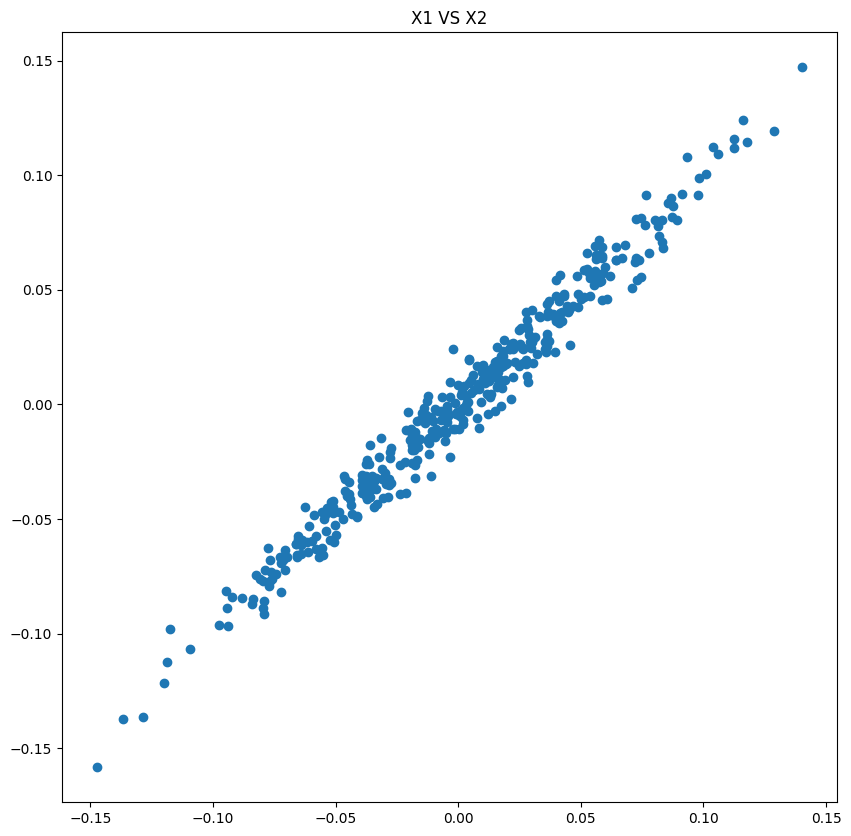

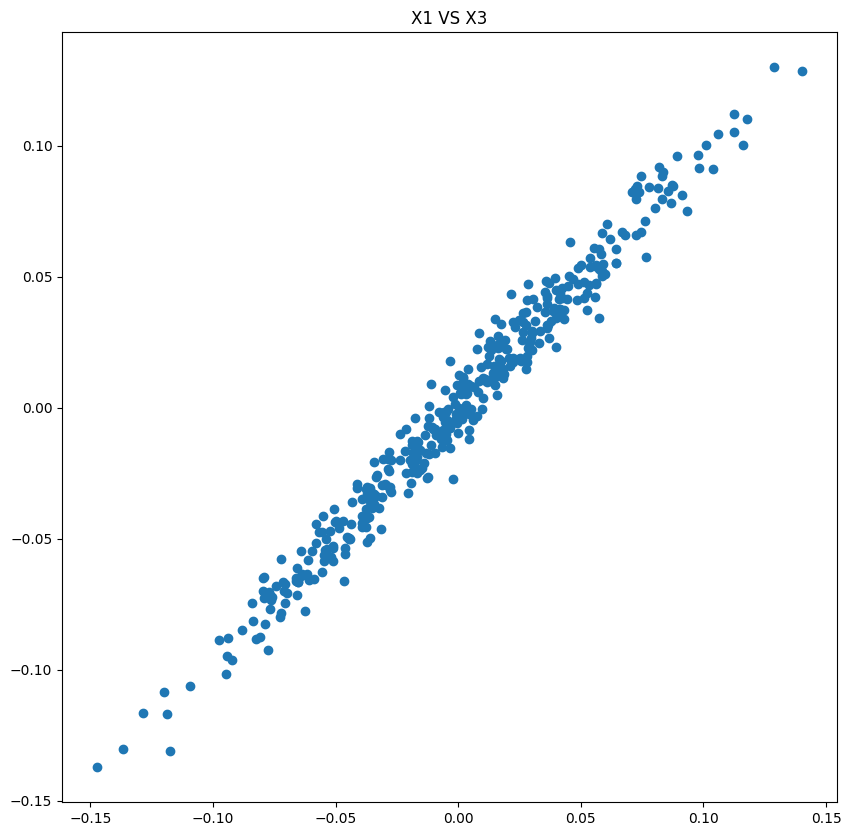

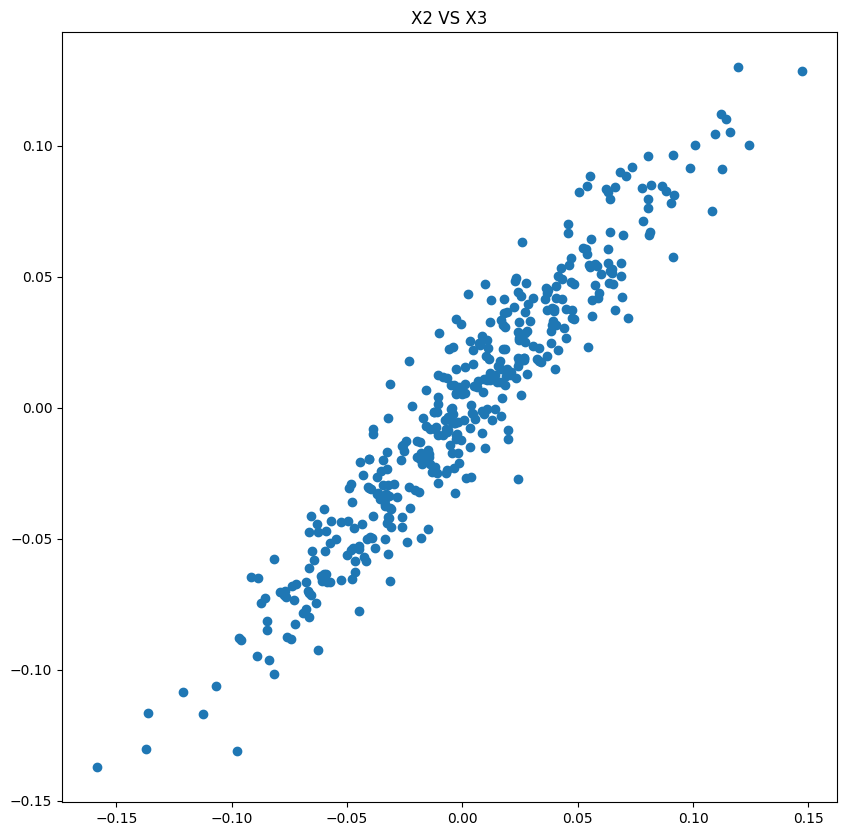

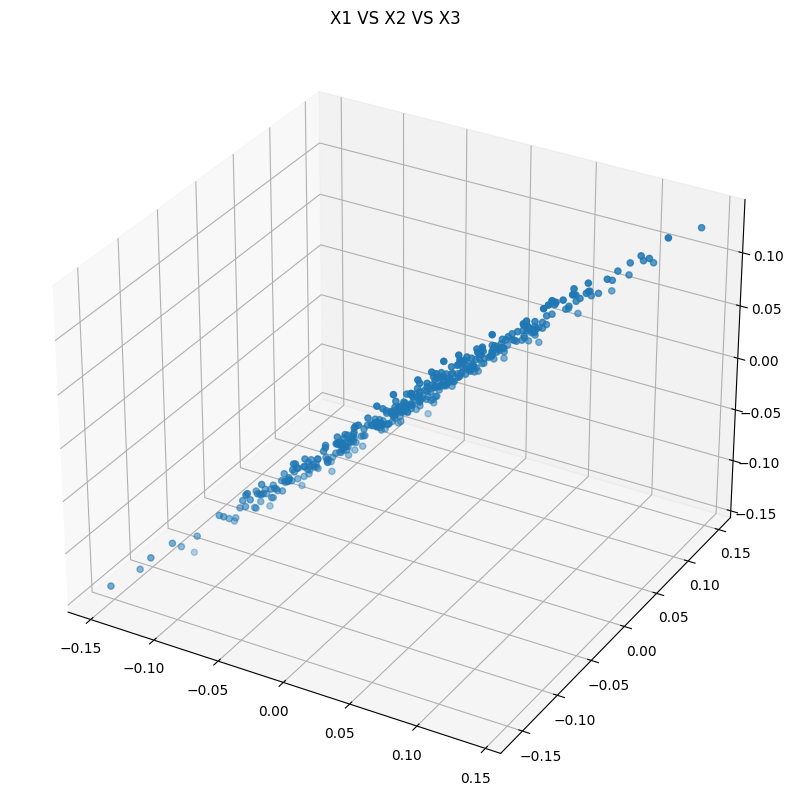

In [37]:
U, loss, outputs = solver.test(views, apply_linear_gcca)
for i in range(len(outputs)):
    outputs[i] = outputs[i]
for i in range(3):
    for j in range(i+1,3):
        plt.figure(figsize=(10,10))
        plt.scatter(outputs[i],outputs[j])
        plt.title('X'+str(i+1)+' VS X'+str(j+1))
        plt.show()
fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(projection='3d')
ax3d.scatter(outputs[0],outputs[1],outputs[2]) 
plt.title('X1 VS X2 VS X3')
plt.show()


In [38]:
N = 400
views = create_synthData_new(N,mode=2,F=20)
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to(device)

U_sum = []
outputs_sum = []
test = []
for i in range(3):
    testm = torch.eye(20)
    test.append(testm)
    
import pandas as pd
for _ in range(100):

    # size of the input for view 1 and view 2
    input_shape_list = [view.shape[-1] for view in views]

    # Building, training, and producing the new features by DCCA
    model = DeepGCCA(layer_sizes_list, input_shape_list, outdim_size,
                             use_all_singular_values, device=device).double()
    l_gcca = None
    if apply_linear_gcca:
        l_gcca = linear_gcca
    solver = Solver(model, l_gcca, outdim_size, epoch_num, batch_size,
                    learning_rate, reg_par, device=device)
    # train1, train2 = data1[0][0], data2[0][0]
    # val1, val2 = data1[1][0], data2[1][0]
    # test1, test2 = data1[2][0], data2[2][0]

    solver.fit(views, checkpoint=save_name)


    # TODO: Save l_gcca model if needed
    _ , _, outputs_def = solver.test(test, apply_linear_gcca)

    A = outputs_def[0]
    B = outputs_def[1]
    C = outputs_def[2]
    U = [A,B,C]

    A = outputs_def[0]
    B = outputs_def[1]
    C = outputs_def[2]

    os = [A,B,C]
    U_sum.append(U)
    outputs_sum.append(os)
    

#variables = pd.DataFrame(U_sum)
#results = pd.DataFrame(results_sum)

ACC = []
F1 = []
MCC = []
Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
for i in range(10):
    acc,f1,mcc = FS_MCC(U_sum[i],Label)
    ACC.append(acc)
    F1.append(f1)
    MCC.append(mcc)

print(np.mean(ACC),np.std(ACC))
print(np.mean(F1),np.std(F1))
print(np.mean(MCC),np.std(MCC))


[ INFO : 2023-05-31 17:08:53,328 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:08:53,345 ] - Adam (
Parameter Group

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


[ INFO : 2023-05-31 17:08:53,539 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2181
[ INFO : 2023-05-31 17:08:53,569 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4574
[ INFO : 2023-05-31 17:08:53,603 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7010
[ INFO : 2023-05-31 17:08:53,634 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9575
[ INFO : 2023-05-31 17:08:53,664 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2147
[ INFO : 2023-05-31 17:08:53,695 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4492
[ INFO : 2023-05-31 17:08:53,725 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6436
[ INFO : 2023-05-31 17:08:53,756 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8018
[ INFO : 2023-05-31 17:08:53,787 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.9382
[ INFO : 2023-05-31 17:08:53,818 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0623
[ INFO : 2023-05-31 17:08:53,852 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1767
[ INFO : 2023-05-31 17:08:53,883 ] -

[ INFO : 2023-05-31 17:08:56,560 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7459
[ INFO : 2023-05-31 17:08:56,587 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:08:56,810 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2484
[ INFO : 2023-05-31 17:08:56,842 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4131
[ INFO : 2023-05-31 17:08:56,876 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5650
[ INFO : 2023-05-31 17:08:56,908 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7127
[ INFO : 2023-05-31 17:08:56,939 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8608
[ INFO : 2023-05-31 17:08:56,971 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0126
[ INFO : 2023-05-31 17:08:57,003 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1712
[ INFO : 2023-05-31 17:08:57,036 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3384
[ INFO : 2023-05-31 17:08:57,068 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5094
[ INFO : 2023-05-31 17:08:57,101 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6700
[ INFO : 2023-05-31 17:08:57,136 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.8088
[ INFO : 2023-05-31 17:08:57,168 ] -

[ INFO : 2023-05-31 17:08:59,908 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6752
[ INFO : 2023-05-31 17:08:59,935 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:00,131 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0818
[ INFO : 2023-05-31 17:09:00,165 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3393
[ INFO : 2023-05-31 17:09:00,198 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5769
[ INFO : 2023-05-31 17:09:00,233 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8111
[ INFO : 2023-05-31 17:09:00,266 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0484
[ INFO : 2023-05-31 17:09:00,299 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2856
[ INFO : 2023-05-31 17:09:00,333 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5103
[ INFO : 2023-05-31 17:09:00,366 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6999
[ INFO : 2023-05-31 17:09:00,400 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8529
[ INFO : 2023-05-31 17:09:00,433 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.9834
[ INFO : 2023-05-31 17:09:00,466 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1003
[ INFO : 2023-05-31 17:09:00,498 ] - 

[ INFO : 2023-05-31 17:09:03,214 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7448
[ INFO : 2023-05-31 17:09:03,248 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7480
[ INFO : 2023-05-31 17:09:03,276 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:09:03,500 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.5532
[ INFO : 2023-05-31 17:09:03,532 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8275
[ INFO : 2023-05-31 17:09:03,565 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0961
[ INFO : 2023-05-31 17:09:03,597 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3473
[ INFO : 2023-05-31 17:09:03,629 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5816
[ INFO : 2023-05-31 17:09:03,662 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.7790
[ INFO : 2023-05-31 17:09:03,693 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.9415
[ INFO : 2023-05-31 17:09:03,725 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.0813
[ INFO : 2023-05-31 17:09:03,757 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2061
[ INFO : 2023-05-31 17:09:03,789 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3188
[ INFO : 2023-05-31 17:09:03,820 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4211
[ INFO : 2023-05-31 17:09:03,853 ] -

[ INFO : 2023-05-31 17:09:06,656 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7866
[ INFO : 2023-05-31 17:09:06,685 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:06,905 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8663
[ INFO : 2023-05-31 17:09:06,937 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1214
[ INFO : 2023-05-31 17:09:06,968 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3780
[ INFO : 2023-05-31 17:09:06,998 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6146
[ INFO : 2023-05-31 17:09:07,029 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.8303
[ INFO : 2023-05-31 17:09:07,059 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0065
[ INFO : 2023-05-31 17:09:07,090 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1438
[ INFO : 2023-05-31 17:09:07,121 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2658
[ INFO : 2023-05-31 17:09:07,152 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3798
[ INFO : 2023-05-31 17:09:07,188 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4842
[ INFO : 2023-05-31 17:09:07,226 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5770
[ INFO : 2023-05-31 17:09:07,258 ] -

[ INFO : 2023-05-31 17:09:09,953 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8095
[ INFO : 2023-05-31 17:09:09,980 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:10,200 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2662
[ INFO : 2023-05-31 17:09:10,234 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4854
[ INFO : 2023-05-31 17:09:10,268 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7130
[ INFO : 2023-05-31 17:09:10,303 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9472
[ INFO : 2023-05-31 17:09:10,336 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1704
[ INFO : 2023-05-31 17:09:10,368 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3804
[ INFO : 2023-05-31 17:09:10,401 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5699
[ INFO : 2023-05-31 17:09:10,434 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.7376
[ INFO : 2023-05-31 17:09:10,466 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8844
[ INFO : 2023-05-31 17:09:10,498 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0129
[ INFO : 2023-05-31 17:09:10,530 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1275
[ INFO : 2023-05-31 17:09:10,562 ] -

[ INFO : 2023-05-31 17:09:13,279 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7365
[ INFO : 2023-05-31 17:09:13,307 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:13,498 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.3735
[ INFO : 2023-05-31 17:09:13,530 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6289
[ INFO : 2023-05-31 17:09:13,562 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8663
[ INFO : 2023-05-31 17:09:13,595 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1065
[ INFO : 2023-05-31 17:09:13,627 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3547
[ INFO : 2023-05-31 17:09:13,658 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5922
[ INFO : 2023-05-31 17:09:13,692 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.7842
[ INFO : 2023-05-31 17:09:13,724 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.9398
[ INFO : 2023-05-31 17:09:13,756 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.0742
[ INFO : 2023-05-31 17:09:13,788 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.1961
[ INFO : 2023-05-31 17:09:13,820 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3085
[ INFO : 2023-05-31 17:09:13,852 ] - 

[ INFO : 2023-05-31 17:09:16,554 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7786
[ INFO : 2023-05-31 17:09:16,586 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7814
[ INFO : 2023-05-31 17:09:16,614 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:09:16,828 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.6416
[ INFO : 2023-05-31 17:09:16,860 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8469
[ INFO : 2023-05-31 17:09:16,892 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.0203
[ INFO : 2023-05-31 17:09:16,925 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1752
[ INFO : 2023-05-31 17:09:16,958 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.3217
[ INFO : 2023-05-31 17:09:16,991 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4702
[ INFO : 2023-05-31 17:09:17,022 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.6308
[ INFO : 2023-05-31 17:09:17,054 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8111
[ INFO : 2023-05-31 17:09:17,086 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0084
[ INFO : 2023-05-31 17:09:17,118 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1998
[ INFO : 2023-05-31 17:09:17,150 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3671
[ INFO : 2023-05-31 17:09:17,181 ] - 

[ INFO : 2023-05-31 17:09:19,887 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.6248
[ INFO : 2023-05-31 17:09:19,918 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6292
[ INFO : 2023-05-31 17:09:19,946 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:09:20,166 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2047
[ INFO : 2023-05-31 17:09:20,198 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4230
[ INFO : 2023-05-31 17:09:20,233 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6404
[ INFO : 2023-05-31 17:09:20,265 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8497
[ INFO : 2023-05-31 17:09:20,298 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0390
[ INFO : 2023-05-31 17:09:20,331 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2198
[ INFO : 2023-05-31 17:09:20,363 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.3937
[ INFO : 2023-05-31 17:09:20,395 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5593
[ INFO : 2023-05-31 17:09:20,427 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7149
[ INFO : 2023-05-31 17:09:20,459 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8560
[ INFO : 2023-05-31 17:09:20,491 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.9797
[ INFO : 2023-05-31 17:09:20,523 ] -

[ INFO : 2023-05-31 17:09:23,250 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7078
[ INFO : 2023-05-31 17:09:23,278 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:23,498 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.6214
[ INFO : 2023-05-31 17:09:23,529 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7483
[ INFO : 2023-05-31 17:09:23,562 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.8518
[ INFO : 2023-05-31 17:09:23,595 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.9384
[ INFO : 2023-05-31 17:09:23,627 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.0124
[ INFO : 2023-05-31 17:09:23,659 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.0762
[ INFO : 2023-05-31 17:09:23,691 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.1320
[ INFO : 2023-05-31 17:09:23,723 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.1816
[ INFO : 2023-05-31 17:09:23,756 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.2274
[ INFO : 2023-05-31 17:09:23,788 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.2720
[ INFO : 2023-05-31 17:09:23,820 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.3192
[ INFO : 2023-05-31 17:09:23,853 ] -

[ INFO : 2023-05-31 17:09:26,575 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.3180
[ INFO : 2023-05-31 17:09:26,602 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:26,826 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1992
[ INFO : 2023-05-31 17:09:26,858 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4079
[ INFO : 2023-05-31 17:09:26,890 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6161
[ INFO : 2023-05-31 17:09:26,922 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8461
[ INFO : 2023-05-31 17:09:26,954 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0790
[ INFO : 2023-05-31 17:09:26,986 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3085
[ INFO : 2023-05-31 17:09:27,019 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5219
[ INFO : 2023-05-31 17:09:27,052 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6949
[ INFO : 2023-05-31 17:09:27,085 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8423
[ INFO : 2023-05-31 17:09:27,118 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.9755
[ INFO : 2023-05-31 17:09:27,152 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.0962
[ INFO : 2023-05-31 17:09:27,184 ] -

[ INFO : 2023-05-31 17:09:29,916 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7344
[ INFO : 2023-05-31 17:09:29,943 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:30,162 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.5262
[ INFO : 2023-05-31 17:09:30,195 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8396
[ INFO : 2023-05-31 17:09:30,229 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1594
[ INFO : 2023-05-31 17:09:30,261 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4459
[ INFO : 2023-05-31 17:09:30,293 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.6643
[ INFO : 2023-05-31 17:09:30,326 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.8423
[ INFO : 2023-05-31 17:09:30,359 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0025
[ INFO : 2023-05-31 17:09:30,390 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.1459
[ INFO : 2023-05-31 17:09:30,423 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2702
[ INFO : 2023-05-31 17:09:30,456 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3772
[ INFO : 2023-05-31 17:09:30,489 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4711
[ INFO : 2023-05-31 17:09:30,523 ] -

[ INFO : 2023-05-31 17:09:33,209 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7935
[ INFO : 2023-05-31 17:09:33,238 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:33,460 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6693
[ INFO : 2023-05-31 17:09:33,492 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9656
[ INFO : 2023-05-31 17:09:33,526 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2610
[ INFO : 2023-05-31 17:09:33,558 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5257
[ INFO : 2023-05-31 17:09:33,590 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7483
[ INFO : 2023-05-31 17:09:33,621 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9298
[ INFO : 2023-05-31 17:09:33,654 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0831
[ INFO : 2023-05-31 17:09:33,686 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2168
[ INFO : 2023-05-31 17:09:33,717 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3347
[ INFO : 2023-05-31 17:09:33,749 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4391
[ INFO : 2023-05-31 17:09:33,783 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5321
[ INFO : 2023-05-31 17:09:33,814 ] -

[ INFO : 2023-05-31 17:09:36,512 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8040
[ INFO : 2023-05-31 17:09:36,543 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:36,762 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8586
[ INFO : 2023-05-31 17:09:36,796 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1803
[ INFO : 2023-05-31 17:09:36,828 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4585
[ INFO : 2023-05-31 17:09:36,859 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7028
[ INFO : 2023-05-31 17:09:36,891 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9141
[ INFO : 2023-05-31 17:09:36,924 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0846
[ INFO : 2023-05-31 17:09:36,956 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2247
[ INFO : 2023-05-31 17:09:36,988 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.3482
[ INFO : 2023-05-31 17:09:37,021 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.4591
[ INFO : 2023-05-31 17:09:37,054 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.5581
[ INFO : 2023-05-31 17:09:37,086 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.6462
[ INFO : 2023-05-31 17:09:37,117 ] -

[ INFO : 2023-05-31 17:09:39,876 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8242
[ INFO : 2023-05-31 17:09:39,905 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:40,131 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1707
[ INFO : 2023-05-31 17:09:40,164 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3740
[ INFO : 2023-05-31 17:09:40,198 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5782
[ INFO : 2023-05-31 17:09:40,232 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7993
[ INFO : 2023-05-31 17:09:40,265 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0335
[ INFO : 2023-05-31 17:09:40,298 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2652
[ INFO : 2023-05-31 17:09:40,331 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4748
[ INFO : 2023-05-31 17:09:40,363 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6492
[ INFO : 2023-05-31 17:09:40,396 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8012
[ INFO : 2023-05-31 17:09:40,429 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.9368
[ INFO : 2023-05-31 17:09:40,462 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.0582
[ INFO : 2023-05-31 17:09:40,496 ] -

[ INFO : 2023-05-31 17:09:43,218 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7244
[ INFO : 2023-05-31 17:09:43,246 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:43,432 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7899
[ INFO : 2023-05-31 17:09:43,464 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0272
[ INFO : 2023-05-31 17:09:43,495 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2561
[ INFO : 2023-05-31 17:09:43,527 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4855
[ INFO : 2023-05-31 17:09:43,560 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7199
[ INFO : 2023-05-31 17:09:43,593 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9628
[ INFO : 2023-05-31 17:09:43,625 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2105
[ INFO : 2023-05-31 17:09:43,656 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4239
[ INFO : 2023-05-31 17:09:43,689 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6006
[ INFO : 2023-05-31 17:09:43,721 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7526
[ INFO : 2023-05-31 17:09:43,753 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8862
[ INFO : 2023-05-31 17:09:43,785 ] - 

[ INFO : 2023-05-31 17:09:46,520 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7143
[ INFO : 2023-05-31 17:09:46,552 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7178
[ INFO : 2023-05-31 17:09:46,580 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:09:46,801 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8683
[ INFO : 2023-05-31 17:09:46,834 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2620
[ INFO : 2023-05-31 17:09:46,868 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5439
[ INFO : 2023-05-31 17:09:46,900 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7764
[ INFO : 2023-05-31 17:09:46,932 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9840
[ INFO : 2023-05-31 17:09:46,964 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1529
[ INFO : 2023-05-31 17:09:46,997 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2922
[ INFO : 2023-05-31 17:09:47,029 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4148
[ INFO : 2023-05-31 17:09:47,060 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5245
[ INFO : 2023-05-31 17:09:47,094 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6204
[ INFO : 2023-05-31 17:09:47,125 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.7033
[ INFO : 2023-05-31 17:09:47,158 ] -

[ INFO : 2023-05-31 17:09:49,869 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8339
[ INFO : 2023-05-31 17:09:49,896 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:50,120 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8892
[ INFO : 2023-05-31 17:09:50,152 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0603
[ INFO : 2023-05-31 17:09:50,184 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2118
[ INFO : 2023-05-31 17:09:50,217 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3467
[ INFO : 2023-05-31 17:09:50,250 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.4695
[ INFO : 2023-05-31 17:09:50,281 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.5886
[ INFO : 2023-05-31 17:09:50,313 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7133
[ INFO : 2023-05-31 17:09:50,346 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8547
[ INFO : 2023-05-31 17:09:50,380 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0239
[ INFO : 2023-05-31 17:09:50,415 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2144
[ INFO : 2023-05-31 17:09:50,448 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3864
[ INFO : 2023-05-31 17:09:50,481 ] - 

[ INFO : 2023-05-31 17:09:53,200 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.6246
[ INFO : 2023-05-31 17:09:53,234 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6290
[ INFO : 2023-05-31 17:09:53,261 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:09:53,484 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6953
[ INFO : 2023-05-31 17:09:53,518 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0054
[ INFO : 2023-05-31 17:09:53,550 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3197
[ INFO : 2023-05-31 17:09:53,583 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5910
[ INFO : 2023-05-31 17:09:53,616 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.8029
[ INFO : 2023-05-31 17:09:53,648 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9782
[ INFO : 2023-05-31 17:09:53,681 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1305
[ INFO : 2023-05-31 17:09:53,713 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2644
[ INFO : 2023-05-31 17:09:53,745 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3818
[ INFO : 2023-05-31 17:09:53,777 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4857
[ INFO : 2023-05-31 17:09:53,810 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5784
[ INFO : 2023-05-31 17:09:53,842 ] -

[ INFO : 2023-05-31 17:09:56,589 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8138
[ INFO : 2023-05-31 17:09:56,616 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:09:56,831 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.5218
[ INFO : 2023-05-31 17:09:56,862 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.6347
[ INFO : 2023-05-31 17:09:56,895 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.7255
[ INFO : 2023-05-31 17:09:56,927 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.8027
[ INFO : 2023-05-31 17:09:56,959 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.8714
[ INFO : 2023-05-31 17:09:56,991 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.9348
[ INFO : 2023-05-31 17:09:57,023 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.9951
[ INFO : 2023-05-31 17:09:57,056 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.0541
[ INFO : 2023-05-31 17:09:57,089 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.1140
[ INFO : 2023-05-31 17:09:57,121 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.1769
[ INFO : 2023-05-31 17:09:57,156 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.2449
[ INFO : 2023-05-31 17:09:57,188 ] -

[ INFO : 2023-05-31 17:09:59,848 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.3023
[ INFO : 2023-05-31 17:09:59,875 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:00,095 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.7173
[ INFO : 2023-05-31 17:10:00,128 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0075
[ INFO : 2023-05-31 17:10:00,162 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2937
[ INFO : 2023-05-31 17:10:00,195 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5655
[ INFO : 2023-05-31 17:10:00,230 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7892
[ INFO : 2023-05-31 17:10:00,262 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9662
[ INFO : 2023-05-31 17:10:00,294 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1150
[ INFO : 2023-05-31 17:10:00,326 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2463
[ INFO : 2023-05-31 17:10:00,358 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3653
[ INFO : 2023-05-31 17:10:00,391 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4728
[ INFO : 2023-05-31 17:10:00,424 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5683
[ INFO : 2023-05-31 17:10:00,456 ] -

[ INFO : 2023-05-31 17:10:03,130 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8120
[ INFO : 2023-05-31 17:10:03,160 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:03,384 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.7783
[ INFO : 2023-05-31 17:10:03,418 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9063
[ INFO : 2023-05-31 17:10:03,451 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.0158
[ INFO : 2023-05-31 17:10:03,484 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.1138
[ INFO : 2023-05-31 17:10:03,517 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.2064
[ INFO : 2023-05-31 17:10:03,549 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.2987
[ INFO : 2023-05-31 17:10:03,581 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.3945
[ INFO : 2023-05-31 17:10:03,612 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.4983
[ INFO : 2023-05-31 17:10:03,644 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.6149
[ INFO : 2023-05-31 17:10:03,677 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.7472
[ INFO : 2023-05-31 17:10:03,709 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.8954
[ INFO : 2023-05-31 17:10:03,741 ] -

[ INFO : 2023-05-31 17:10:06,399 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.5166
[ INFO : 2023-05-31 17:10:06,427 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:06,647 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.5474
[ INFO : 2023-05-31 17:10:06,680 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7303
[ INFO : 2023-05-31 17:10:06,712 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.8926
[ INFO : 2023-05-31 17:10:06,743 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.0390
[ INFO : 2023-05-31 17:10:06,776 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.1745
[ INFO : 2023-05-31 17:10:06,807 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.3053
[ INFO : 2023-05-31 17:10:06,871 ] - Epoch 12/100 - time: 0.06 - training_loss: -4.4382
[ INFO : 2023-05-31 17:10:06,904 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.5777
[ INFO : 2023-05-31 17:10:06,937 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7257
[ INFO : 2023-05-31 17:10:06,969 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8799
[ INFO : 2023-05-31 17:10:07,001 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.0306
[ INFO : 2023-05-31 17:10:07,032 ] -

[ INFO : 2023-05-31 17:10:09,723 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.5393
[ INFO : 2023-05-31 17:10:09,750 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:09,969 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8513
[ INFO : 2023-05-31 17:10:10,001 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.0383
[ INFO : 2023-05-31 17:10:10,033 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.2332
[ INFO : 2023-05-31 17:10:10,065 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.4623
[ INFO : 2023-05-31 17:10:10,097 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7318
[ INFO : 2023-05-31 17:10:10,128 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9802
[ INFO : 2023-05-31 17:10:10,160 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2045
[ INFO : 2023-05-31 17:10:10,193 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4037
[ INFO : 2023-05-31 17:10:10,226 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5789
[ INFO : 2023-05-31 17:10:10,258 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.7310
[ INFO : 2023-05-31 17:10:10,290 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.8638
[ INFO : 2023-05-31 17:10:10,321 ] -

[ INFO : 2023-05-31 17:10:13,073 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6935
[ INFO : 2023-05-31 17:10:13,101 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:13,328 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9678
[ INFO : 2023-05-31 17:10:13,361 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2373
[ INFO : 2023-05-31 17:10:13,395 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5063
[ INFO : 2023-05-31 17:10:13,428 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7702
[ INFO : 2023-05-31 17:10:13,463 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0197
[ INFO : 2023-05-31 17:10:13,495 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2500
[ INFO : 2023-05-31 17:10:13,528 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4532
[ INFO : 2023-05-31 17:10:13,561 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6274
[ INFO : 2023-05-31 17:10:13,595 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7790
[ INFO : 2023-05-31 17:10:13,629 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.9140
[ INFO : 2023-05-31 17:10:13,662 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.0345
[ INFO : 2023-05-31 17:10:13,697 ] -

[ INFO : 2023-05-31 17:10:16,469 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7187
[ INFO : 2023-05-31 17:10:16,497 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:16,716 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8854
[ INFO : 2023-05-31 17:10:16,747 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2478
[ INFO : 2023-05-31 17:10:16,778 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5439
[ INFO : 2023-05-31 17:10:16,810 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7788
[ INFO : 2023-05-31 17:10:16,841 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9747
[ INFO : 2023-05-31 17:10:16,873 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1433
[ INFO : 2023-05-31 17:10:16,904 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2869
[ INFO : 2023-05-31 17:10:16,937 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4084
[ INFO : 2023-05-31 17:10:16,970 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5127
[ INFO : 2023-05-31 17:10:17,002 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6045
[ INFO : 2023-05-31 17:10:17,033 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.6870
[ INFO : 2023-05-31 17:10:17,064 ] -

[ INFO : 2023-05-31 17:10:19,770 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8304
[ INFO : 2023-05-31 17:10:19,797 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:20,015 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2504
[ INFO : 2023-05-31 17:10:20,047 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5237
[ INFO : 2023-05-31 17:10:20,078 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8157
[ INFO : 2023-05-31 17:10:20,110 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.1204
[ INFO : 2023-05-31 17:10:20,142 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3796
[ INFO : 2023-05-31 17:10:20,173 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5793
[ INFO : 2023-05-31 17:10:20,205 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7541
[ INFO : 2023-05-31 17:10:20,239 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.9133
[ INFO : 2023-05-31 17:10:20,272 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0534
[ INFO : 2023-05-31 17:10:20,305 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1740
[ INFO : 2023-05-31 17:10:20,337 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.2793
[ INFO : 2023-05-31 17:10:20,368 ] -

[ INFO : 2023-05-31 17:10:23,032 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7620
[ INFO : 2023-05-31 17:10:23,059 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:23,279 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9317
[ INFO : 2023-05-31 17:10:23,310 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1448
[ INFO : 2023-05-31 17:10:23,342 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3690
[ INFO : 2023-05-31 17:10:23,373 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6093
[ INFO : 2023-05-31 17:10:23,404 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8500
[ INFO : 2023-05-31 17:10:23,436 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0747
[ INFO : 2023-05-31 17:10:23,467 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2758
[ INFO : 2023-05-31 17:10:23,500 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4527
[ INFO : 2023-05-31 17:10:23,532 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6092
[ INFO : 2023-05-31 17:10:23,564 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.7502
[ INFO : 2023-05-31 17:10:23,595 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.8784
[ INFO : 2023-05-31 17:10:23,627 ] -

[ INFO : 2023-05-31 17:10:26,316 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6928
[ INFO : 2023-05-31 17:10:26,343 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:26,563 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9518
[ INFO : 2023-05-31 17:10:26,594 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.0853
[ INFO : 2023-05-31 17:10:26,626 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1997
[ INFO : 2023-05-31 17:10:26,658 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.3010
[ INFO : 2023-05-31 17:10:26,691 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.3933
[ INFO : 2023-05-31 17:10:26,724 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.4804
[ INFO : 2023-05-31 17:10:26,757 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.5665
[ INFO : 2023-05-31 17:10:26,789 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.6566
[ INFO : 2023-05-31 17:10:26,821 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7576
[ INFO : 2023-05-31 17:10:26,853 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8768
[ INFO : 2023-05-31 17:10:26,886 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.0179
[ INFO : 2023-05-31 17:10:26,918 ] -

[ INFO : 2023-05-31 17:10:29,757 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.5392
[ INFO : 2023-05-31 17:10:29,786 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:30,010 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3405
[ INFO : 2023-05-31 17:10:30,044 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.6688
[ INFO : 2023-05-31 17:10:30,080 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.9171
[ INFO : 2023-05-31 17:10:30,116 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.1218
[ INFO : 2023-05-31 17:10:30,151 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.2916
[ INFO : 2023-05-31 17:10:30,185 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.4317
[ INFO : 2023-05-31 17:10:30,220 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.5517
[ INFO : 2023-05-31 17:10:30,254 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.6572
[ INFO : 2023-05-31 17:10:30,288 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.7496
[ INFO : 2023-05-31 17:10:30,321 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.8298
[ INFO : 2023-05-31 17:10:30,355 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.9002
[ INFO : 2023-05-31 17:10:30,388 ] -

[ INFO : 2023-05-31 17:10:33,088 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8657
[ INFO : 2023-05-31 17:10:33,118 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:33,349 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6433
[ INFO : 2023-05-31 17:10:33,383 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9657
[ INFO : 2023-05-31 17:10:33,416 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2538
[ INFO : 2023-05-31 17:10:33,448 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5261
[ INFO : 2023-05-31 17:10:33,481 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7573
[ INFO : 2023-05-31 17:10:33,513 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9366
[ INFO : 2023-05-31 17:10:33,549 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0853
[ INFO : 2023-05-31 17:10:33,584 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2197
[ INFO : 2023-05-31 17:10:33,618 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3403
[ INFO : 2023-05-31 17:10:33,651 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4467
[ INFO : 2023-05-31 17:10:33,682 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5405
[ INFO : 2023-05-31 17:10:33,714 ] -

[ INFO : 2023-05-31 17:10:36,433 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8058
[ INFO : 2023-05-31 17:10:36,463 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:36,664 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6332
[ INFO : 2023-05-31 17:10:36,698 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0593
[ INFO : 2023-05-31 17:10:36,731 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4195
[ INFO : 2023-05-31 17:10:36,765 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.7086
[ INFO : 2023-05-31 17:10:36,801 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.9306
[ INFO : 2023-05-31 17:10:36,836 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.1178
[ INFO : 2023-05-31 17:10:36,868 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2777
[ INFO : 2023-05-31 17:10:36,901 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4121
[ INFO : 2023-05-31 17:10:36,932 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5266
[ INFO : 2023-05-31 17:10:36,964 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6267
[ INFO : 2023-05-31 17:10:36,997 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.7154
[ INFO : 2023-05-31 17:10:37,029 ] - 

[ INFO : 2023-05-31 17:10:39,873 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8470
[ INFO : 2023-05-31 17:10:39,907 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8491
[ INFO : 2023-05-31 17:10:39,938 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:10:40,177 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2452
[ INFO : 2023-05-31 17:10:40,212 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6138
[ INFO : 2023-05-31 17:10:40,246 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9606
[ INFO : 2023-05-31 17:10:40,280 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2718
[ INFO : 2023-05-31 17:10:40,315 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5160
[ INFO : 2023-05-31 17:10:40,348 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.7097
[ INFO : 2023-05-31 17:10:40,383 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.8789
[ INFO : 2023-05-31 17:10:40,417 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.0319
[ INFO : 2023-05-31 17:10:40,453 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.1686
[ INFO : 2023-05-31 17:10:40,488 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.2883
[ INFO : 2023-05-31 17:10:40,523 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.3919
[ INFO : 2023-05-31 17:10:40,559 ] -

[ INFO : 2023-05-31 17:10:43,395 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7816
[ INFO : 2023-05-31 17:10:43,423 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:43,649 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.2053
[ INFO : 2023-05-31 17:10:43,682 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.5463
[ INFO : 2023-05-31 17:10:43,715 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.8227
[ INFO : 2023-05-31 17:10:43,748 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.0339
[ INFO : 2023-05-31 17:10:43,780 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.2030
[ INFO : 2023-05-31 17:10:43,814 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.3486
[ INFO : 2023-05-31 17:10:43,848 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4779
[ INFO : 2023-05-31 17:10:43,881 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5912
[ INFO : 2023-05-31 17:10:43,914 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6890
[ INFO : 2023-05-31 17:10:43,946 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.7734
[ INFO : 2023-05-31 17:10:43,979 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.8473
[ INFO : 2023-05-31 17:10:44,012 ] -

[ INFO : 2023-05-31 17:10:46,803 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8570
[ INFO : 2023-05-31 17:10:46,832 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:47,059 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1475
[ INFO : 2023-05-31 17:10:47,094 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3523
[ INFO : 2023-05-31 17:10:47,127 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5657
[ INFO : 2023-05-31 17:10:47,160 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7970
[ INFO : 2023-05-31 17:10:47,193 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0222
[ INFO : 2023-05-31 17:10:47,225 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2302
[ INFO : 2023-05-31 17:10:47,258 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4277
[ INFO : 2023-05-31 17:10:47,291 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6036
[ INFO : 2023-05-31 17:10:47,324 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7546
[ INFO : 2023-05-31 17:10:47,358 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8869
[ INFO : 2023-05-31 17:10:47,391 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.0058
[ INFO : 2023-05-31 17:10:47,424 ] -

[ INFO : 2023-05-31 17:10:50,193 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7138
[ INFO : 2023-05-31 17:10:50,220 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:50,447 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1967
[ INFO : 2023-05-31 17:10:50,480 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.5599
[ INFO : 2023-05-31 17:10:50,512 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.8228
[ INFO : 2023-05-31 17:10:50,545 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.0244
[ INFO : 2023-05-31 17:10:50,577 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.1984
[ INFO : 2023-05-31 17:10:50,610 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.3491
[ INFO : 2023-05-31 17:10:50,642 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4766
[ INFO : 2023-05-31 17:10:50,674 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5852
[ INFO : 2023-05-31 17:10:50,707 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6797
[ INFO : 2023-05-31 17:10:50,739 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.7633
[ INFO : 2023-05-31 17:10:50,771 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.8381
[ INFO : 2023-05-31 17:10:50,804 ] -

[ INFO : 2023-05-31 17:10:53,546 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8561
[ INFO : 2023-05-31 17:10:53,575 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:53,800 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9746
[ INFO : 2023-05-31 17:10:53,832 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1476
[ INFO : 2023-05-31 17:10:53,865 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3100
[ INFO : 2023-05-31 17:10:53,898 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.4762
[ INFO : 2023-05-31 17:10:53,930 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.6601
[ INFO : 2023-05-31 17:10:53,962 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8689
[ INFO : 2023-05-31 17:10:53,995 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0816
[ INFO : 2023-05-31 17:10:54,027 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2706
[ INFO : 2023-05-31 17:10:54,061 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4431
[ INFO : 2023-05-31 17:10:54,093 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5997
[ INFO : 2023-05-31 17:10:54,127 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.7357
[ INFO : 2023-05-31 17:10:54,163 ] -

[ INFO : 2023-05-31 17:10:56,878 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6627
[ INFO : 2023-05-31 17:10:56,906 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:10:57,135 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9945
[ INFO : 2023-05-31 17:10:57,169 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3632
[ INFO : 2023-05-31 17:10:57,203 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.6435
[ INFO : 2023-05-31 17:10:57,239 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.8719
[ INFO : 2023-05-31 17:10:57,273 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0589
[ INFO : 2023-05-31 17:10:57,307 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2149
[ INFO : 2023-05-31 17:10:57,340 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3498
[ INFO : 2023-05-31 17:10:57,374 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4681
[ INFO : 2023-05-31 17:10:57,409 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5713
[ INFO : 2023-05-31 17:10:57,442 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6616
[ INFO : 2023-05-31 17:10:57,475 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.7420
[ INFO : 2023-05-31 17:10:57,508 ] -

[ INFO : 2023-05-31 17:11:00,263 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8397
[ INFO : 2023-05-31 17:11:00,292 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:00,525 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2551
[ INFO : 2023-05-31 17:11:00,558 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4888
[ INFO : 2023-05-31 17:11:00,591 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7567
[ INFO : 2023-05-31 17:11:00,624 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0554
[ INFO : 2023-05-31 17:11:00,658 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3176
[ INFO : 2023-05-31 17:11:00,691 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5355
[ INFO : 2023-05-31 17:11:00,724 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7242
[ INFO : 2023-05-31 17:11:00,757 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8890
[ INFO : 2023-05-31 17:11:00,790 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0312
[ INFO : 2023-05-31 17:11:00,823 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1547
[ INFO : 2023-05-31 17:11:00,856 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.2644
[ INFO : 2023-05-31 17:11:00,889 ] -

[ INFO : 2023-05-31 17:11:03,684 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7626
[ INFO : 2023-05-31 17:11:03,711 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:03,937 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.7833
[ INFO : 2023-05-31 17:11:03,969 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1824
[ INFO : 2023-05-31 17:11:04,002 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4829
[ INFO : 2023-05-31 17:11:04,036 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7354
[ INFO : 2023-05-31 17:11:04,071 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9493
[ INFO : 2023-05-31 17:11:04,106 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1269
[ INFO : 2023-05-31 17:11:04,140 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2757
[ INFO : 2023-05-31 17:11:04,175 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4033
[ INFO : 2023-05-31 17:11:04,208 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5148
[ INFO : 2023-05-31 17:11:04,240 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6125
[ INFO : 2023-05-31 17:11:04,272 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.6981
[ INFO : 2023-05-31 17:11:04,304 ] -

[ INFO : 2023-05-31 17:11:07,065 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8348
[ INFO : 2023-05-31 17:11:07,093 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:07,320 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2875
[ INFO : 2023-05-31 17:11:07,353 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5421
[ INFO : 2023-05-31 17:11:07,386 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8352
[ INFO : 2023-05-31 17:11:07,419 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.1435
[ INFO : 2023-05-31 17:11:07,453 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3882
[ INFO : 2023-05-31 17:11:07,488 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5965
[ INFO : 2023-05-31 17:11:07,524 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7871
[ INFO : 2023-05-31 17:11:07,556 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.9503
[ INFO : 2023-05-31 17:11:07,588 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0883
[ INFO : 2023-05-31 17:11:07,621 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.2081
[ INFO : 2023-05-31 17:11:07,654 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.3146
[ INFO : 2023-05-31 17:11:07,687 ] -

[ INFO : 2023-05-31 17:11:10,452 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7703
[ INFO : 2023-05-31 17:11:10,480 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:10,685 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.5158
[ INFO : 2023-05-31 17:11:10,719 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9676
[ INFO : 2023-05-31 17:11:10,753 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3490
[ INFO : 2023-05-31 17:11:10,786 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.6387
[ INFO : 2023-05-31 17:11:10,820 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.8713
[ INFO : 2023-05-31 17:11:10,854 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0669
[ INFO : 2023-05-31 17:11:10,887 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2302
[ INFO : 2023-05-31 17:11:10,921 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3686
[ INFO : 2023-05-31 17:11:10,957 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4893
[ INFO : 2023-05-31 17:11:10,992 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5956
[ INFO : 2023-05-31 17:11:11,026 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6884
[ INFO : 2023-05-31 17:11:11,060 ] - 

[ INFO : 2023-05-31 17:11:13,859 ] - Epoch 99/100 - time: 0.06 - training_loss: -7.8436
[ INFO : 2023-05-31 17:11:13,894 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8457
[ INFO : 2023-05-31 17:11:13,922 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:14,150 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.7464
[ INFO : 2023-05-31 17:11:14,187 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0972
[ INFO : 2023-05-31 17:11:14,222 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3698
[ INFO : 2023-05-31 17:11:14,255 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6231
[ INFO : 2023-05-31 17:11:14,289 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.8292
[ INFO : 2023-05-31 17:11:14,321 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0020
[ INFO : 2023-05-31 17:11:14,355 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1464
[ INFO : 2023-05-31 17:11:14,389 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2705
[ INFO : 2023-05-31 17:11:14,422 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3827
[ INFO : 2023-05-31 17:11:14,457 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4850
[ INFO : 2023-05-31 17:11:14,489 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5754
[ INFO : 2023-05-31 17:11:14,523 ] -

[ INFO : 2023-05-31 17:11:17,288 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8088
[ INFO : 2023-05-31 17:11:17,315 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:17,543 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4896
[ INFO : 2023-05-31 17:11:17,576 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.7723
[ INFO : 2023-05-31 17:11:17,608 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0831
[ INFO : 2023-05-31 17:11:17,641 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3764
[ INFO : 2023-05-31 17:11:17,674 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.6061
[ INFO : 2023-05-31 17:11:17,707 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.7947
[ INFO : 2023-05-31 17:11:17,741 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.9611
[ INFO : 2023-05-31 17:11:17,774 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.1071
[ INFO : 2023-05-31 17:11:17,806 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2341
[ INFO : 2023-05-31 17:11:17,840 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3458
[ INFO : 2023-05-31 17:11:17,874 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4449
[ INFO : 2023-05-31 17:11:17,906 ] -

[ INFO : 2023-05-31 17:11:20,678 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7901
[ INFO : 2023-05-31 17:11:20,705 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:20,926 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6710
[ INFO : 2023-05-31 17:11:20,959 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9424
[ INFO : 2023-05-31 17:11:20,993 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2138
[ INFO : 2023-05-31 17:11:21,025 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4628
[ INFO : 2023-05-31 17:11:21,058 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.6793
[ INFO : 2023-05-31 17:11:21,090 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.8731
[ INFO : 2023-05-31 17:11:21,122 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0398
[ INFO : 2023-05-31 17:11:21,155 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.1783
[ INFO : 2023-05-31 17:11:21,188 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2954
[ INFO : 2023-05-31 17:11:21,222 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3975
[ INFO : 2023-05-31 17:11:21,255 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4888
[ INFO : 2023-05-31 17:11:21,287 ] -

[ INFO : 2023-05-31 17:11:23,963 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7964
[ INFO : 2023-05-31 17:11:23,991 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:24,215 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8183
[ INFO : 2023-05-31 17:11:24,248 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9865
[ INFO : 2023-05-31 17:11:24,281 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1389
[ INFO : 2023-05-31 17:11:24,314 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.2861
[ INFO : 2023-05-31 17:11:24,346 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4342
[ INFO : 2023-05-31 17:11:24,378 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5884
[ INFO : 2023-05-31 17:11:24,411 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.7555
[ INFO : 2023-05-31 17:11:24,443 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9389
[ INFO : 2023-05-31 17:11:24,476 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1273
[ INFO : 2023-05-31 17:11:24,510 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3038
[ INFO : 2023-05-31 17:11:24,542 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.4556
[ INFO : 2023-05-31 17:11:24,574 ] -

[ INFO : 2023-05-31 17:11:27,276 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6278
[ INFO : 2023-05-31 17:11:27,304 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:27,534 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0532
[ INFO : 2023-05-31 17:11:27,566 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1696
[ INFO : 2023-05-31 17:11:27,598 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.2647
[ INFO : 2023-05-31 17:11:27,629 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.3463
[ INFO : 2023-05-31 17:11:27,661 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4209
[ INFO : 2023-05-31 17:11:27,694 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.4930
[ INFO : 2023-05-31 17:11:27,725 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.5669
[ INFO : 2023-05-31 17:11:27,758 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.6476
[ INFO : 2023-05-31 17:11:27,790 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7420
[ INFO : 2023-05-31 17:11:27,822 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8596
[ INFO : 2023-05-31 17:11:27,854 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.0071
[ INFO : 2023-05-31 17:11:27,886 ] -

[ INFO : 2023-05-31 17:11:30,578 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.5331
[ INFO : 2023-05-31 17:11:30,605 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:30,814 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.7590
[ INFO : 2023-05-31 17:11:30,846 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1135
[ INFO : 2023-05-31 17:11:30,878 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4275
[ INFO : 2023-05-31 17:11:30,909 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.6962
[ INFO : 2023-05-31 17:11:30,941 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.9310
[ INFO : 2023-05-31 17:11:30,973 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.1204
[ INFO : 2023-05-31 17:11:31,004 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2692
[ INFO : 2023-05-31 17:11:31,038 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3950
[ INFO : 2023-05-31 17:11:31,071 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5079
[ INFO : 2023-05-31 17:11:31,101 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6093
[ INFO : 2023-05-31 17:11:31,133 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6983
[ INFO : 2023-05-31 17:11:31,165 ] - 

[ INFO : 2023-05-31 17:11:33,863 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8417
[ INFO : 2023-05-31 17:11:33,896 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8439
[ INFO : 2023-05-31 17:11:33,925 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:34,150 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4686
[ INFO : 2023-05-31 17:11:34,182 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8493
[ INFO : 2023-05-31 17:11:34,214 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1961
[ INFO : 2023-05-31 17:11:34,246 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4740
[ INFO : 2023-05-31 17:11:34,279 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.6922
[ INFO : 2023-05-31 17:11:34,312 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.8796
[ INFO : 2023-05-31 17:11:34,345 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0439
[ INFO : 2023-05-31 17:11:34,378 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.1870
[ INFO : 2023-05-31 17:11:34,410 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3119
[ INFO : 2023-05-31 17:11:34,442 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4215
[ INFO : 2023-05-31 17:11:34,475 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5178
[ INFO : 2023-05-31 17:11:34,507 ] -

[ INFO : 2023-05-31 17:11:37,302 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8042
[ INFO : 2023-05-31 17:11:37,329 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:37,526 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.5855
[ INFO : 2023-05-31 17:11:37,559 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8953
[ INFO : 2023-05-31 17:11:37,592 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1880
[ INFO : 2023-05-31 17:11:37,625 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4694
[ INFO : 2023-05-31 17:11:37,658 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7315
[ INFO : 2023-05-31 17:11:37,691 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9291
[ INFO : 2023-05-31 17:11:37,724 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0847
[ INFO : 2023-05-31 17:11:37,756 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2277
[ INFO : 2023-05-31 17:11:37,790 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.3590
[ INFO : 2023-05-31 17:11:37,823 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.4727
[ INFO : 2023-05-31 17:11:37,856 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.5699
[ INFO : 2023-05-31 17:11:37,889 ] - 

[ INFO : 2023-05-31 17:11:40,626 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8221
[ INFO : 2023-05-31 17:11:40,658 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8244
[ INFO : 2023-05-31 17:11:40,687 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:40,926 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.3247
[ INFO : 2023-05-31 17:11:40,959 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6775
[ INFO : 2023-05-31 17:11:40,991 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0438
[ INFO : 2023-05-31 17:11:41,024 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3772
[ INFO : 2023-05-31 17:11:41,057 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6298
[ INFO : 2023-05-31 17:11:41,090 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.8334
[ INFO : 2023-05-31 17:11:41,122 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0125
[ INFO : 2023-05-31 17:11:41,155 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1709
[ INFO : 2023-05-31 17:11:41,188 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.3077
[ INFO : 2023-05-31 17:11:41,222 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.4241
[ INFO : 2023-05-31 17:11:41,254 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.5247
[ INFO : 2023-05-31 17:11:41,285 ] - 

[ INFO : 2023-05-31 17:11:44,013 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8177
[ INFO : 2023-05-31 17:11:44,046 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8201
[ INFO : 2023-05-31 17:11:44,076 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:44,273 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.3482
[ INFO : 2023-05-31 17:11:44,306 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6730
[ INFO : 2023-05-31 17:11:44,339 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9917
[ INFO : 2023-05-31 17:11:44,372 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3126
[ INFO : 2023-05-31 17:11:44,405 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5792
[ INFO : 2023-05-31 17:11:44,438 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7887
[ INFO : 2023-05-31 17:11:44,471 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9649
[ INFO : 2023-05-31 17:11:44,506 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1177
[ INFO : 2023-05-31 17:11:44,542 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2517
[ INFO : 2023-05-31 17:11:44,577 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3688
[ INFO : 2023-05-31 17:11:44,610 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4709
[ INFO : 2023-05-31 17:11:44,642 ] - 

[ INFO : 2023-05-31 17:11:47,406 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8064
[ INFO : 2023-05-31 17:11:47,438 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8089
[ INFO : 2023-05-31 17:11:47,466 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:47,665 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.5190
[ INFO : 2023-05-31 17:11:47,698 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9045
[ INFO : 2023-05-31 17:11:47,730 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2786
[ INFO : 2023-05-31 17:11:47,762 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5841
[ INFO : 2023-05-31 17:11:47,794 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.8112
[ INFO : 2023-05-31 17:11:47,826 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9964
[ INFO : 2023-05-31 17:11:47,859 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1603
[ INFO : 2023-05-31 17:11:47,892 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3056
[ INFO : 2023-05-31 17:11:47,924 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4309
[ INFO : 2023-05-31 17:11:47,957 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5378
[ INFO : 2023-05-31 17:11:47,989 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6301
[ INFO : 2023-05-31 17:11:48,022 ] - 

[ INFO : 2023-05-31 17:11:50,742 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8322
[ INFO : 2023-05-31 17:11:50,775 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8345
[ INFO : 2023-05-31 17:11:50,803 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:51,031 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2546
[ INFO : 2023-05-31 17:11:51,063 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5536
[ INFO : 2023-05-31 17:11:51,097 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8320
[ INFO : 2023-05-31 17:11:51,130 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.1127
[ INFO : 2023-05-31 17:11:51,163 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3505
[ INFO : 2023-05-31 17:11:51,197 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5730
[ INFO : 2023-05-31 17:11:51,230 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7661
[ INFO : 2023-05-31 17:11:51,263 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.9282
[ INFO : 2023-05-31 17:11:51,295 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0679
[ INFO : 2023-05-31 17:11:51,328 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1916
[ INFO : 2023-05-31 17:11:51,363 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.3015
[ INFO : 2023-05-31 17:11:51,444 ] -

[ INFO : 2023-05-31 17:11:54,200 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7671
[ INFO : 2023-05-31 17:11:54,229 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:11:54,434 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7338
[ INFO : 2023-05-31 17:11:54,468 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9572
[ INFO : 2023-05-31 17:11:54,503 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1741
[ INFO : 2023-05-31 17:11:54,536 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4196
[ INFO : 2023-05-31 17:11:54,569 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6889
[ INFO : 2023-05-31 17:11:54,603 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9637
[ INFO : 2023-05-31 17:11:54,637 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2105
[ INFO : 2023-05-31 17:11:54,670 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4159
[ INFO : 2023-05-31 17:11:54,704 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5879
[ INFO : 2023-05-31 17:11:54,737 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7417
[ INFO : 2023-05-31 17:11:54,770 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8820
[ INFO : 2023-05-31 17:11:54,803 ] - 

[ INFO : 2023-05-31 17:11:57,593 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7150
[ INFO : 2023-05-31 17:11:57,627 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7184
[ INFO : 2023-05-31 17:11:57,656 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:11:57,882 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3411
[ INFO : 2023-05-31 17:11:57,914 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6586
[ INFO : 2023-05-31 17:11:57,947 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9976
[ INFO : 2023-05-31 17:11:57,979 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2980
[ INFO : 2023-05-31 17:11:58,012 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5375
[ INFO : 2023-05-31 17:11:58,045 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.7479
[ INFO : 2023-05-31 17:11:58,077 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.9255
[ INFO : 2023-05-31 17:11:58,109 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.0757
[ INFO : 2023-05-31 17:11:58,143 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2065
[ INFO : 2023-05-31 17:11:58,175 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3210
[ INFO : 2023-05-31 17:11:58,208 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4213
[ INFO : 2023-05-31 17:11:58,241 ] -

[ INFO : 2023-05-31 17:12:00,976 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7880
[ INFO : 2023-05-31 17:12:01,004 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:01,234 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1788
[ INFO : 2023-05-31 17:12:01,266 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4324
[ INFO : 2023-05-31 17:12:01,299 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6825
[ INFO : 2023-05-31 17:12:01,331 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9259
[ INFO : 2023-05-31 17:12:01,364 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1593
[ INFO : 2023-05-31 17:12:01,397 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3759
[ INFO : 2023-05-31 17:12:01,429 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5695
[ INFO : 2023-05-31 17:12:01,462 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.7396
[ INFO : 2023-05-31 17:12:01,494 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8844
[ INFO : 2023-05-31 17:12:01,526 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0098
[ INFO : 2023-05-31 17:12:01,558 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1231
[ INFO : 2023-05-31 17:12:01,591 ] -

[ INFO : 2023-05-31 17:12:04,363 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7329
[ INFO : 2023-05-31 17:12:04,391 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:04,619 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3672
[ INFO : 2023-05-31 17:12:04,652 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5941
[ INFO : 2023-05-31 17:12:04,685 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8101
[ INFO : 2023-05-31 17:12:04,718 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0234
[ INFO : 2023-05-31 17:12:04,750 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2367
[ INFO : 2023-05-31 17:12:04,783 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4440
[ INFO : 2023-05-31 17:12:04,815 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6348
[ INFO : 2023-05-31 17:12:04,848 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8005
[ INFO : 2023-05-31 17:12:04,880 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.9364
[ INFO : 2023-05-31 17:12:04,914 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0517
[ INFO : 2023-05-31 17:12:04,947 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1574
[ INFO : 2023-05-31 17:12:04,979 ] -

[ INFO : 2023-05-31 17:12:07,776 ] - Epoch 100/100 - time: 0.07 - training_loss: -7.7376
[ INFO : 2023-05-31 17:12:07,805 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:08,030 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2318
[ INFO : 2023-05-31 17:12:08,062 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3956
[ INFO : 2023-05-31 17:12:08,093 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5432
[ INFO : 2023-05-31 17:12:08,124 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6846
[ INFO : 2023-05-31 17:12:08,155 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8276
[ INFO : 2023-05-31 17:12:08,188 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9760
[ INFO : 2023-05-31 17:12:08,220 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1286
[ INFO : 2023-05-31 17:12:08,251 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2806
[ INFO : 2023-05-31 17:12:08,282 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4267
[ INFO : 2023-05-31 17:12:08,313 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5640
[ INFO : 2023-05-31 17:12:08,344 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.6929
[ INFO : 2023-05-31 17:12:08,376 ] -

[ INFO : 2023-05-31 17:12:11,106 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6531
[ INFO : 2023-05-31 17:12:11,135 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:11,364 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8049
[ INFO : 2023-05-31 17:12:11,396 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9044
[ INFO : 2023-05-31 17:12:11,429 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.9846
[ INFO : 2023-05-31 17:12:11,463 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.0504
[ INFO : 2023-05-31 17:12:11,495 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.1056
[ INFO : 2023-05-31 17:12:11,528 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.1526
[ INFO : 2023-05-31 17:12:11,561 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.1936
[ INFO : 2023-05-31 17:12:11,593 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.2301
[ INFO : 2023-05-31 17:12:11,626 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.2637
[ INFO : 2023-05-31 17:12:11,658 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.2952
[ INFO : 2023-05-31 17:12:11,691 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.3256
[ INFO : 2023-05-31 17:12:11,724 ] -

[ INFO : 2023-05-31 17:12:14,521 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.1332
[ INFO : 2023-05-31 17:12:14,549 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:14,749 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8492
[ INFO : 2023-05-31 17:12:14,783 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0228
[ INFO : 2023-05-31 17:12:14,815 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1666
[ INFO : 2023-05-31 17:12:14,848 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.2955
[ INFO : 2023-05-31 17:12:14,880 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.4215
[ INFO : 2023-05-31 17:12:14,912 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.5543
[ INFO : 2023-05-31 17:12:14,945 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7038
[ INFO : 2023-05-31 17:12:14,978 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8773
[ INFO : 2023-05-31 17:12:15,011 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0643
[ INFO : 2023-05-31 17:12:15,043 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2382
[ INFO : 2023-05-31 17:12:15,077 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3953
[ INFO : 2023-05-31 17:12:15,110 ] - 

[ INFO : 2023-05-31 17:12:17,849 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.6311
[ INFO : 2023-05-31 17:12:17,881 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6353
[ INFO : 2023-05-31 17:12:17,910 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:12:18,109 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6194
[ INFO : 2023-05-31 17:12:18,144 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0366
[ INFO : 2023-05-31 17:12:18,178 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3910
[ INFO : 2023-05-31 17:12:18,212 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.6754
[ INFO : 2023-05-31 17:12:18,245 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.9068
[ INFO : 2023-05-31 17:12:18,278 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0979
[ INFO : 2023-05-31 17:12:18,311 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2569
[ INFO : 2023-05-31 17:12:18,345 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3904
[ INFO : 2023-05-31 17:12:18,378 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5049
[ INFO : 2023-05-31 17:12:18,448 ] - Epoch 14/100 - time: 0.07 - training_loss: -6.6057
[ INFO : 2023-05-31 17:12:18,485 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6951
[ INFO : 2023-05-31 17:12:18,518 ] - 

[ INFO : 2023-05-31 17:12:21,253 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8431
[ INFO : 2023-05-31 17:12:21,285 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8453
[ INFO : 2023-05-31 17:12:21,314 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:12:21,516 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6596
[ INFO : 2023-05-31 17:12:21,554 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1441
[ INFO : 2023-05-31 17:12:21,591 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4484
[ INFO : 2023-05-31 17:12:21,623 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.7344
[ INFO : 2023-05-31 17:12:21,656 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.9642
[ INFO : 2023-05-31 17:12:21,688 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.1457
[ INFO : 2023-05-31 17:12:21,722 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2992
[ INFO : 2023-05-31 17:12:21,756 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4329
[ INFO : 2023-05-31 17:12:21,788 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5493
[ INFO : 2023-05-31 17:12:21,822 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6499
[ INFO : 2023-05-31 17:12:21,854 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.7372
[ INFO : 2023-05-31 17:12:21,887 ] - 

[ INFO : 2023-05-31 17:12:24,656 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8508
[ INFO : 2023-05-31 17:12:24,689 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8529
[ INFO : 2023-05-31 17:12:24,717 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:12:24,928 ] - Epoch 5/100 - time: 0.04 - training_loss: -3.8181
[ INFO : 2023-05-31 17:12:24,964 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0312
[ INFO : 2023-05-31 17:12:25,000 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2385
[ INFO : 2023-05-31 17:12:25,033 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4584
[ INFO : 2023-05-31 17:12:25,066 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7048
[ INFO : 2023-05-31 17:12:25,100 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9795
[ INFO : 2023-05-31 17:12:25,134 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2240
[ INFO : 2023-05-31 17:12:25,167 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4241
[ INFO : 2023-05-31 17:12:25,201 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5986
[ INFO : 2023-05-31 17:12:25,235 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7565
[ INFO : 2023-05-31 17:12:25,269 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8989
[ INFO : 2023-05-31 17:12:25,302 ] - 

[ INFO : 2023-05-31 17:12:28,055 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7191
[ INFO : 2023-05-31 17:12:28,089 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7225
[ INFO : 2023-05-31 17:12:28,117 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:12:28,352 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8454
[ INFO : 2023-05-31 17:12:28,385 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9753
[ INFO : 2023-05-31 17:12:28,417 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1038
[ INFO : 2023-05-31 17:12:28,450 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.2446
[ INFO : 2023-05-31 17:12:28,483 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4158
[ INFO : 2023-05-31 17:12:28,517 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.6203
[ INFO : 2023-05-31 17:12:28,550 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8148
[ INFO : 2023-05-31 17:12:28,582 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0062
[ INFO : 2023-05-31 17:12:28,614 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1881
[ INFO : 2023-05-31 17:12:28,647 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3551
[ INFO : 2023-05-31 17:12:28,680 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.5059
[ INFO : 2023-05-31 17:12:28,712 ] -

[ INFO : 2023-05-31 17:12:31,501 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6345
[ INFO : 2023-05-31 17:12:31,531 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:31,762 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3661
[ INFO : 2023-05-31 17:12:31,795 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6968
[ INFO : 2023-05-31 17:12:31,829 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0253
[ INFO : 2023-05-31 17:12:31,861 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3135
[ INFO : 2023-05-31 17:12:31,894 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5527
[ INFO : 2023-05-31 17:12:31,926 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.7490
[ INFO : 2023-05-31 17:12:31,959 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.9163
[ INFO : 2023-05-31 17:12:31,992 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.0632
[ INFO : 2023-05-31 17:12:32,027 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.1942
[ INFO : 2023-05-31 17:12:32,059 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3114
[ INFO : 2023-05-31 17:12:32,093 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4158
[ INFO : 2023-05-31 17:12:32,126 ] -

[ INFO : 2023-05-31 17:12:34,926 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7867
[ INFO : 2023-05-31 17:12:34,954 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:35,186 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9771
[ INFO : 2023-05-31 17:12:35,219 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2459
[ INFO : 2023-05-31 17:12:35,252 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5499
[ INFO : 2023-05-31 17:12:35,286 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8780
[ INFO : 2023-05-31 17:12:35,319 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1640
[ INFO : 2023-05-31 17:12:35,351 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3873
[ INFO : 2023-05-31 17:12:35,384 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5723
[ INFO : 2023-05-31 17:12:35,417 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.7358
[ INFO : 2023-05-31 17:12:35,449 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8836
[ INFO : 2023-05-31 17:12:35,482 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0169
[ INFO : 2023-05-31 17:12:35,515 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1360
[ INFO : 2023-05-31 17:12:35,549 ] -

[ INFO : 2023-05-31 17:12:38,311 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7384
[ INFO : 2023-05-31 17:12:38,339 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:38,569 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8641
[ INFO : 2023-05-31 17:12:38,602 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2360
[ INFO : 2023-05-31 17:12:38,635 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5508
[ INFO : 2023-05-31 17:12:38,668 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7931
[ INFO : 2023-05-31 17:12:38,702 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9818
[ INFO : 2023-05-31 17:12:38,735 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1429
[ INFO : 2023-05-31 17:12:38,768 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2872
[ INFO : 2023-05-31 17:12:38,802 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4151
[ INFO : 2023-05-31 17:12:38,834 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5257
[ INFO : 2023-05-31 17:12:38,867 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6203
[ INFO : 2023-05-31 17:12:38,900 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.7028
[ INFO : 2023-05-31 17:12:38,933 ] -

[ INFO : 2023-05-31 17:12:41,751 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8337
[ INFO : 2023-05-31 17:12:41,780 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:42,011 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6972
[ INFO : 2023-05-31 17:12:42,044 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9765
[ INFO : 2023-05-31 17:12:42,079 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2594
[ INFO : 2023-05-31 17:12:42,113 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5284
[ INFO : 2023-05-31 17:12:42,146 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7516
[ INFO : 2023-05-31 17:12:42,180 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9297
[ INFO : 2023-05-31 17:12:42,214 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0781
[ INFO : 2023-05-31 17:12:42,247 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2091
[ INFO : 2023-05-31 17:12:42,280 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3291
[ INFO : 2023-05-31 17:12:42,315 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4370
[ INFO : 2023-05-31 17:12:42,348 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5314
[ INFO : 2023-05-31 17:12:42,382 ] -

[ INFO : 2023-05-31 17:12:45,155 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8024
[ INFO : 2023-05-31 17:12:45,184 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:45,387 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7127
[ INFO : 2023-05-31 17:12:45,421 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9593
[ INFO : 2023-05-31 17:12:45,482 ] - Epoch 7/100 - time: 0.06 - training_loss: -4.1895
[ INFO : 2023-05-31 17:12:45,517 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4246
[ INFO : 2023-05-31 17:12:45,551 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6756
[ INFO : 2023-05-31 17:12:45,585 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9385
[ INFO : 2023-05-31 17:12:45,618 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1923
[ INFO : 2023-05-31 17:12:45,651 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4016
[ INFO : 2023-05-31 17:12:45,684 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5806
[ INFO : 2023-05-31 17:12:45,717 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7445
[ INFO : 2023-05-31 17:12:45,750 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8893
[ INFO : 2023-05-31 17:12:45,783 ] - 

[ INFO : 2023-05-31 17:12:48,579 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7167
[ INFO : 2023-05-31 17:12:48,613 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7201
[ INFO : 2023-05-31 17:12:48,642 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:12:48,877 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9006
[ INFO : 2023-05-31 17:12:48,910 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2815
[ INFO : 2023-05-31 17:12:48,943 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5909
[ INFO : 2023-05-31 17:12:48,977 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.8141
[ INFO : 2023-05-31 17:12:49,010 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0009
[ INFO : 2023-05-31 17:12:49,044 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1660
[ INFO : 2023-05-31 17:12:49,078 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3104
[ INFO : 2023-05-31 17:12:49,113 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4347
[ INFO : 2023-05-31 17:12:49,147 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5415
[ INFO : 2023-05-31 17:12:49,181 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6342
[ INFO : 2023-05-31 17:12:49,215 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.7157
[ INFO : 2023-05-31 17:12:49,249 ] -

[ INFO : 2023-05-31 17:12:52,093 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8353
[ INFO : 2023-05-31 17:12:52,125 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:52,360 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6148
[ INFO : 2023-05-31 17:12:52,398 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9436
[ INFO : 2023-05-31 17:12:52,432 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2709
[ INFO : 2023-05-31 17:12:52,464 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5555
[ INFO : 2023-05-31 17:12:52,497 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7714
[ INFO : 2023-05-31 17:12:52,530 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9428
[ INFO : 2023-05-31 17:12:52,563 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0923
[ INFO : 2023-05-31 17:12:52,595 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2270
[ INFO : 2023-05-31 17:12:52,630 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3471
[ INFO : 2023-05-31 17:12:52,663 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4523
[ INFO : 2023-05-31 17:12:52,696 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5442
[ INFO : 2023-05-31 17:12:52,729 ] -

[ INFO : 2023-05-31 17:12:55,490 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8062
[ INFO : 2023-05-31 17:12:55,519 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:12:55,716 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4203
[ INFO : 2023-05-31 17:12:55,748 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.7388
[ INFO : 2023-05-31 17:12:55,781 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0612
[ INFO : 2023-05-31 17:12:55,813 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3796
[ INFO : 2023-05-31 17:12:55,846 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6501
[ INFO : 2023-05-31 17:12:55,880 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.8539
[ INFO : 2023-05-31 17:12:55,913 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0203
[ INFO : 2023-05-31 17:12:55,945 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1665
[ INFO : 2023-05-31 17:12:55,977 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2977
[ INFO : 2023-05-31 17:12:56,010 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.4142
[ INFO : 2023-05-31 17:12:56,042 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.5161
[ INFO : 2023-05-31 17:12:56,075 ] - 

[ INFO : 2023-05-31 17:12:58,888 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8139
[ INFO : 2023-05-31 17:12:58,922 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8163
[ INFO : 2023-05-31 17:12:58,950 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:12:59,148 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.1697
[ INFO : 2023-05-31 17:12:59,181 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.5191
[ INFO : 2023-05-31 17:12:59,214 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8492
[ INFO : 2023-05-31 17:12:59,247 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1478
[ INFO : 2023-05-31 17:12:59,279 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4084
[ INFO : 2023-05-31 17:12:59,312 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.6439
[ INFO : 2023-05-31 17:12:59,344 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.8476
[ INFO : 2023-05-31 17:12:59,377 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0071
[ INFO : 2023-05-31 17:12:59,411 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.1373
[ INFO : 2023-05-31 17:12:59,444 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2544
[ INFO : 2023-05-31 17:12:59,477 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3633
[ INFO : 2023-05-31 17:12:59,510 ] - 

[ INFO : 2023-05-31 17:13:02,305 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7907
[ INFO : 2023-05-31 17:13:02,338 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7934
[ INFO : 2023-05-31 17:13:02,366 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:02,597 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1749
[ INFO : 2023-05-31 17:13:02,630 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4904
[ INFO : 2023-05-31 17:13:02,664 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.7770
[ INFO : 2023-05-31 17:13:02,697 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.0041
[ INFO : 2023-05-31 17:13:02,729 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.1758
[ INFO : 2023-05-31 17:13:02,762 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.3210
[ INFO : 2023-05-31 17:13:02,795 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.4511
[ INFO : 2023-05-31 17:13:02,828 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5655
[ INFO : 2023-05-31 17:13:02,861 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6642
[ INFO : 2023-05-31 17:13:02,896 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.7495
[ INFO : 2023-05-31 17:13:02,930 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.8246
[ INFO : 2023-05-31 17:13:02,963 ] -

[ INFO : 2023-05-31 17:13:05,723 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8535
[ INFO : 2023-05-31 17:13:05,752 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:05,983 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2204
[ INFO : 2023-05-31 17:13:06,016 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4933
[ INFO : 2023-05-31 17:13:06,049 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7717
[ INFO : 2023-05-31 17:13:06,082 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0563
[ INFO : 2023-05-31 17:13:06,115 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3065
[ INFO : 2023-05-31 17:13:06,148 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5296
[ INFO : 2023-05-31 17:13:06,184 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7216
[ INFO : 2023-05-31 17:13:06,219 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8844
[ INFO : 2023-05-31 17:13:06,252 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0250
[ INFO : 2023-05-31 17:13:06,285 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1495
[ INFO : 2023-05-31 17:13:06,319 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.2613
[ INFO : 2023-05-31 17:13:06,353 ] -

[ INFO : 2023-05-31 17:13:09,125 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7618
[ INFO : 2023-05-31 17:13:09,154 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:09,322 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.1247
[ INFO : 2023-05-31 17:13:09,355 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4796
[ INFO : 2023-05-31 17:13:09,388 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8048
[ INFO : 2023-05-31 17:13:09,422 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1105
[ INFO : 2023-05-31 17:13:09,457 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3902
[ INFO : 2023-05-31 17:13:09,491 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.6463
[ INFO : 2023-05-31 17:13:09,524 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.8654
[ INFO : 2023-05-31 17:13:09,557 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.0397
[ INFO : 2023-05-31 17:13:09,589 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1823
[ INFO : 2023-05-31 17:13:09,622 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.3065
[ INFO : 2023-05-31 17:13:09,654 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.4182
[ INFO : 2023-05-31 17:13:09,688 ] - E

[ INFO : 2023-05-31 17:13:12,506 ] - Epoch 98/100 - time: 0.08 - training_loss: -7.8114
[ INFO : 2023-05-31 17:13:12,542 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8139
[ INFO : 2023-05-31 17:13:12,574 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8163
[ INFO : 2023-05-31 17:13:12,603 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:13:12,836 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2740
[ INFO : 2023-05-31 17:13:12,869 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5220
[ INFO : 2023-05-31 17:13:12,903 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7842
[ INFO : 2023-05-31 17:13:12,937 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0597
[ INFO : 2023-05-31 17:13:12,972 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3210
[ INFO : 2023-05-31 17:13:13,005 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5306
[ INFO : 2023-05-31 17:13:13,039 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7125
[ INFO : 2023-05-31 17:13:13,072 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.8744
[ INFO : 2023-05-31 17:13:13,105 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0158
[ INFO : 2023-05-31 17:13:13,138 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1401
[ INFO : 2023-05-31 17:13:13,171 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.2503
[ INFO : 2023-05-31 17:13:13,204 ] -

[ INFO : 2023-05-31 17:13:15,967 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7570
[ INFO : 2023-05-31 17:13:15,996 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:16,196 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.6648
[ INFO : 2023-05-31 17:13:16,230 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9428
[ INFO : 2023-05-31 17:13:16,263 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1943
[ INFO : 2023-05-31 17:13:16,296 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4443
[ INFO : 2023-05-31 17:13:16,329 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7043
[ INFO : 2023-05-31 17:13:16,362 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9673
[ INFO : 2023-05-31 17:13:16,395 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2157
[ INFO : 2023-05-31 17:13:16,429 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4290
[ INFO : 2023-05-31 17:13:16,462 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6035
[ INFO : 2023-05-31 17:13:16,495 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7518
[ INFO : 2023-05-31 17:13:16,529 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8839
[ INFO : 2023-05-31 17:13:16,563 ] - 

[ INFO : 2023-05-31 17:13:19,426 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7131
[ INFO : 2023-05-31 17:13:19,460 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7166
[ INFO : 2023-05-31 17:13:19,490 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:19,692 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8636
[ INFO : 2023-05-31 17:13:19,726 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0765
[ INFO : 2023-05-31 17:13:19,761 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2743
[ INFO : 2023-05-31 17:13:19,795 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4750
[ INFO : 2023-05-31 17:13:19,829 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6838
[ INFO : 2023-05-31 17:13:19,862 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9022
[ INFO : 2023-05-31 17:13:19,898 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1312
[ INFO : 2023-05-31 17:13:19,931 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.3333
[ INFO : 2023-05-31 17:13:19,965 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5119
[ INFO : 2023-05-31 17:13:20,000 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6756
[ INFO : 2023-05-31 17:13:20,034 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8217
[ INFO : 2023-05-31 17:13:20,067 ] - 

[ INFO : 2023-05-31 17:13:22,860 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7054
[ INFO : 2023-05-31 17:13:22,893 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7089
[ INFO : 2023-05-31 17:13:22,921 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:23,154 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4347
[ INFO : 2023-05-31 17:13:23,186 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.7745
[ INFO : 2023-05-31 17:13:23,222 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0935
[ INFO : 2023-05-31 17:13:23,259 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3836
[ INFO : 2023-05-31 17:13:23,293 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.6184
[ INFO : 2023-05-31 17:13:23,326 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.8086
[ INFO : 2023-05-31 17:13:23,359 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.9727
[ INFO : 2023-05-31 17:13:23,392 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.1179
[ INFO : 2023-05-31 17:13:23,426 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.2462
[ INFO : 2023-05-31 17:13:23,458 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.3589
[ INFO : 2023-05-31 17:13:23,491 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.4579
[ INFO : 2023-05-31 17:13:23,525 ] -

[ INFO : 2023-05-31 17:13:26,354 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7929
[ INFO : 2023-05-31 17:13:26,382 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:26,615 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1953
[ INFO : 2023-05-31 17:13:26,648 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4074
[ INFO : 2023-05-31 17:13:26,681 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6140
[ INFO : 2023-05-31 17:13:26,714 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8137
[ INFO : 2023-05-31 17:13:26,750 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0118
[ INFO : 2023-05-31 17:13:26,785 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2125
[ INFO : 2023-05-31 17:13:26,819 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4099
[ INFO : 2023-05-31 17:13:26,852 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5893
[ INFO : 2023-05-31 17:13:26,885 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7423
[ INFO : 2023-05-31 17:13:26,919 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8738
[ INFO : 2023-05-31 17:13:26,953 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.9915
[ INFO : 2023-05-31 17:13:26,986 ] -

[ INFO : 2023-05-31 17:13:29,868 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7085
[ INFO : 2023-05-31 17:13:29,896 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:30,137 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9951
[ INFO : 2023-05-31 17:13:30,171 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2960
[ INFO : 2023-05-31 17:13:30,205 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5654
[ INFO : 2023-05-31 17:13:30,239 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7985
[ INFO : 2023-05-31 17:13:30,273 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9989
[ INFO : 2023-05-31 17:13:30,307 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1627
[ INFO : 2023-05-31 17:13:30,341 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2950
[ INFO : 2023-05-31 17:13:30,376 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.4103
[ INFO : 2023-05-31 17:13:30,410 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.5154
[ INFO : 2023-05-31 17:13:30,445 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6107
[ INFO : 2023-05-31 17:13:30,479 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.6956
[ INFO : 2023-05-31 17:13:30,512 ] -

[ INFO : 2023-05-31 17:13:33,318 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8299
[ INFO : 2023-05-31 17:13:33,348 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:33,589 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8896
[ INFO : 2023-05-31 17:13:33,622 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2084
[ INFO : 2023-05-31 17:13:33,656 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.5255
[ INFO : 2023-05-31 17:13:33,690 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.7706
[ INFO : 2023-05-31 17:13:33,723 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.9501
[ INFO : 2023-05-31 17:13:33,757 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.1111
[ INFO : 2023-05-31 17:13:33,790 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.2573
[ INFO : 2023-05-31 17:13:33,825 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.3831
[ INFO : 2023-05-31 17:13:33,858 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.4909
[ INFO : 2023-05-31 17:13:33,892 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.5849
[ INFO : 2023-05-31 17:13:33,925 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.6679
[ INFO : 2023-05-31 17:13:33,958 ] -

[ INFO : 2023-05-31 17:13:36,851 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8259
[ INFO : 2023-05-31 17:13:36,879 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:37,082 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.3565
[ INFO : 2023-05-31 17:13:37,116 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6738
[ INFO : 2023-05-31 17:13:37,149 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9904
[ INFO : 2023-05-31 17:13:37,182 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3150
[ INFO : 2023-05-31 17:13:37,216 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5885
[ INFO : 2023-05-31 17:13:37,248 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7874
[ INFO : 2023-05-31 17:13:37,281 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9571
[ INFO : 2023-05-31 17:13:37,314 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.1127
[ INFO : 2023-05-31 17:13:37,349 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2508
[ INFO : 2023-05-31 17:13:37,382 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3700
[ INFO : 2023-05-31 17:13:37,415 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4727
[ INFO : 2023-05-31 17:13:37,448 ] - 

[ INFO : 2023-05-31 17:13:40,319 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8066
[ INFO : 2023-05-31 17:13:40,353 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8091
[ INFO : 2023-05-31 17:13:40,382 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:40,619 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2913
[ INFO : 2023-05-31 17:13:40,652 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5862
[ INFO : 2023-05-31 17:13:40,685 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9301
[ INFO : 2023-05-31 17:13:40,718 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2050
[ INFO : 2023-05-31 17:13:40,751 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4467
[ INFO : 2023-05-31 17:13:40,784 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.6642
[ INFO : 2023-05-31 17:13:40,817 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.8485
[ INFO : 2023-05-31 17:13:40,869 ] - Epoch 13/100 - time: 0.05 - training_loss: -6.0033
[ INFO : 2023-05-31 17:13:40,905 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.1373
[ INFO : 2023-05-31 17:13:40,938 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.2559
[ INFO : 2023-05-31 17:13:40,971 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.3609
[ INFO : 2023-05-31 17:13:41,005 ] -

[ INFO : 2023-05-31 17:13:43,779 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7783
[ INFO : 2023-05-31 17:13:43,809 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:13:44,011 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6882
[ INFO : 2023-05-31 17:13:44,044 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0704
[ INFO : 2023-05-31 17:13:44,077 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4014
[ INFO : 2023-05-31 17:13:44,112 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.6971
[ INFO : 2023-05-31 17:13:44,144 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.9221
[ INFO : 2023-05-31 17:13:44,177 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.0975
[ INFO : 2023-05-31 17:13:44,211 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.2493
[ INFO : 2023-05-31 17:13:44,244 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.3852
[ INFO : 2023-05-31 17:13:44,277 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.5043
[ INFO : 2023-05-31 17:13:44,310 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.6072
[ INFO : 2023-05-31 17:13:44,343 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.6964
[ INFO : 2023-05-31 17:13:44,377 ] - 

[ INFO : 2023-05-31 17:13:47,202 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8429
[ INFO : 2023-05-31 17:13:47,235 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8450
[ INFO : 2023-05-31 17:13:47,264 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:47,468 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0088
[ INFO : 2023-05-31 17:13:47,501 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3255
[ INFO : 2023-05-31 17:13:47,535 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6401
[ INFO : 2023-05-31 17:13:47,568 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9404
[ INFO : 2023-05-31 17:13:47,601 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2121
[ INFO : 2023-05-31 17:13:47,635 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4482
[ INFO : 2023-05-31 17:13:47,668 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.6557
[ INFO : 2023-05-31 17:13:47,702 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.8358
[ INFO : 2023-05-31 17:13:47,735 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.9887
[ INFO : 2023-05-31 17:13:47,768 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.1202
[ INFO : 2023-05-31 17:13:47,801 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.2368
[ INFO : 2023-05-31 17:13:47,834 ] - 

[ INFO : 2023-05-31 17:13:50,621 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7699
[ INFO : 2023-05-31 17:13:50,654 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7728
[ INFO : 2023-05-31 17:13:50,683 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:50,885 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7136
[ INFO : 2023-05-31 17:13:50,918 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8764
[ INFO : 2023-05-31 17:13:50,951 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.0122
[ INFO : 2023-05-31 17:13:50,987 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1369
[ INFO : 2023-05-31 17:13:51,023 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.2635
[ INFO : 2023-05-31 17:13:51,057 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4023
[ INFO : 2023-05-31 17:13:51,091 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5548
[ INFO : 2023-05-31 17:13:51,126 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.7153
[ INFO : 2023-05-31 17:13:51,160 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.8806
[ INFO : 2023-05-31 17:13:51,193 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0531
[ INFO : 2023-05-31 17:13:51,227 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2241
[ INFO : 2023-05-31 17:13:51,261 ] - 

[ INFO : 2023-05-31 17:13:54,070 ] - Epoch 99/100 - time: 0.04 - training_loss: -7.6048
[ INFO : 2023-05-31 17:13:54,107 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.6094
[ INFO : 2023-05-31 17:13:54,136 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:54,343 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0505
[ INFO : 2023-05-31 17:13:54,377 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2882
[ INFO : 2023-05-31 17:13:54,412 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5139
[ INFO : 2023-05-31 17:13:54,446 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7337
[ INFO : 2023-05-31 17:13:54,480 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9384
[ INFO : 2023-05-31 17:13:54,514 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1252
[ INFO : 2023-05-31 17:13:54,547 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2982
[ INFO : 2023-05-31 17:13:54,581 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4590
[ INFO : 2023-05-31 17:13:54,614 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6090
[ INFO : 2023-05-31 17:13:54,648 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7523
[ INFO : 2023-05-31 17:13:54,681 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8898
[ INFO : 2023-05-31 17:13:54,714 ] - 

[ INFO : 2023-05-31 17:13:57,510 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7090
[ INFO : 2023-05-31 17:13:57,543 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7125
[ INFO : 2023-05-31 17:13:57,572 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:13:57,773 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.0565
[ INFO : 2023-05-31 17:13:57,806 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.4579
[ INFO : 2023-05-31 17:13:57,840 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.7750
[ INFO : 2023-05-31 17:13:57,872 ] - Epoch 8/100 - time: 0.03 - training_loss: -6.0167
[ INFO : 2023-05-31 17:13:57,906 ] - Epoch 9/100 - time: 0.03 - training_loss: -6.2091
[ INFO : 2023-05-31 17:13:57,939 ] - Epoch 10/100 - time: 0.03 - training_loss: -6.3693
[ INFO : 2023-05-31 17:13:57,972 ] - Epoch 11/100 - time: 0.03 - training_loss: -6.5046
[ INFO : 2023-05-31 17:13:58,006 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.6200
[ INFO : 2023-05-31 17:13:58,039 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.7198
[ INFO : 2023-05-31 17:13:58,072 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.8072
[ INFO : 2023-05-31 17:13:58,105 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.8842
[ INFO : 2023-05-31 17:13:58,139 ] - 

[ INFO : 2023-05-31 17:14:00,953 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.8727
[ INFO : 2023-05-31 17:14:00,986 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8745
[ INFO : 2023-05-31 17:14:01,015 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:14:01,249 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3072
[ INFO : 2023-05-31 17:14:01,281 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5250
[ INFO : 2023-05-31 17:14:01,313 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7354
[ INFO : 2023-05-31 17:14:01,346 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9583
[ INFO : 2023-05-31 17:14:01,379 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2031
[ INFO : 2023-05-31 17:14:01,411 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4425
[ INFO : 2023-05-31 17:14:01,444 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6391
[ INFO : 2023-05-31 17:14:01,476 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.7980
[ INFO : 2023-05-31 17:14:01,508 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.9352
[ INFO : 2023-05-31 17:14:01,540 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0586
[ INFO : 2023-05-31 17:14:01,572 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1709
[ INFO : 2023-05-31 17:14:01,605 ] -

[ INFO : 2023-05-31 17:14:04,405 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7430
[ INFO : 2023-05-31 17:14:04,435 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:04,634 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8992
[ INFO : 2023-05-31 17:14:04,668 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1746
[ INFO : 2023-05-31 17:14:04,701 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4201
[ INFO : 2023-05-31 17:14:04,734 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6473
[ INFO : 2023-05-31 17:14:04,767 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8622
[ INFO : 2023-05-31 17:14:04,800 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0688
[ INFO : 2023-05-31 17:14:04,833 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2699
[ INFO : 2023-05-31 17:14:04,865 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4610
[ INFO : 2023-05-31 17:14:04,900 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6398
[ INFO : 2023-05-31 17:14:04,932 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8011
[ INFO : 2023-05-31 17:14:04,966 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.9347
[ INFO : 2023-05-31 17:14:04,999 ] - 

[ INFO : 2023-05-31 17:14:07,831 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7141
[ INFO : 2023-05-31 17:14:07,865 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7175
[ INFO : 2023-05-31 17:14:07,894 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:14:08,129 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.6326
[ INFO : 2023-05-31 17:14:08,162 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7389
[ INFO : 2023-05-31 17:14:08,195 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.8255
[ INFO : 2023-05-31 17:14:08,230 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.8976
[ INFO : 2023-05-31 17:14:08,263 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.9589
[ INFO : 2023-05-31 17:14:08,296 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.0123
[ INFO : 2023-05-31 17:14:08,329 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.0606
[ INFO : 2023-05-31 17:14:08,362 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.1056
[ INFO : 2023-05-31 17:14:08,395 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.1486
[ INFO : 2023-05-31 17:14:08,429 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.1908
[ INFO : 2023-05-31 17:14:08,464 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.2330
[ INFO : 2023-05-31 17:14:08,497 ] -

[ INFO : 2023-05-31 17:14:11,302 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.1860
[ INFO : 2023-05-31 17:14:11,330 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:11,561 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9461
[ INFO : 2023-05-31 17:14:11,594 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1706
[ INFO : 2023-05-31 17:14:11,628 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4045
[ INFO : 2023-05-31 17:14:11,661 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6453
[ INFO : 2023-05-31 17:14:11,694 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8881
[ INFO : 2023-05-31 17:14:11,728 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1135
[ INFO : 2023-05-31 17:14:11,761 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.3142
[ INFO : 2023-05-31 17:14:11,795 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4953
[ INFO : 2023-05-31 17:14:11,828 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6572
[ INFO : 2023-05-31 17:14:11,861 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.8034
[ INFO : 2023-05-31 17:14:11,894 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.9349
[ INFO : 2023-05-31 17:14:11,927 ] -

[ INFO : 2023-05-31 17:14:14,775 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7045
[ INFO : 2023-05-31 17:14:14,804 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:15,040 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6856
[ INFO : 2023-05-31 17:14:15,073 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9831
[ INFO : 2023-05-31 17:14:15,108 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2854
[ INFO : 2023-05-31 17:14:15,142 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5555
[ INFO : 2023-05-31 17:14:15,176 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.7734
[ INFO : 2023-05-31 17:14:15,210 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.9455
[ INFO : 2023-05-31 17:14:15,245 ] - Epoch 12/100 - time: 0.03 - training_loss: -6.0934
[ INFO : 2023-05-31 17:14:15,278 ] - Epoch 13/100 - time: 0.03 - training_loss: -6.2280
[ INFO : 2023-05-31 17:14:15,312 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.3491
[ INFO : 2023-05-31 17:14:15,346 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.4553
[ INFO : 2023-05-31 17:14:15,380 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.5476
[ INFO : 2023-05-31 17:14:15,414 ] -

[ INFO : 2023-05-31 17:14:18,270 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.8060
[ INFO : 2023-05-31 17:14:18,299 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:18,514 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.9573
[ INFO : 2023-05-31 17:14:18,549 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1795
[ INFO : 2023-05-31 17:14:18,582 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3846
[ INFO : 2023-05-31 17:14:18,616 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5979
[ INFO : 2023-05-31 17:14:18,650 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8287
[ INFO : 2023-05-31 17:14:18,684 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0426
[ INFO : 2023-05-31 17:14:18,720 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2526
[ INFO : 2023-05-31 17:14:18,758 ] - Epoch 12/100 - time: 0.04 - training_loss: -5.4516
[ INFO : 2023-05-31 17:14:18,794 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6256
[ INFO : 2023-05-31 17:14:18,829 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.7786
[ INFO : 2023-05-31 17:14:18,863 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.9151
[ INFO : 2023-05-31 17:14:18,898 ] - 

[ INFO : 2023-05-31 17:14:21,760 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7165
[ INFO : 2023-05-31 17:14:21,795 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7199
[ INFO : 2023-05-31 17:14:21,825 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:14:22,028 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0625
[ INFO : 2023-05-31 17:14:22,061 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3264
[ INFO : 2023-05-31 17:14:22,094 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5886
[ INFO : 2023-05-31 17:14:22,127 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8641
[ INFO : 2023-05-31 17:14:22,160 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.1535
[ INFO : 2023-05-31 17:14:22,193 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4123
[ INFO : 2023-05-31 17:14:22,226 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.6228
[ INFO : 2023-05-31 17:14:22,258 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.7959
[ INFO : 2023-05-31 17:14:22,293 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.9451
[ INFO : 2023-05-31 17:14:22,326 ] - Epoch 14/100 - time: 0.03 - training_loss: -6.0785
[ INFO : 2023-05-31 17:14:22,361 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.1989
[ INFO : 2023-05-31 17:14:22,394 ] - 

[ INFO : 2023-05-31 17:14:25,223 ] - Epoch 99/100 - time: 0.03 - training_loss: -7.7638
[ INFO : 2023-05-31 17:14:25,256 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7667
[ INFO : 2023-05-31 17:14:25,285 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:14:25,522 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1146
[ INFO : 2023-05-31 17:14:25,556 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3378
[ INFO : 2023-05-31 17:14:25,590 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5684
[ INFO : 2023-05-31 17:14:25,623 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8228
[ INFO : 2023-05-31 17:14:25,656 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0673
[ INFO : 2023-05-31 17:14:25,688 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2899
[ INFO : 2023-05-31 17:14:25,721 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4935
[ INFO : 2023-05-31 17:14:25,754 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6658
[ INFO : 2023-05-31 17:14:25,789 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.8121
[ INFO : 2023-05-31 17:14:25,822 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.9423
[ INFO : 2023-05-31 17:14:25,854 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.0609
[ INFO : 2023-05-31 17:14:25,887 ] -

[ INFO : 2023-05-31 17:14:28,678 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7244
[ INFO : 2023-05-31 17:14:28,707 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:28,945 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0190
[ INFO : 2023-05-31 17:14:28,978 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2975
[ INFO : 2023-05-31 17:14:29,012 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6256
[ INFO : 2023-05-31 17:14:29,048 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8828
[ INFO : 2023-05-31 17:14:29,098 ] - Epoch 10/100 - time: 0.05 - training_loss: -5.1550
[ INFO : 2023-05-31 17:14:29,135 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3849
[ INFO : 2023-05-31 17:14:29,170 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5808
[ INFO : 2023-05-31 17:14:29,205 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.7521
[ INFO : 2023-05-31 17:14:29,239 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.9045
[ INFO : 2023-05-31 17:14:29,272 ] - Epoch 15/100 - time: 0.03 - training_loss: -6.0399
[ INFO : 2023-05-31 17:14:29,308 ] - Epoch 16/100 - time: 0.03 - training_loss: -6.1593
[ INFO : 2023-05-31 17:14:29,341 ] -

[ INFO : 2023-05-31 17:14:32,169 ] - Epoch 100/100 - time: 0.03 - training_loss: -7.7451


Linear CCA started!
0.9650000000000001 0.005000000000000016
0.8514285714285714 0.017142857142857116
0.8442021318005051 0.01690336139487758


Linear CCA started!


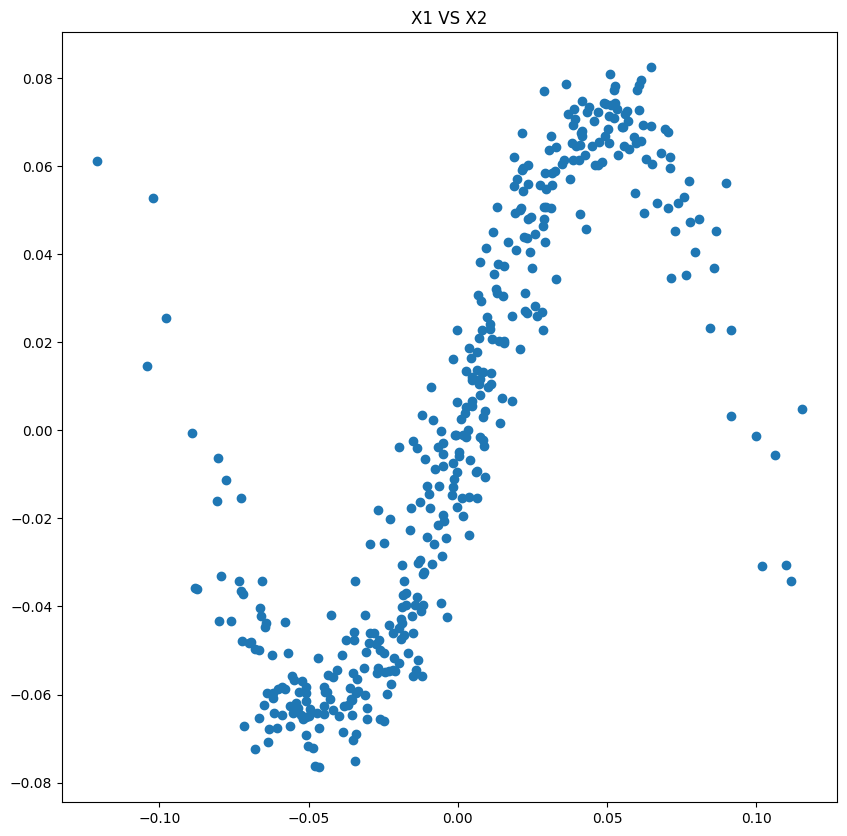

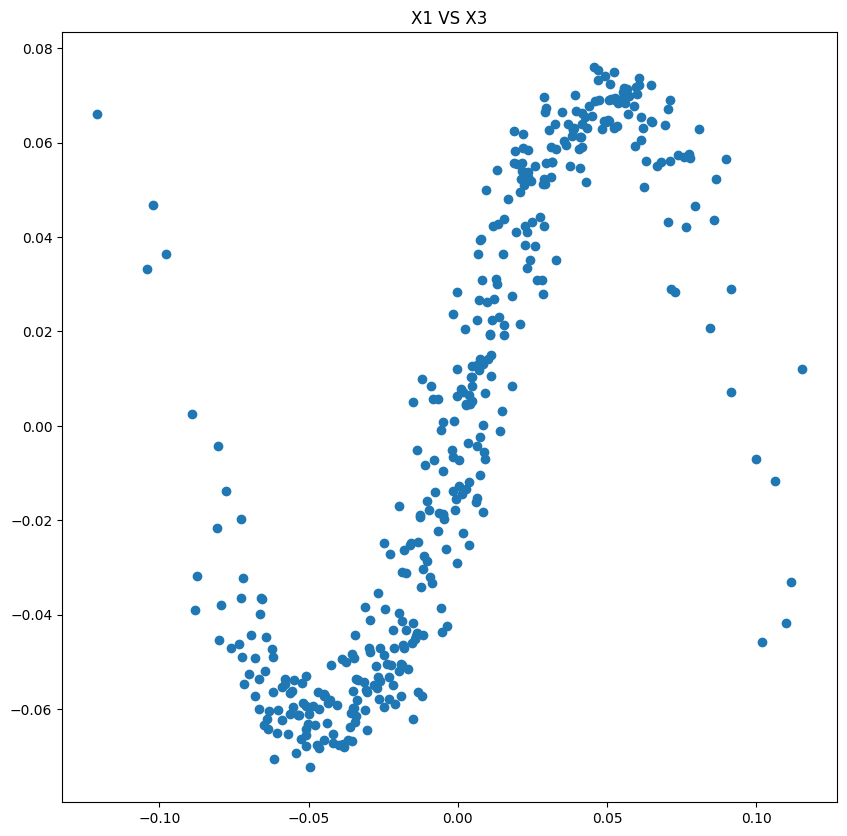

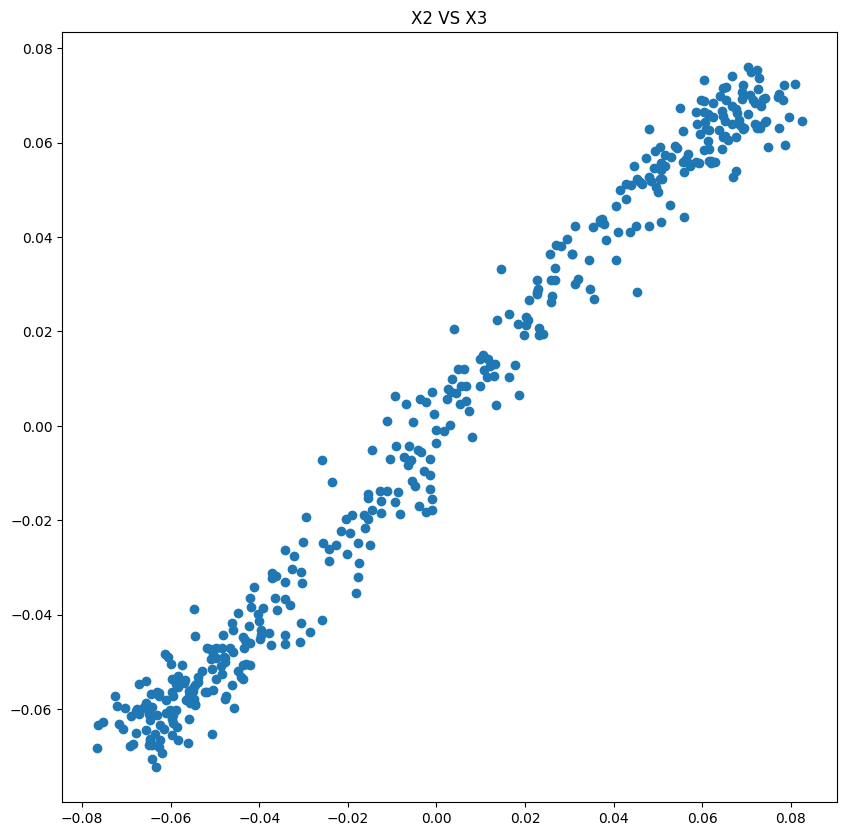

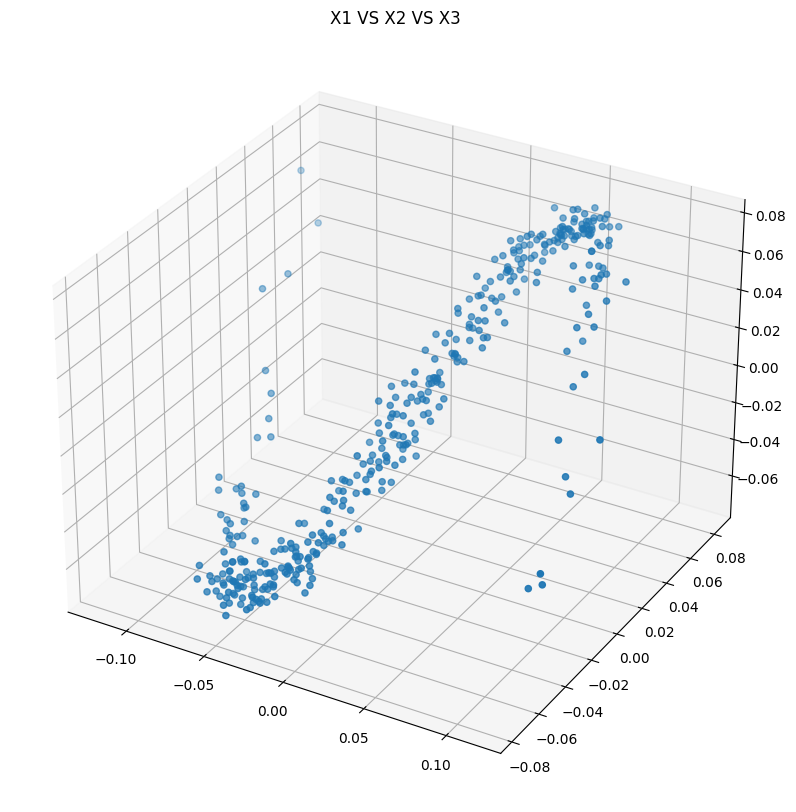

In [39]:
U, loss, outputs = solver.test(views, apply_linear_gcca)
for i in range(len(outputs)):
    outputs[i] = outputs[i].cpu()
for i in range(3):
    for j in range(i+1,3):
        plt.figure(figsize=(10,10))
        plt.scatter(outputs[i],outputs[j])
        plt.title('X'+str(i+1)+' VS X'+str(j+1))
        plt.show()
fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(projection='3d')
ax3d.scatter(outputs[0],outputs[1],outputs[2]) 
plt.title('X1 VS X2 VS X3')
plt.show()


In [40]:
N = 400
views = create_synthData_new(N,mode=3,F=20)
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to(device)

U_sum = []
outputs_sum = []
test = []
for i in range(3):
    testm = torch.eye(20)
    test.append(testm)
    
import pandas as pd
for _ in range(100):

    # size of the input for view 1 and view 2
    input_shape_list = [view.shape[-1] for view in views]

    # Building, training, and producing the new features by DCCA
    model = DeepGCCA(layer_sizes_list, input_shape_list, outdim_size,
                             use_all_singular_values, device=device).double()
    l_gcca = None
    if apply_linear_gcca:
        l_gcca = linear_gcca
    solver = Solver(model, l_gcca, outdim_size, epoch_num, batch_size,
                    learning_rate, reg_par, device=device)
    # train1, train2 = data1[0][0], data2[0][0]
    # val1, val2 = data1[1][0], data2[1][0]
    # test1, test2 = data1[2][0], data2[2][0]

    solver.fit(views, checkpoint=save_name)


    # TODO: Save l_gcca model if needed
    _ , _, outputs_def = solver.test(test, apply_linear_gcca)

    A = outputs_def[0]
    B = outputs_def[1]
    C = outputs_def[2]
    U = [A,B,C]

    A = outputs_def[0]
    B = outputs_def[1]
    C = outputs_def[2]

    os = [A,B,C]
    U_sum.append(U)
    outputs_sum.append(os)
    

#variables = pd.DataFrame(U_sum)
#results = pd.DataFrame(results_sum)

ACC = []
F1 = []
MCC = []
Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
for i in range(10):
    acc,f1,mcc = FS_MCC(U_sum[i],Label)
    ACC.append(acc)
    F1.append(f1)
    MCC.append(mcc)

print(np.mean(ACC),np.std(ACC))
print(np.mean(F1),np.std(F1))
print(np.mean(MCC),np.std(MCC))

[ INFO : 2023-05-31 17:14:32,608 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
    )
  )
)
[ INFO : 2023-05-31 17:14:32,637 ] - Adam (
Parameter Group

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


[ INFO : 2023-05-31 17:14:32,845 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0149
[ INFO : 2023-05-31 17:14:32,878 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2750
[ INFO : 2023-05-31 17:14:32,911 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4749
[ INFO : 2023-05-31 17:14:32,943 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6330
[ INFO : 2023-05-31 17:14:32,977 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7609
[ INFO : 2023-05-31 17:14:33,009 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8665
[ INFO : 2023-05-31 17:14:33,042 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9551
[ INFO : 2023-05-31 17:14:33,077 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0305
[ INFO : 2023-05-31 17:14:33,110 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0954
[ INFO : 2023-05-31 17:14:33,145 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1521
[ INFO : 2023-05-31 17:14:33,178 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.2020
[ INFO : 2023-05-31 17:14:33,212 ] -

[ INFO : 2023-05-31 17:14:36,059 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8513
[ INFO : 2023-05-31 17:14:36,090 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:36,296 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8854
[ INFO : 2023-05-31 17:14:36,331 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0499
[ INFO : 2023-05-31 17:14:36,365 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1708
[ INFO : 2023-05-31 17:14:36,399 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2634
[ INFO : 2023-05-31 17:14:36,433 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3367
[ INFO : 2023-05-31 17:14:36,467 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3961
[ INFO : 2023-05-31 17:14:36,500 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4454
[ INFO : 2023-05-31 17:14:36,534 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4871
[ INFO : 2023-05-31 17:14:36,568 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5228
[ INFO : 2023-05-31 17:14:36,602 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5536
[ INFO : 2023-05-31 17:14:36,635 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5805
[ INFO : 2023-05-31 17:14:36,668 ] - 

[ INFO : 2023-05-31 17:14:39,449 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9148
[ INFO : 2023-05-31 17:14:39,483 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9155
[ INFO : 2023-05-31 17:14:39,513 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:14:39,753 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.4491
[ INFO : 2023-05-31 17:14:39,787 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7856
[ INFO : 2023-05-31 17:14:39,820 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.0382
[ INFO : 2023-05-31 17:14:39,854 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.2356
[ INFO : 2023-05-31 17:14:39,887 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.3951
[ INFO : 2023-05-31 17:14:39,921 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5273
[ INFO : 2023-05-31 17:14:39,955 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.6390
[ INFO : 2023-05-31 17:14:39,988 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.7347
[ INFO : 2023-05-31 17:14:40,021 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.8178
[ INFO : 2023-05-31 17:14:40,054 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8905
[ INFO : 2023-05-31 17:14:40,088 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.9548
[ INFO : 2023-05-31 17:14:40,122 ] -

[ INFO : 2023-05-31 17:14:42,970 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8097
[ INFO : 2023-05-31 17:14:43,000 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:43,237 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1991
[ INFO : 2023-05-31 17:14:43,270 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2992
[ INFO : 2023-05-31 17:14:43,303 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3762
[ INFO : 2023-05-31 17:14:43,337 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4373
[ INFO : 2023-05-31 17:14:43,371 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4870
[ INFO : 2023-05-31 17:14:43,409 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5284
[ INFO : 2023-05-31 17:14:43,445 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5634
[ INFO : 2023-05-31 17:14:43,478 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5935
[ INFO : 2023-05-31 17:14:43,511 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6198
[ INFO : 2023-05-31 17:14:43,545 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6427
[ INFO : 2023-05-31 17:14:43,578 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.6629
[ INFO : 2023-05-31 17:14:43,613 ] -

[ INFO : 2023-05-31 17:14:46,397 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9259
[ INFO : 2023-05-31 17:14:46,427 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:46,637 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6921
[ INFO : 2023-05-31 17:14:46,671 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8926
[ INFO : 2023-05-31 17:14:46,705 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0386
[ INFO : 2023-05-31 17:14:46,738 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1488
[ INFO : 2023-05-31 17:14:46,771 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2348
[ INFO : 2023-05-31 17:14:46,805 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3041
[ INFO : 2023-05-31 17:14:46,838 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3615
[ INFO : 2023-05-31 17:14:46,871 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4101
[ INFO : 2023-05-31 17:14:46,906 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4517
[ INFO : 2023-05-31 17:14:46,939 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4877
[ INFO : 2023-05-31 17:14:46,972 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5191
[ INFO : 2023-05-31 17:14:47,006 ] - 

[ INFO : 2023-05-31 17:14:49,856 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9063
[ INFO : 2023-05-31 17:14:49,889 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9070
[ INFO : 2023-05-31 17:14:49,917 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:14:50,084 ] - Epoch 4/100 - time: 0.03 - training_loss: -1.4066
[ INFO : 2023-05-31 17:14:50,117 ] - Epoch 5/100 - time: 0.03 - training_loss: -1.6065
[ INFO : 2023-05-31 17:14:50,151 ] - Epoch 6/100 - time: 0.03 - training_loss: -2.0051
[ INFO : 2023-05-31 17:14:50,183 ] - Epoch 7/100 - time: 0.03 - training_loss: -2.4501
[ INFO : 2023-05-31 17:14:50,217 ] - Epoch 8/100 - time: 0.03 - training_loss: -2.8209
[ INFO : 2023-05-31 17:14:50,249 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.1258
[ INFO : 2023-05-31 17:14:50,281 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.3829
[ INFO : 2023-05-31 17:14:50,314 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.6014
[ INFO : 2023-05-31 17:14:50,346 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.7880
[ INFO : 2023-05-31 17:14:50,379 ] - Epoch 13/100 - time: 0.03 - training_loss: -3.9484
[ INFO : 2023-05-31 17:14:50,412 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.0871
[ INFO : 2023-05-31 17:14:50,445 ] - E

[ INFO : 2023-05-31 17:14:53,234 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.6959
[ INFO : 2023-05-31 17:14:53,266 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.6988
[ INFO : 2023-05-31 17:14:53,298 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7016
[ INFO : 2023-05-31 17:14:53,326 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:14:53,565 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3749
[ INFO : 2023-05-31 17:14:53,598 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5885
[ INFO : 2023-05-31 17:14:53,631 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7504
[ INFO : 2023-05-31 17:14:53,665 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8766
[ INFO : 2023-05-31 17:14:53,699 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9787
[ INFO : 2023-05-31 17:14:53,731 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0636
[ INFO : 2023-05-31 17:14:53,764 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1357
[ INFO : 2023-05-31 17:14:53,796 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1975
[ INFO : 2023-05-31 17:14:53,829 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2510
[ INFO : 2023-05-31 17:14:53,862 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2979
[ INFO : 2023-05-31 17:14:53,894 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.3390
[ INFO : 2023-05-31 17:14:53,929 ] -

[ INFO : 2023-05-31 17:14:56,684 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8732
[ INFO : 2023-05-31 17:14:56,713 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:14:56,913 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.3169
[ INFO : 2023-05-31 17:14:56,947 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.6544
[ INFO : 2023-05-31 17:14:56,979 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9162
[ INFO : 2023-05-31 17:14:57,012 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1279
[ INFO : 2023-05-31 17:14:57,044 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.3015
[ INFO : 2023-05-31 17:14:57,077 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4448
[ INFO : 2023-05-31 17:14:57,110 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5643
[ INFO : 2023-05-31 17:14:57,143 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.6657
[ INFO : 2023-05-31 17:14:57,177 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.7533
[ INFO : 2023-05-31 17:14:57,212 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.8303
[ INFO : 2023-05-31 17:14:57,244 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8987
[ INFO : 2023-05-31 17:14:57,277 ] - 

[ INFO : 2023-05-31 17:15:00,071 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8068
[ INFO : 2023-05-31 17:15:00,106 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8085
[ INFO : 2023-05-31 17:15:00,135 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:00,308 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.5125
[ INFO : 2023-05-31 17:15:00,341 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.7819
[ INFO : 2023-05-31 17:15:00,375 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9637
[ INFO : 2023-05-31 17:15:00,409 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0959
[ INFO : 2023-05-31 17:15:00,444 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1976
[ INFO : 2023-05-31 17:15:00,478 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2789
[ INFO : 2023-05-31 17:15:00,511 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3454
[ INFO : 2023-05-31 17:15:00,545 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4005
[ INFO : 2023-05-31 17:15:00,578 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4468
[ INFO : 2023-05-31 17:15:00,610 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4862
[ INFO : 2023-05-31 17:15:00,643 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5202
[ INFO : 2023-05-31 17:15:00,676 ] - E

[ INFO : 2023-05-31 17:15:03,552 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9106
[ INFO : 2023-05-31 17:15:03,586 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9113
[ INFO : 2023-05-31 17:15:03,620 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9119
[ INFO : 2023-05-31 17:15:03,649 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:15:03,848 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8707
[ INFO : 2023-05-31 17:15:03,881 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1528
[ INFO : 2023-05-31 17:15:03,914 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3675
[ INFO : 2023-05-31 17:15:03,947 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5371
[ INFO : 2023-05-31 17:15:03,980 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6750
[ INFO : 2023-05-31 17:15:04,013 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7895
[ INFO : 2023-05-31 17:15:04,045 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8859
[ INFO : 2023-05-31 17:15:04,079 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9680
[ INFO : 2023-05-31 17:15:04,113 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0385
[ INFO : 2023-05-31 17:15:04,148 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0999
[ INFO : 2023-05-31 17:15:04,183 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1537
[ INFO : 2023-05-31 17:15:04,219 ] - 

[ INFO : 2023-05-31 17:15:06,965 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8468
[ INFO : 2023-05-31 17:15:06,999 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8481
[ INFO : 2023-05-31 17:15:07,027 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:07,231 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.5461
[ INFO : 2023-05-31 17:15:07,264 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9067
[ INFO : 2023-05-31 17:15:07,297 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1745
[ INFO : 2023-05-31 17:15:07,330 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3772
[ INFO : 2023-05-31 17:15:07,363 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.5370
[ INFO : 2023-05-31 17:15:07,395 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.6683
[ INFO : 2023-05-31 17:15:07,428 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7786
[ INFO : 2023-05-31 17:15:07,461 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8723
[ INFO : 2023-05-31 17:15:07,495 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9524
[ INFO : 2023-05-31 17:15:07,528 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0215
[ INFO : 2023-05-31 17:15:07,561 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.0818
[ INFO : 2023-05-31 17:15:07,593 ] - 

[ INFO : 2023-05-31 17:15:10,628 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8383
[ INFO : 2023-05-31 17:15:10,660 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8397
[ INFO : 2023-05-31 17:15:10,688 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:10,921 ] - Epoch 6/100 - time: 0.03 - training_loss: -1.7221
[ INFO : 2023-05-31 17:15:10,954 ] - Epoch 7/100 - time: 0.03 - training_loss: -1.8563
[ INFO : 2023-05-31 17:15:10,988 ] - Epoch 8/100 - time: 0.03 - training_loss: -2.0809
[ INFO : 2023-05-31 17:15:11,021 ] - Epoch 9/100 - time: 0.03 - training_loss: -2.3263
[ INFO : 2023-05-31 17:15:11,053 ] - Epoch 10/100 - time: 0.03 - training_loss: -2.5235
[ INFO : 2023-05-31 17:15:11,085 ] - Epoch 11/100 - time: 0.03 - training_loss: -2.6731
[ INFO : 2023-05-31 17:15:11,118 ] - Epoch 12/100 - time: 0.03 - training_loss: -2.7983
[ INFO : 2023-05-31 17:15:11,152 ] - Epoch 13/100 - time: 0.03 - training_loss: -2.9148
[ INFO : 2023-05-31 17:15:11,188 ] - Epoch 14/100 - time: 0.03 - training_loss: -3.0291
[ INFO : 2023-05-31 17:15:11,223 ] - Epoch 15/100 - time: 0.03 - training_loss: -3.1411
[ INFO : 2023-05-31 17:15:11,257 ] - Epoch 16/100 - time: 0.03 - training_loss: -3.2485
[ INFO : 2023-05-31 17:15:11,290 ] -

[ INFO : 2023-05-31 17:15:14,057 ] - Epoch 100/100 - time: 0.05 - training_loss: -5.4680
[ INFO : 2023-05-31 17:15:14,086 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:15:14,263 ] - Epoch 4/100 - time: 0.03 - training_loss: -5.0288
[ INFO : 2023-05-31 17:15:14,301 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.1915
[ INFO : 2023-05-31 17:15:14,335 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3024
[ INFO : 2023-05-31 17:15:14,369 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3855
[ INFO : 2023-05-31 17:15:14,403 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4514
[ INFO : 2023-05-31 17:15:14,437 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5050
[ INFO : 2023-05-31 17:15:14,471 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5491
[ INFO : 2023-05-31 17:15:14,505 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5858
[ INFO : 2023-05-31 17:15:14,539 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6167
[ INFO : 2023-05-31 17:15:14,573 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6430
[ INFO : 2023-05-31 17:15:14,606 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6658
[ INFO : 2023-05-31 17:15:14,639 ] - E

[ INFO : 2023-05-31 17:15:17,497 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9315
[ INFO : 2023-05-31 17:15:17,532 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9320
[ INFO : 2023-05-31 17:15:17,566 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9324
[ INFO : 2023-05-31 17:15:17,595 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:15:17,798 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.2294
[ INFO : 2023-05-31 17:15:17,832 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4827
[ INFO : 2023-05-31 17:15:17,864 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6739
[ INFO : 2023-05-31 17:15:17,897 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8226
[ INFO : 2023-05-31 17:15:17,930 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9412
[ INFO : 2023-05-31 17:15:17,962 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0377
[ INFO : 2023-05-31 17:15:17,995 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1175
[ INFO : 2023-05-31 17:15:18,030 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1846
[ INFO : 2023-05-31 17:15:18,063 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2418
[ INFO : 2023-05-31 17:15:18,097 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2912
[ INFO : 2023-05-31 17:15:18,130 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3343
[ INFO : 2023-05-31 17:15:18,165 ] - 

[ INFO : 2023-05-31 17:15:20,983 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8766
[ INFO : 2023-05-31 17:15:21,015 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8776
[ INFO : 2023-05-31 17:15:21,045 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:21,253 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.0745
[ INFO : 2023-05-31 17:15:21,288 ] - Epoch 6/100 - time: 0.03 - training_loss: -2.5012
[ INFO : 2023-05-31 17:15:21,322 ] - Epoch 7/100 - time: 0.03 - training_loss: -2.8438
[ INFO : 2023-05-31 17:15:21,355 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.1361
[ INFO : 2023-05-31 17:15:21,390 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.3809
[ INFO : 2023-05-31 17:15:21,423 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.5857
[ INFO : 2023-05-31 17:15:21,457 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.7601
[ INFO : 2023-05-31 17:15:21,491 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.9120
[ INFO : 2023-05-31 17:15:21,524 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.0459
[ INFO : 2023-05-31 17:15:21,560 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.1645
[ INFO : 2023-05-31 17:15:21,593 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.2696
[ INFO : 2023-05-31 17:15:21,625 ] - 

[ INFO : 2023-05-31 17:15:24,417 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.6982
[ INFO : 2023-05-31 17:15:24,450 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7010
[ INFO : 2023-05-31 17:15:24,479 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:24,682 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.1092
[ INFO : 2023-05-31 17:15:24,715 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.5381
[ INFO : 2023-05-31 17:15:24,749 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.8580
[ INFO : 2023-05-31 17:15:24,781 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1039
[ INFO : 2023-05-31 17:15:24,815 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.2990
[ INFO : 2023-05-31 17:15:24,848 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4570
[ INFO : 2023-05-31 17:15:24,880 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5873
[ INFO : 2023-05-31 17:15:24,913 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.6970
[ INFO : 2023-05-31 17:15:24,946 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.7910
[ INFO : 2023-05-31 17:15:24,978 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.8724
[ INFO : 2023-05-31 17:15:25,011 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.9436
[ INFO : 2023-05-31 17:15:25,043 ] - 

[ INFO : 2023-05-31 17:15:27,840 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8181
[ INFO : 2023-05-31 17:15:27,873 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8197
[ INFO : 2023-05-31 17:15:27,901 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:28,106 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7268
[ INFO : 2023-05-31 17:15:28,140 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0754
[ INFO : 2023-05-31 17:15:28,173 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3318
[ INFO : 2023-05-31 17:15:28,205 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5256
[ INFO : 2023-05-31 17:15:28,238 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6770
[ INFO : 2023-05-31 17:15:28,271 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7992
[ INFO : 2023-05-31 17:15:28,304 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9004
[ INFO : 2023-05-31 17:15:28,339 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9858
[ INFO : 2023-05-31 17:15:28,371 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0589
[ INFO : 2023-05-31 17:15:28,404 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1222
[ INFO : 2023-05-31 17:15:28,437 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1778
[ INFO : 2023-05-31 17:15:28,470 ] - 

[ INFO : 2023-05-31 17:15:31,243 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8545
[ INFO : 2023-05-31 17:15:31,275 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8557
[ INFO : 2023-05-31 17:15:31,304 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:31,537 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0636
[ INFO : 2023-05-31 17:15:31,570 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3086
[ INFO : 2023-05-31 17:15:31,603 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4995
[ INFO : 2023-05-31 17:15:31,637 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6512
[ INFO : 2023-05-31 17:15:31,725 ] - Epoch 10/100 - time: 0.08 - training_loss: -4.7740
[ INFO : 2023-05-31 17:15:31,759 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8754
[ INFO : 2023-05-31 17:15:31,792 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9607
[ INFO : 2023-05-31 17:15:31,825 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0336
[ INFO : 2023-05-31 17:15:31,858 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0968
[ INFO : 2023-05-31 17:15:31,891 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1521
[ INFO : 2023-05-31 17:15:31,924 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.2009
[ INFO : 2023-05-31 17:15:31,957 ] -

[ INFO : 2023-05-31 17:15:34,750 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8502
[ INFO : 2023-05-31 17:15:34,779 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:15:34,989 ] - Epoch 5/100 - time: 0.03 - training_loss: -1.7549
[ INFO : 2023-05-31 17:15:35,023 ] - Epoch 6/100 - time: 0.03 - training_loss: -1.7682
[ INFO : 2023-05-31 17:15:35,056 ] - Epoch 7/100 - time: 0.03 - training_loss: -1.8873
[ INFO : 2023-05-31 17:15:35,090 ] - Epoch 8/100 - time: 0.03 - training_loss: -2.0950
[ INFO : 2023-05-31 17:15:35,124 ] - Epoch 9/100 - time: 0.03 - training_loss: -2.3510
[ INFO : 2023-05-31 17:15:35,158 ] - Epoch 10/100 - time: 0.03 - training_loss: -2.6033
[ INFO : 2023-05-31 17:15:35,191 ] - Epoch 11/100 - time: 0.03 - training_loss: -2.8210
[ INFO : 2023-05-31 17:15:35,225 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.0011
[ INFO : 2023-05-31 17:15:35,258 ] - Epoch 13/100 - time: 0.03 - training_loss: -3.1539
[ INFO : 2023-05-31 17:15:35,291 ] - Epoch 14/100 - time: 0.03 - training_loss: -3.2901
[ INFO : 2023-05-31 17:15:35,324 ] - Epoch 15/100 - time: 0.03 - training_loss: -3.4161
[ INFO : 2023-05-31 17:15:35,359 ] - 

[ INFO : 2023-05-31 17:15:38,232 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.5314
[ INFO : 2023-05-31 17:15:38,265 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.5358
[ INFO : 2023-05-31 17:15:38,294 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:38,497 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.7782
[ INFO : 2023-05-31 17:15:38,528 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.2457
[ INFO : 2023-05-31 17:15:38,560 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.5838
[ INFO : 2023-05-31 17:15:38,592 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.8433
[ INFO : 2023-05-31 17:15:38,625 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.0547
[ INFO : 2023-05-31 17:15:38,657 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.2313
[ INFO : 2023-05-31 17:15:38,691 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.3801
[ INFO : 2023-05-31 17:15:38,723 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.5061
[ INFO : 2023-05-31 17:15:38,756 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.6135
[ INFO : 2023-05-31 17:15:38,788 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7059
[ INFO : 2023-05-31 17:15:38,820 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.7860
[ INFO : 2023-05-31 17:15:38,852 ] - 

[ INFO : 2023-05-31 17:15:41,597 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7899
[ INFO : 2023-05-31 17:15:41,632 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7918
[ INFO : 2023-05-31 17:15:41,660 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:41,877 ] - Epoch 4/100 - time: 0.08 - training_loss: -4.4550
[ INFO : 2023-05-31 17:15:41,911 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.7321
[ INFO : 2023-05-31 17:15:41,943 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9194
[ INFO : 2023-05-31 17:15:41,975 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0564
[ INFO : 2023-05-31 17:15:42,008 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1618
[ INFO : 2023-05-31 17:15:42,040 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2456
[ INFO : 2023-05-31 17:15:42,078 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3136
[ INFO : 2023-05-31 17:15:42,113 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3701
[ INFO : 2023-05-31 17:15:42,147 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4178
[ INFO : 2023-05-31 17:15:42,180 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4587
[ INFO : 2023-05-31 17:15:42,214 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4940
[ INFO : 2023-05-31 17:15:42,247 ] - E

[ INFO : 2023-05-31 17:15:45,017 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9059
[ INFO : 2023-05-31 17:15:45,052 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9066
[ INFO : 2023-05-31 17:15:45,086 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9074
[ INFO : 2023-05-31 17:15:45,115 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:15:45,328 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4621
[ INFO : 2023-05-31 17:15:45,362 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6888
[ INFO : 2023-05-31 17:15:45,397 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8526
[ INFO : 2023-05-31 17:15:45,432 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9798
[ INFO : 2023-05-31 17:15:45,466 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0820
[ INFO : 2023-05-31 17:15:45,501 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1649
[ INFO : 2023-05-31 17:15:45,536 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2333
[ INFO : 2023-05-31 17:15:45,569 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2909
[ INFO : 2023-05-31 17:15:45,603 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3406
[ INFO : 2023-05-31 17:15:45,637 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.3838
[ INFO : 2023-05-31 17:15:45,670 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.4216
[ INFO : 2023-05-31 17:15:45,703 ] - 

[ INFO : 2023-05-31 17:15:48,543 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8909
[ INFO : 2023-05-31 17:15:48,576 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8918
[ INFO : 2023-05-31 17:15:48,605 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:48,813 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.9046
[ INFO : 2023-05-31 17:15:48,845 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2265
[ INFO : 2023-05-31 17:15:48,878 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4600
[ INFO : 2023-05-31 17:15:48,913 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6375
[ INFO : 2023-05-31 17:15:48,946 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7777
[ INFO : 2023-05-31 17:15:48,979 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8920
[ INFO : 2023-05-31 17:15:49,012 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9873
[ INFO : 2023-05-31 17:15:49,045 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0678
[ INFO : 2023-05-31 17:15:49,079 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1364
[ INFO : 2023-05-31 17:15:49,112 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1954
[ INFO : 2023-05-31 17:15:49,145 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2467
[ INFO : 2023-05-31 17:15:49,180 ] - 

[ INFO : 2023-05-31 17:15:51,968 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8653
[ INFO : 2023-05-31 17:15:52,001 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8664
[ INFO : 2023-05-31 17:15:52,030 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:52,235 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.9743
[ INFO : 2023-05-31 17:15:52,267 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.4024
[ INFO : 2023-05-31 17:15:52,301 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7285
[ INFO : 2023-05-31 17:15:52,334 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.9851
[ INFO : 2023-05-31 17:15:52,367 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.1913
[ INFO : 2023-05-31 17:15:52,400 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.3593
[ INFO : 2023-05-31 17:15:52,434 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.4978
[ INFO : 2023-05-31 17:15:52,466 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.6137
[ INFO : 2023-05-31 17:15:52,500 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.7121
[ INFO : 2023-05-31 17:15:52,532 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7970
[ INFO : 2023-05-31 17:15:52,612 ] - Epoch 15/100 - time: 0.08 - training_loss: -4.8713
[ INFO : 2023-05-31 17:15:52,645 ] - 

[ INFO : 2023-05-31 17:15:55,461 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8061
[ INFO : 2023-05-31 17:15:55,494 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8078
[ INFO : 2023-05-31 17:15:55,524 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:55,730 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6975
[ INFO : 2023-05-31 17:15:55,763 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8940
[ INFO : 2023-05-31 17:15:55,795 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0375
[ INFO : 2023-05-31 17:15:55,827 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1461
[ INFO : 2023-05-31 17:15:55,859 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2317
[ INFO : 2023-05-31 17:15:55,891 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3017
[ INFO : 2023-05-31 17:15:55,924 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3602
[ INFO : 2023-05-31 17:15:55,957 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4098
[ INFO : 2023-05-31 17:15:55,989 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4519
[ INFO : 2023-05-31 17:15:56,022 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4880
[ INFO : 2023-05-31 17:15:56,055 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5194
[ INFO : 2023-05-31 17:15:56,087 ] - 

[ INFO : 2023-05-31 17:15:58,907 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9066
[ INFO : 2023-05-31 17:15:58,940 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9073
[ INFO : 2023-05-31 17:15:58,969 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:15:59,206 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2819
[ INFO : 2023-05-31 17:15:59,238 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5135
[ INFO : 2023-05-31 17:15:59,270 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6879
[ INFO : 2023-05-31 17:15:59,302 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8245
[ INFO : 2023-05-31 17:15:59,335 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9348
[ INFO : 2023-05-31 17:15:59,367 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0259
[ INFO : 2023-05-31 17:15:59,398 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1024
[ INFO : 2023-05-31 17:15:59,430 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1674
[ INFO : 2023-05-31 17:15:59,463 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2234
[ INFO : 2023-05-31 17:15:59,496 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2721
[ INFO : 2023-05-31 17:15:59,528 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.3149
[ INFO : 2023-05-31 17:15:59,560 ] -

[ INFO : 2023-05-31 17:16:02,316 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8699
[ INFO : 2023-05-31 17:16:02,344 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:16:02,551 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.3980
[ INFO : 2023-05-31 17:16:02,585 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.6988
[ INFO : 2023-05-31 17:16:02,618 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9520
[ INFO : 2023-05-31 17:16:02,650 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1610
[ INFO : 2023-05-31 17:16:02,682 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.3323
[ INFO : 2023-05-31 17:16:02,716 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4738
[ INFO : 2023-05-31 17:16:02,750 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5933
[ INFO : 2023-05-31 17:16:02,782 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.6963
[ INFO : 2023-05-31 17:16:02,815 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.7863
[ INFO : 2023-05-31 17:16:02,848 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.8655
[ INFO : 2023-05-31 17:16:02,880 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.9354
[ INFO : 2023-05-31 17:16:02,913 ] - 

[ INFO : 2023-05-31 17:16:05,757 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8150
[ INFO : 2023-05-31 17:16:05,791 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8166
[ INFO : 2023-05-31 17:16:05,819 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:06,026 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.3685
[ INFO : 2023-05-31 17:16:06,059 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.7656
[ INFO : 2023-05-31 17:16:06,093 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.0590
[ INFO : 2023-05-31 17:16:06,127 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.2839
[ INFO : 2023-05-31 17:16:06,161 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.4610
[ INFO : 2023-05-31 17:16:06,215 ] - Epoch 10/100 - time: 0.05 - training_loss: -4.6034
[ INFO : 2023-05-31 17:16:06,251 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7208
[ INFO : 2023-05-31 17:16:06,286 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8198
[ INFO : 2023-05-31 17:16:06,322 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9048
[ INFO : 2023-05-31 17:16:06,356 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.9787
[ INFO : 2023-05-31 17:16:06,392 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.0433
[ INFO : 2023-05-31 17:16:06,427 ] - 

[ INFO : 2023-05-31 17:16:09,258 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8333
[ INFO : 2023-05-31 17:16:09,292 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8348
[ INFO : 2023-05-31 17:16:09,321 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:09,553 ] - Epoch 4/100 - time: 0.09 - training_loss: -1.9588
[ INFO : 2023-05-31 17:16:09,586 ] - Epoch 5/100 - time: 0.03 - training_loss: -1.8989
[ INFO : 2023-05-31 17:16:09,619 ] - Epoch 6/100 - time: 0.03 - training_loss: -1.9579
[ INFO : 2023-05-31 17:16:09,652 ] - Epoch 7/100 - time: 0.03 - training_loss: -2.1422
[ INFO : 2023-05-31 17:16:09,685 ] - Epoch 8/100 - time: 0.03 - training_loss: -2.3637
[ INFO : 2023-05-31 17:16:09,718 ] - Epoch 9/100 - time: 0.03 - training_loss: -2.5191
[ INFO : 2023-05-31 17:16:09,753 ] - Epoch 10/100 - time: 0.03 - training_loss: -2.6764
[ INFO : 2023-05-31 17:16:09,786 ] - Epoch 11/100 - time: 0.03 - training_loss: -2.8545
[ INFO : 2023-05-31 17:16:09,821 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.0343
[ INFO : 2023-05-31 17:16:09,856 ] - Epoch 13/100 - time: 0.03 - training_loss: -3.2050
[ INFO : 2023-05-31 17:16:09,891 ] - Epoch 14/100 - time: 0.03 - training_loss: -3.3671
[ INFO : 2023-05-31 17:16:09,924 ] - E

[ INFO : 2023-05-31 17:16:12,687 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.5779
[ INFO : 2023-05-31 17:16:12,719 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.5819
[ INFO : 2023-05-31 17:16:12,752 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.5859
[ INFO : 2023-05-31 17:16:12,781 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:16:12,992 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7211
[ INFO : 2023-05-31 17:16:13,025 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0486
[ INFO : 2023-05-31 17:16:13,058 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2982
[ INFO : 2023-05-31 17:16:13,091 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4925
[ INFO : 2023-05-31 17:16:13,124 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6456
[ INFO : 2023-05-31 17:16:13,157 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7686
[ INFO : 2023-05-31 17:16:13,190 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8702
[ INFO : 2023-05-31 17:16:13,222 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9562
[ INFO : 2023-05-31 17:16:13,255 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0302
[ INFO : 2023-05-31 17:16:13,288 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0947
[ INFO : 2023-05-31 17:16:13,321 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1512
[ INFO : 2023-05-31 17:16:13,354 ] - 

[ INFO : 2023-05-31 17:16:16,178 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8493
[ INFO : 2023-05-31 17:16:16,212 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8505
[ INFO : 2023-05-31 17:16:16,241 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:16,451 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.9737
[ INFO : 2023-05-31 17:16:16,485 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2765
[ INFO : 2023-05-31 17:16:16,519 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5028
[ INFO : 2023-05-31 17:16:16,553 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6756
[ INFO : 2023-05-31 17:16:16,587 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8113
[ INFO : 2023-05-31 17:16:16,621 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9207
[ INFO : 2023-05-31 17:16:16,654 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0106
[ INFO : 2023-05-31 17:16:16,689 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0860
[ INFO : 2023-05-31 17:16:16,722 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1506
[ INFO : 2023-05-31 17:16:16,756 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2069
[ INFO : 2023-05-31 17:16:16,792 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2564
[ INFO : 2023-05-31 17:16:16,826 ] - 

[ INFO : 2023-05-31 17:16:19,666 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8662
[ INFO : 2023-05-31 17:16:19,700 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8673
[ INFO : 2023-05-31 17:16:19,728 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:19,938 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.4701
[ INFO : 2023-05-31 17:16:19,972 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.8514
[ INFO : 2023-05-31 17:16:20,005 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1325
[ INFO : 2023-05-31 17:16:20,039 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3487
[ INFO : 2023-05-31 17:16:20,073 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.5199
[ INFO : 2023-05-31 17:16:20,106 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.6584
[ INFO : 2023-05-31 17:16:20,139 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7732
[ INFO : 2023-05-31 17:16:20,172 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8701
[ INFO : 2023-05-31 17:16:20,206 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9528
[ INFO : 2023-05-31 17:16:20,239 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0237
[ INFO : 2023-05-31 17:16:20,272 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.0851
[ INFO : 2023-05-31 17:16:20,305 ] - 

[ INFO : 2023-05-31 17:16:23,123 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8398
[ INFO : 2023-05-31 17:16:23,156 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8412
[ INFO : 2023-05-31 17:16:23,184 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:23,424 ] - Epoch 6/100 - time: 0.03 - training_loss: -2.6596
[ INFO : 2023-05-31 17:16:23,458 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.0481
[ INFO : 2023-05-31 17:16:23,491 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.3566
[ INFO : 2023-05-31 17:16:23,525 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.6069
[ INFO : 2023-05-31 17:16:23,558 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.8152
[ INFO : 2023-05-31 17:16:23,592 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.9914
[ INFO : 2023-05-31 17:16:23,626 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.1419
[ INFO : 2023-05-31 17:16:23,659 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.2717
[ INFO : 2023-05-31 17:16:23,692 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.3844
[ INFO : 2023-05-31 17:16:23,726 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.4832
[ INFO : 2023-05-31 17:16:23,759 ] - Epoch 16/100 - time: 0.03 - training_loss: -4.5703
[ INFO : 2023-05-31 17:16:23,792 ] -

[ INFO : 2023-05-31 17:16:26,708 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7423
[ INFO : 2023-05-31 17:16:26,737 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:16:26,952 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.2456
[ INFO : 2023-05-31 17:16:26,986 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4933
[ INFO : 2023-05-31 17:16:27,021 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6753
[ INFO : 2023-05-31 17:16:27,056 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8193
[ INFO : 2023-05-31 17:16:27,092 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9369
[ INFO : 2023-05-31 17:16:27,127 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0340
[ INFO : 2023-05-31 17:16:27,162 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1148
[ INFO : 2023-05-31 17:16:27,197 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1830
[ INFO : 2023-05-31 17:16:27,231 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2411
[ INFO : 2023-05-31 17:16:27,265 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2913
[ INFO : 2023-05-31 17:16:27,300 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3350
[ INFO : 2023-05-31 17:16:27,336 ] - 

[ INFO : 2023-05-31 17:16:30,201 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8774
[ INFO : 2023-05-31 17:16:30,239 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8784
[ INFO : 2023-05-31 17:16:30,271 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:30,454 ] - Epoch 4/100 - time: 0.03 - training_loss: -5.0291
[ INFO : 2023-05-31 17:16:30,488 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.2054
[ INFO : 2023-05-31 17:16:30,522 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3260
[ INFO : 2023-05-31 17:16:30,555 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4142
[ INFO : 2023-05-31 17:16:30,590 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4816
[ INFO : 2023-05-31 17:16:30,624 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5342
[ INFO : 2023-05-31 17:16:30,657 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5766
[ INFO : 2023-05-31 17:16:30,690 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.6116
[ INFO : 2023-05-31 17:16:30,724 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6408
[ INFO : 2023-05-31 17:16:30,757 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6658
[ INFO : 2023-05-31 17:16:30,789 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6874
[ INFO : 2023-05-31 17:16:30,823 ] - E

[ INFO : 2023-05-31 17:16:33,676 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9350
[ INFO : 2023-05-31 17:16:33,709 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9355
[ INFO : 2023-05-31 17:16:33,742 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9359
[ INFO : 2023-05-31 17:16:33,771 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:16:33,975 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.0062
[ INFO : 2023-05-31 17:16:34,007 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.4175
[ INFO : 2023-05-31 17:16:34,039 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.7331
[ INFO : 2023-05-31 17:16:34,071 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.9788
[ INFO : 2023-05-31 17:16:34,104 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.1761
[ INFO : 2023-05-31 17:16:34,136 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.3375
[ INFO : 2023-05-31 17:16:34,168 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.4713
[ INFO : 2023-05-31 17:16:34,200 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.5846
[ INFO : 2023-05-31 17:16:34,233 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.6826
[ INFO : 2023-05-31 17:16:34,265 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7689
[ INFO : 2023-05-31 17:16:34,298 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8453
[ INFO : 2023-05-31 17:16:34,329 ] - 

[ INFO : 2023-05-31 17:16:37,040 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7999
[ INFO : 2023-05-31 17:16:37,073 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8017
[ INFO : 2023-05-31 17:16:37,102 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:37,308 ] - Epoch 3/100 - time: 0.03 - training_loss: -4.3915
[ INFO : 2023-05-31 17:16:37,342 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.7491
[ INFO : 2023-05-31 17:16:37,376 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.9694
[ INFO : 2023-05-31 17:16:37,409 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1214
[ INFO : 2023-05-31 17:16:37,442 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2343
[ INFO : 2023-05-31 17:16:37,475 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3210
[ INFO : 2023-05-31 17:16:37,509 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3891
[ INFO : 2023-05-31 17:16:37,544 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4440
[ INFO : 2023-05-31 17:16:37,581 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4895
[ INFO : 2023-05-31 17:16:37,617 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5278
[ INFO : 2023-05-31 17:16:37,651 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5607
[ INFO : 2023-05-31 17:16:37,685 ] - Ep

[ INFO : 2023-05-31 17:16:40,451 ] - Epoch 97/100 - time: 0.03 - training_loss: -5.9198
[ INFO : 2023-05-31 17:16:40,486 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9204
[ INFO : 2023-05-31 17:16:40,519 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9209
[ INFO : 2023-05-31 17:16:40,552 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9215
[ INFO : 2023-05-31 17:16:40,581 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(12

Linear CCA started!


[ INFO : 2023-05-31 17:16:40,795 ] - Epoch 5/100 - time: 0.03 - training_loss: -1.7663
[ INFO : 2023-05-31 17:16:40,828 ] - Epoch 6/100 - time: 0.03 - training_loss: -1.6535
[ INFO : 2023-05-31 17:16:40,860 ] - Epoch 7/100 - time: 0.03 - training_loss: -1.5982
[ INFO : 2023-05-31 17:16:40,894 ] - Epoch 8/100 - time: 0.03 - training_loss: -1.6051
[ INFO : 2023-05-31 17:16:40,928 ] - Epoch 9/100 - time: 0.03 - training_loss: -1.6949
[ INFO : 2023-05-31 17:16:40,961 ] - Epoch 10/100 - time: 0.03 - training_loss: -1.8825
[ INFO : 2023-05-31 17:16:41,014 ] - Epoch 11/100 - time: 0.05 - training_loss: -2.1263
[ INFO : 2023-05-31 17:16:41,048 ] - Epoch 12/100 - time: 0.03 - training_loss: -2.3661
[ INFO : 2023-05-31 17:16:41,083 ] - Epoch 13/100 - time: 0.03 - training_loss: -2.5822
[ INFO : 2023-05-31 17:16:41,118 ] - Epoch 14/100 - time: 0.03 - training_loss: -2.7760
[ INFO : 2023-05-31 17:16:41,153 ] - Epoch 15/100 - time: 0.03 - training_loss: -2.9518
[ INFO : 2023-05-31 17:16:41,187 ] - 

[ INFO : 2023-05-31 17:16:44,088 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.4802
[ INFO : 2023-05-31 17:16:44,122 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.4852
[ INFO : 2023-05-31 17:16:44,152 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:44,364 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.2283
[ INFO : 2023-05-31 17:16:44,398 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.6049
[ INFO : 2023-05-31 17:16:44,432 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.8907
[ INFO : 2023-05-31 17:16:44,464 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.1147
[ INFO : 2023-05-31 17:16:44,498 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.2969
[ INFO : 2023-05-31 17:16:44,532 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.4483
[ INFO : 2023-05-31 17:16:44,564 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.5755
[ INFO : 2023-05-31 17:16:44,598 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.6833
[ INFO : 2023-05-31 17:16:44,631 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.7758
[ INFO : 2023-05-31 17:16:44,665 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.8562
[ INFO : 2023-05-31 17:16:44,698 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.9267
[ INFO : 2023-05-31 17:16:44,732 ] - 

[ INFO : 2023-05-31 17:16:47,512 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8140
[ INFO : 2023-05-31 17:16:47,544 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8156
[ INFO : 2023-05-31 17:16:47,573 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:47,779 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4087
[ INFO : 2023-05-31 17:16:47,811 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6489
[ INFO : 2023-05-31 17:16:47,844 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8235
[ INFO : 2023-05-31 17:16:47,877 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9551
[ INFO : 2023-05-31 17:16:47,911 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0585
[ INFO : 2023-05-31 17:16:47,944 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1426
[ INFO : 2023-05-31 17:16:47,979 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2129
[ INFO : 2023-05-31 17:16:48,012 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2727
[ INFO : 2023-05-31 17:16:48,045 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3241
[ INFO : 2023-05-31 17:16:48,079 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.3689
[ INFO : 2023-05-31 17:16:48,112 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.4081
[ INFO : 2023-05-31 17:16:48,146 ] - 

[ INFO : 2023-05-31 17:16:50,982 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8891
[ INFO : 2023-05-31 17:16:51,015 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8900
[ INFO : 2023-05-31 17:16:51,045 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:16:51,227 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.4745
[ INFO : 2023-05-31 17:16:51,261 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.7464
[ INFO : 2023-05-31 17:16:51,295 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9360
[ INFO : 2023-05-31 17:16:51,330 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.0741
[ INFO : 2023-05-31 17:16:51,364 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1795
[ INFO : 2023-05-31 17:16:51,399 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2631
[ INFO : 2023-05-31 17:16:51,434 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3314
[ INFO : 2023-05-31 17:16:51,469 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3880
[ INFO : 2023-05-31 17:16:51,504 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4355
[ INFO : 2023-05-31 17:16:51,538 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4759
[ INFO : 2023-05-31 17:16:51,572 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5106
[ INFO : 2023-05-31 17:16:51,606 ] - E

[ INFO : 2023-05-31 17:16:54,524 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9094
[ INFO : 2023-05-31 17:16:54,558 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9101
[ INFO : 2023-05-31 17:16:54,592 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9108
[ INFO : 2023-05-31 17:16:54,620 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:16:54,798 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.7823
[ INFO : 2023-05-31 17:16:54,830 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.1888
[ INFO : 2023-05-31 17:16:54,862 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4674
[ INFO : 2023-05-31 17:16:54,894 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6704
[ INFO : 2023-05-31 17:16:54,925 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.8254
[ INFO : 2023-05-31 17:16:54,959 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9479
[ INFO : 2023-05-31 17:16:54,991 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0473
[ INFO : 2023-05-31 17:16:55,023 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1291
[ INFO : 2023-05-31 17:16:55,055 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1975
[ INFO : 2023-05-31 17:16:55,088 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2557
[ INFO : 2023-05-31 17:16:55,119 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.3059
[ INFO : 2023-05-31 17:16:55,152 ] - E

[ INFO : 2023-05-31 17:16:57,906 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8799
[ INFO : 2023-05-31 17:16:57,939 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8809
[ INFO : 2023-05-31 17:16:57,973 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8818
[ INFO : 2023-05-31 17:16:58,002 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:16:58,209 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.1949
[ INFO : 2023-05-31 17:16:58,243 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3148
[ INFO : 2023-05-31 17:16:58,276 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.4028
[ INFO : 2023-05-31 17:16:58,309 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4701
[ INFO : 2023-05-31 17:16:58,341 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5234
[ INFO : 2023-05-31 17:16:58,374 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5666
[ INFO : 2023-05-31 17:16:58,407 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.6023
[ INFO : 2023-05-31 17:16:58,439 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6323
[ INFO : 2023-05-31 17:16:58,474 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6577
[ INFO : 2023-05-31 17:16:58,506 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6796
[ INFO : 2023-05-31 17:16:58,539 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6988
[ INFO : 2023-05-31 17:16:58,571 ] - 

[ INFO : 2023-05-31 17:17:01,446 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9343
[ INFO : 2023-05-31 17:17:01,481 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9347
[ INFO : 2023-05-31 17:17:01,510 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:01,687 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.1302
[ INFO : 2023-05-31 17:17:01,722 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.5900
[ INFO : 2023-05-31 17:17:01,756 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9370
[ INFO : 2023-05-31 17:17:01,790 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1940
[ INFO : 2023-05-31 17:17:01,824 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3907
[ INFO : 2023-05-31 17:17:01,857 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.5469
[ INFO : 2023-05-31 17:17:01,891 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.6749
[ INFO : 2023-05-31 17:17:01,924 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7820
[ INFO : 2023-05-31 17:17:01,958 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8731
[ INFO : 2023-05-31 17:17:01,993 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9515
[ INFO : 2023-05-31 17:17:02,026 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0196
[ INFO : 2023-05-31 17:17:02,060 ] - E

[ INFO : 2023-05-31 17:17:04,944 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8350
[ INFO : 2023-05-31 17:17:04,978 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8365
[ INFO : 2023-05-31 17:17:05,012 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8379
[ INFO : 2023-05-31 17:17:05,042 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:17:05,257 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.3364
[ INFO : 2023-05-31 17:17:05,290 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.7088
[ INFO : 2023-05-31 17:17:05,327 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.9985
[ INFO : 2023-05-31 17:17:05,363 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.2281
[ INFO : 2023-05-31 17:17:05,396 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.4107
[ INFO : 2023-05-31 17:17:05,429 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.5576
[ INFO : 2023-05-31 17:17:05,462 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.6777
[ INFO : 2023-05-31 17:17:05,497 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.7781
[ INFO : 2023-05-31 17:17:05,530 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.8639
[ INFO : 2023-05-31 17:17:05,564 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.9384
[ INFO : 2023-05-31 17:17:05,597 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.0040
[ INFO : 2023-05-31 17:17:05,630 ] - 

[ INFO : 2023-05-31 17:17:08,462 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8267
[ INFO : 2023-05-31 17:17:08,496 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8282
[ INFO : 2023-05-31 17:17:08,525 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:08,736 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8206
[ INFO : 2023-05-31 17:17:08,771 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.9962
[ INFO : 2023-05-31 17:17:08,804 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1225
[ INFO : 2023-05-31 17:17:08,838 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2184
[ INFO : 2023-05-31 17:17:08,872 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2950
[ INFO : 2023-05-31 17:17:08,906 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3581
[ INFO : 2023-05-31 17:17:08,939 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4111
[ INFO : 2023-05-31 17:17:08,973 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4557
[ INFO : 2023-05-31 17:17:09,007 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4936
[ INFO : 2023-05-31 17:17:09,043 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5263
[ INFO : 2023-05-31 17:17:09,077 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5549
[ INFO : 2023-05-31 17:17:09,111 ] - 

[ INFO : 2023-05-31 17:17:12,026 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9117
[ INFO : 2023-05-31 17:17:12,060 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9123
[ INFO : 2023-05-31 17:17:12,090 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:12,309 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0413
[ INFO : 2023-05-31 17:17:12,343 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3436
[ INFO : 2023-05-31 17:17:12,378 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5656
[ INFO : 2023-05-31 17:17:12,413 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7338
[ INFO : 2023-05-31 17:17:12,447 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8649
[ INFO : 2023-05-31 17:17:12,481 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9705
[ INFO : 2023-05-31 17:17:12,518 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0580
[ INFO : 2023-05-31 17:17:12,553 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1318
[ INFO : 2023-05-31 17:17:12,586 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1947
[ INFO : 2023-05-31 17:17:12,620 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2488
[ INFO : 2023-05-31 17:17:12,655 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2959
[ INFO : 2023-05-31 17:17:12,688 ] - 

[ INFO : 2023-05-31 17:17:15,539 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8723
[ INFO : 2023-05-31 17:17:15,573 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8733
[ INFO : 2023-05-31 17:17:15,602 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:15,815 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.1798
[ INFO : 2023-05-31 17:17:15,848 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.3001
[ INFO : 2023-05-31 17:17:15,882 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3887
[ INFO : 2023-05-31 17:17:15,917 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4571
[ INFO : 2023-05-31 17:17:15,951 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5118
[ INFO : 2023-05-31 17:17:15,984 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5563
[ INFO : 2023-05-31 17:17:16,018 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5931
[ INFO : 2023-05-31 17:17:16,053 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6240
[ INFO : 2023-05-31 17:17:16,087 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6502
[ INFO : 2023-05-31 17:17:16,120 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6728
[ INFO : 2023-05-31 17:17:16,198 ] - Epoch 15/100 - time: 0.07 - training_loss: -5.6924
[ INFO : 2023-05-31 17:17:16,234 ] - 

[ INFO : 2023-05-31 17:17:19,076 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9332
[ INFO : 2023-05-31 17:17:19,111 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9336
[ INFO : 2023-05-31 17:17:19,141 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:19,358 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.1151
[ INFO : 2023-05-31 17:17:19,392 ] - Epoch 6/100 - time: 0.03 - training_loss: -2.1348
[ INFO : 2023-05-31 17:17:19,427 ] - Epoch 7/100 - time: 0.03 - training_loss: -2.2700
[ INFO : 2023-05-31 17:17:19,461 ] - Epoch 8/100 - time: 0.03 - training_loss: -2.5408
[ INFO : 2023-05-31 17:17:19,496 ] - Epoch 9/100 - time: 0.03 - training_loss: -2.8603
[ INFO : 2023-05-31 17:17:19,530 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.1291
[ INFO : 2023-05-31 17:17:19,566 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.3442
[ INFO : 2023-05-31 17:17:19,599 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.5250
[ INFO : 2023-05-31 17:17:19,633 ] - Epoch 13/100 - time: 0.03 - training_loss: -3.6847
[ INFO : 2023-05-31 17:17:19,667 ] - Epoch 14/100 - time: 0.03 - training_loss: -3.8294
[ INFO : 2023-05-31 17:17:19,701 ] - Epoch 15/100 - time: 0.03 - training_loss: -3.9612
[ INFO : 2023-05-31 17:17:19,735 ] - 

[ INFO : 2023-05-31 17:17:22,623 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.6596
[ INFO : 2023-05-31 17:17:22,656 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.6627
[ INFO : 2023-05-31 17:17:22,684 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:22,888 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8694
[ INFO : 2023-05-31 17:17:22,920 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0374
[ INFO : 2023-05-31 17:17:22,953 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1604
[ INFO : 2023-05-31 17:17:22,985 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2549
[ INFO : 2023-05-31 17:17:23,017 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3297
[ INFO : 2023-05-31 17:17:23,049 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3904
[ INFO : 2023-05-31 17:17:23,083 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4409
[ INFO : 2023-05-31 17:17:23,115 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4836
[ INFO : 2023-05-31 17:17:23,147 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5200
[ INFO : 2023-05-31 17:17:23,179 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5514
[ INFO : 2023-05-31 17:17:23,212 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5788
[ INFO : 2023-05-31 17:17:23,244 ] - 

[ INFO : 2023-05-31 17:17:26,048 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9158
[ INFO : 2023-05-31 17:17:26,083 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9164
[ INFO : 2023-05-31 17:17:26,113 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:26,288 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.6737
[ INFO : 2023-05-31 17:17:26,321 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0992
[ INFO : 2023-05-31 17:17:26,353 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3880
[ INFO : 2023-05-31 17:17:26,386 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5982
[ INFO : 2023-05-31 17:17:26,418 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7593
[ INFO : 2023-05-31 17:17:26,451 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8868
[ INFO : 2023-05-31 17:17:26,483 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9898
[ INFO : 2023-05-31 17:17:26,515 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0745
[ INFO : 2023-05-31 17:17:26,548 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1453
[ INFO : 2023-05-31 17:17:26,582 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2055
[ INFO : 2023-05-31 17:17:26,615 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2575
[ INFO : 2023-05-31 17:17:26,647 ] - E

[ INFO : 2023-05-31 17:17:29,678 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8717
[ INFO : 2023-05-31 17:17:29,712 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8728
[ INFO : 2023-05-31 17:17:29,746 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8738
[ INFO : 2023-05-31 17:17:29,775 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:17:29,948 ] - Epoch 4/100 - time: 0.03 - training_loss: -2.4966
[ INFO : 2023-05-31 17:17:29,983 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.7229
[ INFO : 2023-05-31 17:17:30,022 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.0696
[ INFO : 2023-05-31 17:17:30,058 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.3229
[ INFO : 2023-05-31 17:17:30,092 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.5286
[ INFO : 2023-05-31 17:17:30,125 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.7231
[ INFO : 2023-05-31 17:17:30,159 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.9030
[ INFO : 2023-05-31 17:17:30,192 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.0624
[ INFO : 2023-05-31 17:17:30,225 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.2017
[ INFO : 2023-05-31 17:17:30,259 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.3241
[ INFO : 2023-05-31 17:17:30,292 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.4326
[ INFO : 2023-05-31 17:17:30,326 ] - E

[ INFO : 2023-05-31 17:17:33,152 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.7482
[ INFO : 2023-05-31 17:17:33,184 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7505
[ INFO : 2023-05-31 17:17:33,217 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7528
[ INFO : 2023-05-31 17:17:33,245 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:17:33,452 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.9365
[ INFO : 2023-05-31 17:17:33,485 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0910
[ INFO : 2023-05-31 17:17:33,518 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2043
[ INFO : 2023-05-31 17:17:33,551 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2913
[ INFO : 2023-05-31 17:17:33,584 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3605
[ INFO : 2023-05-31 17:17:33,618 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4171
[ INFO : 2023-05-31 17:17:33,650 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4643
[ INFO : 2023-05-31 17:17:33,684 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5045
[ INFO : 2023-05-31 17:17:33,717 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5390
[ INFO : 2023-05-31 17:17:33,749 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5689
[ INFO : 2023-05-31 17:17:33,783 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5950
[ INFO : 2023-05-31 17:17:33,815 ] - 

[ INFO : 2023-05-31 17:17:36,601 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9178
[ INFO : 2023-05-31 17:17:36,635 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9184
[ INFO : 2023-05-31 17:17:36,663 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:36,868 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.1537
[ INFO : 2023-05-31 17:17:36,901 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4322
[ INFO : 2023-05-31 17:17:36,934 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6377
[ INFO : 2023-05-31 17:17:36,966 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7921
[ INFO : 2023-05-31 17:17:36,998 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.9133
[ INFO : 2023-05-31 17:17:37,031 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0121
[ INFO : 2023-05-31 17:17:37,063 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0948
[ INFO : 2023-05-31 17:17:37,096 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1648
[ INFO : 2023-05-31 17:17:37,134 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2248
[ INFO : 2023-05-31 17:17:37,168 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2767
[ INFO : 2023-05-31 17:17:37,201 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3222
[ INFO : 2023-05-31 17:17:37,236 ] - 

[ INFO : 2023-05-31 17:17:40,205 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8763
[ INFO : 2023-05-31 17:17:40,237 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8773
[ INFO : 2023-05-31 17:17:40,265 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:40,472 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8838
[ INFO : 2023-05-31 17:17:40,505 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0471
[ INFO : 2023-05-31 17:17:40,538 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1657
[ INFO : 2023-05-31 17:17:40,571 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2563
[ INFO : 2023-05-31 17:17:40,604 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3280
[ INFO : 2023-05-31 17:17:40,639 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3864
[ INFO : 2023-05-31 17:17:40,672 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4350
[ INFO : 2023-05-31 17:17:40,705 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4762
[ INFO : 2023-05-31 17:17:40,738 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5116
[ INFO : 2023-05-31 17:17:40,771 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5423
[ INFO : 2023-05-31 17:17:40,804 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5693
[ INFO : 2023-05-31 17:17:40,837 ] - 

[ INFO : 2023-05-31 17:17:43,633 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9133
[ INFO : 2023-05-31 17:17:43,668 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9140
[ INFO : 2023-05-31 17:17:43,697 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:43,906 ] - Epoch 3/100 - time: 0.03 - training_loss: -3.5337
[ INFO : 2023-05-31 17:17:43,938 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.0694
[ INFO : 2023-05-31 17:17:43,969 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4097
[ INFO : 2023-05-31 17:17:44,002 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6472
[ INFO : 2023-05-31 17:17:44,034 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8203
[ INFO : 2023-05-31 17:17:44,066 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9521
[ INFO : 2023-05-31 17:17:44,098 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0568
[ INFO : 2023-05-31 17:17:44,129 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1425
[ INFO : 2023-05-31 17:17:44,163 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2140
[ INFO : 2023-05-31 17:17:44,195 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2743
[ INFO : 2023-05-31 17:17:44,227 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3259
[ INFO : 2023-05-31 17:17:44,258 ] - Ep

[ INFO : 2023-05-31 17:17:47,146 ] - Epoch 97/100 - time: 0.03 - training_loss: -5.8875
[ INFO : 2023-05-31 17:17:47,183 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8884
[ INFO : 2023-05-31 17:17:47,221 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8893
[ INFO : 2023-05-31 17:17:47,257 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8902
[ INFO : 2023-05-31 17:17:47,288 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(12

Linear CCA started!


[ INFO : 2023-05-31 17:17:47,489 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.1466
[ INFO : 2023-05-31 17:17:47,528 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.4776
[ INFO : 2023-05-31 17:17:47,568 ] - Epoch 6/100 - time: 0.04 - training_loss: -4.7087
[ INFO : 2023-05-31 17:17:47,607 ] - Epoch 7/100 - time: 0.04 - training_loss: -4.8783
[ INFO : 2023-05-31 17:17:47,645 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0074
[ INFO : 2023-05-31 17:17:47,685 ] - Epoch 9/100 - time: 0.04 - training_loss: -5.1093
[ INFO : 2023-05-31 17:17:47,722 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1922
[ INFO : 2023-05-31 17:17:47,757 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2607
[ INFO : 2023-05-31 17:17:47,792 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.3180
[ INFO : 2023-05-31 17:17:47,827 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3668
[ INFO : 2023-05-31 17:17:47,862 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4090
[ INFO : 2023-05-31 17:17:47,898 ] - E

[ INFO : 2023-05-31 17:17:50,843 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8945
[ INFO : 2023-05-31 17:17:50,878 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8953
[ INFO : 2023-05-31 17:17:50,911 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8961
[ INFO : 2023-05-31 17:17:50,941 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:17:51,147 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.9455
[ INFO : 2023-05-31 17:17:51,180 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.3797
[ INFO : 2023-05-31 17:17:51,213 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.6960
[ INFO : 2023-05-31 17:17:51,245 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.9429
[ INFO : 2023-05-31 17:17:51,279 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.1448
[ INFO : 2023-05-31 17:17:51,311 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.3129
[ INFO : 2023-05-31 17:17:51,343 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.4538
[ INFO : 2023-05-31 17:17:51,375 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.5728
[ INFO : 2023-05-31 17:17:51,407 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.6741
[ INFO : 2023-05-31 17:17:51,441 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7614
[ INFO : 2023-05-31 17:17:51,473 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8374
[ INFO : 2023-05-31 17:17:51,505 ] - 

[ INFO : 2023-05-31 17:17:54,284 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7990
[ INFO : 2023-05-31 17:17:54,316 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8008
[ INFO : 2023-05-31 17:17:54,345 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:54,548 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.8347
[ INFO : 2023-05-31 17:17:54,580 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.3022
[ INFO : 2023-05-31 17:17:54,612 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.6491
[ INFO : 2023-05-31 17:17:54,643 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.9161
[ INFO : 2023-05-31 17:17:54,675 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.1263
[ INFO : 2023-05-31 17:17:54,711 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.2960
[ INFO : 2023-05-31 17:17:54,747 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.4372
[ INFO : 2023-05-31 17:17:54,780 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.5569
[ INFO : 2023-05-31 17:17:54,812 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.6598
[ INFO : 2023-05-31 17:17:54,843 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.7489
[ INFO : 2023-05-31 17:17:54,875 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.8266
[ INFO : 2023-05-31 17:17:54,906 ] - 

[ INFO : 2023-05-31 17:17:57,747 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7970
[ INFO : 2023-05-31 17:17:57,783 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7988
[ INFO : 2023-05-31 17:17:57,818 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:17:58,029 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8233
[ INFO : 2023-05-31 17:17:58,061 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1535
[ INFO : 2023-05-31 17:17:58,093 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3923
[ INFO : 2023-05-31 17:17:58,126 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5739
[ INFO : 2023-05-31 17:17:58,160 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7194
[ INFO : 2023-05-31 17:17:58,194 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8390
[ INFO : 2023-05-31 17:17:58,232 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9381
[ INFO : 2023-05-31 17:17:58,268 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0213
[ INFO : 2023-05-31 17:17:58,303 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0920
[ INFO : 2023-05-31 17:17:58,339 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1530
[ INFO : 2023-05-31 17:17:58,373 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2062
[ INFO : 2023-05-31 17:17:58,406 ] - 

[ INFO : 2023-05-31 17:18:01,246 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8584
[ INFO : 2023-05-31 17:18:01,284 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8596
[ INFO : 2023-05-31 17:18:01,315 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:01,536 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.0746
[ INFO : 2023-05-31 17:18:01,569 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.2076
[ INFO : 2023-05-31 17:18:01,601 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3063
[ INFO : 2023-05-31 17:18:01,634 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3835
[ INFO : 2023-05-31 17:18:01,667 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4456
[ INFO : 2023-05-31 17:18:01,699 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4962
[ INFO : 2023-05-31 17:18:01,733 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5378
[ INFO : 2023-05-31 17:18:01,766 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5725
[ INFO : 2023-05-31 17:18:01,801 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6019
[ INFO : 2023-05-31 17:18:01,842 ] - Epoch 14/100 - time: 0.04 - training_loss: -5.6272
[ INFO : 2023-05-31 17:18:01,881 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6494
[ INFO : 2023-05-31 17:18:01,917 ] - 

[ INFO : 2023-05-31 17:18:04,682 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9265
[ INFO : 2023-05-31 17:18:04,717 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9270
[ INFO : 2023-05-31 17:18:04,748 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:04,983 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0658
[ INFO : 2023-05-31 17:18:05,016 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1869
[ INFO : 2023-05-31 17:18:05,046 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2795
[ INFO : 2023-05-31 17:18:05,078 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3527
[ INFO : 2023-05-31 17:18:05,108 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4120
[ INFO : 2023-05-31 17:18:05,140 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4613
[ INFO : 2023-05-31 17:18:05,171 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5028
[ INFO : 2023-05-31 17:18:05,202 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5382
[ INFO : 2023-05-31 17:18:05,235 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5687
[ INFO : 2023-05-31 17:18:05,267 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5952
[ INFO : 2023-05-31 17:18:05,298 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.6184
[ INFO : 2023-05-31 17:18:05,329 ] -

[ INFO : 2023-05-31 17:18:08,024 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9190
[ INFO : 2023-05-31 17:18:08,052 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:18:08,259 ] - Epoch 5/100 - time: 0.03 - training_loss: -1.7056
[ INFO : 2023-05-31 17:18:08,294 ] - Epoch 6/100 - time: 0.03 - training_loss: -1.6664
[ INFO : 2023-05-31 17:18:08,327 ] - Epoch 7/100 - time: 0.03 - training_loss: -1.7082
[ INFO : 2023-05-31 17:18:08,360 ] - Epoch 8/100 - time: 0.03 - training_loss: -1.8455
[ INFO : 2023-05-31 17:18:08,393 ] - Epoch 9/100 - time: 0.03 - training_loss: -2.0741
[ INFO : 2023-05-31 17:18:08,427 ] - Epoch 10/100 - time: 0.03 - training_loss: -2.3316
[ INFO : 2023-05-31 17:18:08,460 ] - Epoch 11/100 - time: 0.03 - training_loss: -2.5107
[ INFO : 2023-05-31 17:18:08,493 ] - Epoch 12/100 - time: 0.03 - training_loss: -2.6600
[ INFO : 2023-05-31 17:18:08,528 ] - Epoch 13/100 - time: 0.03 - training_loss: -2.8148
[ INFO : 2023-05-31 17:18:08,562 ] - Epoch 14/100 - time: 0.03 - training_loss: -2.9590
[ INFO : 2023-05-31 17:18:08,595 ] - Epoch 15/100 - time: 0.03 - training_loss: -3.0820
[ INFO : 2023-05-31 17:18:08,628 ] - 

[ INFO : 2023-05-31 17:18:11,407 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.0642
[ INFO : 2023-05-31 17:18:11,440 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.0729
[ INFO : 2023-05-31 17:18:11,468 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:11,679 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.9906
[ INFO : 2023-05-31 17:18:11,711 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1397
[ INFO : 2023-05-31 17:18:11,744 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2471
[ INFO : 2023-05-31 17:18:11,777 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3297
[ INFO : 2023-05-31 17:18:11,810 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3958
[ INFO : 2023-05-31 17:18:11,843 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4499
[ INFO : 2023-05-31 17:18:11,875 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4947
[ INFO : 2023-05-31 17:18:11,908 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5323
[ INFO : 2023-05-31 17:18:11,940 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5643
[ INFO : 2023-05-31 17:18:11,972 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5920
[ INFO : 2023-05-31 17:18:12,105 ] - Epoch 15/100 - time: 0.13 - training_loss: -5.6162
[ INFO : 2023-05-31 17:18:12,144 ] - 

[ INFO : 2023-05-31 17:18:15,006 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9208
[ INFO : 2023-05-31 17:18:15,042 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9213
[ INFO : 2023-05-31 17:18:15,072 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:15,286 ] - Epoch 4/100 - time: 0.04 - training_loss: -4.5670
[ INFO : 2023-05-31 17:18:15,326 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8198
[ INFO : 2023-05-31 17:18:15,366 ] - Epoch 6/100 - time: 0.04 - training_loss: -4.9920
[ INFO : 2023-05-31 17:18:15,404 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1166
[ INFO : 2023-05-31 17:18:15,443 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2121
[ INFO : 2023-05-31 17:18:15,480 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.2885
[ INFO : 2023-05-31 17:18:15,516 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3514
[ INFO : 2023-05-31 17:18:15,554 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4040
[ INFO : 2023-05-31 17:18:15,590 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4486
[ INFO : 2023-05-31 17:18:15,627 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4869
[ INFO : 2023-05-31 17:18:15,662 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5201
[ INFO : 2023-05-31 17:18:15,697 ] - E

[ INFO : 2023-05-31 17:18:18,776 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9102
[ INFO : 2023-05-31 17:18:18,810 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9109
[ INFO : 2023-05-31 17:18:18,846 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9115
[ INFO : 2023-05-31 17:18:18,875 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:18:19,089 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.6071
[ INFO : 2023-05-31 17:18:19,121 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9366
[ INFO : 2023-05-31 17:18:19,154 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1896
[ INFO : 2023-05-31 17:18:19,187 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3904
[ INFO : 2023-05-31 17:18:19,222 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.5521
[ INFO : 2023-05-31 17:18:19,255 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.6840
[ INFO : 2023-05-31 17:18:19,288 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7935
[ INFO : 2023-05-31 17:18:19,322 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8864
[ INFO : 2023-05-31 17:18:19,356 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9663
[ INFO : 2023-05-31 17:18:19,388 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0357
[ INFO : 2023-05-31 17:18:19,426 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.0961
[ INFO : 2023-05-31 17:18:19,460 ] - 

[ INFO : 2023-05-31 17:18:22,379 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8411
[ INFO : 2023-05-31 17:18:22,413 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8424
[ INFO : 2023-05-31 17:18:22,442 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:22,663 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0021
[ INFO : 2023-05-31 17:18:22,698 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3047
[ INFO : 2023-05-31 17:18:22,733 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5248
[ INFO : 2023-05-31 17:18:22,767 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6937
[ INFO : 2023-05-31 17:18:22,803 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8281
[ INFO : 2023-05-31 17:18:22,839 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9378
[ INFO : 2023-05-31 17:18:22,873 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0290
[ INFO : 2023-05-31 17:18:22,907 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1055
[ INFO : 2023-05-31 17:18:22,941 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1707
[ INFO : 2023-05-31 17:18:22,975 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2266
[ INFO : 2023-05-31 17:18:23,009 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2752
[ INFO : 2023-05-31 17:18:23,043 ] - 

[ INFO : 2023-05-31 17:18:25,909 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8690
[ INFO : 2023-05-31 17:18:25,942 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8700
[ INFO : 2023-05-31 17:18:25,971 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:26,181 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.0042
[ INFO : 2023-05-31 17:18:26,214 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1494
[ INFO : 2023-05-31 17:18:26,246 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2545
[ INFO : 2023-05-31 17:18:26,279 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3345
[ INFO : 2023-05-31 17:18:26,312 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3980
[ INFO : 2023-05-31 17:18:26,345 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4504
[ INFO : 2023-05-31 17:18:26,378 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4948
[ INFO : 2023-05-31 17:18:26,411 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5327
[ INFO : 2023-05-31 17:18:26,444 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5654
[ INFO : 2023-05-31 17:18:26,476 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5937
[ INFO : 2023-05-31 17:18:26,509 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6182
[ INFO : 2023-05-31 17:18:26,541 ] - 

[ INFO : 2023-05-31 17:18:29,569 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9217
[ INFO : 2023-05-31 17:18:29,605 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9222
[ INFO : 2023-05-31 17:18:29,634 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:29,845 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.0859
[ INFO : 2023-05-31 17:18:29,879 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.3751
[ INFO : 2023-05-31 17:18:29,912 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5857
[ INFO : 2023-05-31 17:18:29,945 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7492
[ INFO : 2023-05-31 17:18:29,978 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8798
[ INFO : 2023-05-31 17:18:30,011 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9861
[ INFO : 2023-05-31 17:18:30,045 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0741
[ INFO : 2023-05-31 17:18:30,081 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1477
[ INFO : 2023-05-31 17:18:30,123 ] - Epoch 13/100 - time: 0.04 - training_loss: -5.2099
[ INFO : 2023-05-31 17:18:30,162 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2635
[ INFO : 2023-05-31 17:18:30,199 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3102
[ INFO : 2023-05-31 17:18:30,236 ] - 

[ INFO : 2023-05-31 17:18:33,058 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8749
[ INFO : 2023-05-31 17:18:33,092 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8759
[ INFO : 2023-05-31 17:18:33,122 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:33,348 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.1888
[ INFO : 2023-05-31 17:18:33,384 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4716
[ INFO : 2023-05-31 17:18:33,419 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6758
[ INFO : 2023-05-31 17:18:33,557 ] - Epoch 8/100 - time: 0.13 - training_loss: -4.8300
[ INFO : 2023-05-31 17:18:33,597 ] - Epoch 9/100 - time: 0.04 - training_loss: -4.9518
[ INFO : 2023-05-31 17:18:33,635 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.0509
[ INFO : 2023-05-31 17:18:33,667 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.1329
[ INFO : 2023-05-31 17:18:33,700 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2016
[ INFO : 2023-05-31 17:18:33,733 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2599
[ INFO : 2023-05-31 17:18:33,765 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.3100
[ INFO : 2023-05-31 17:18:33,798 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.3535
[ INFO : 2023-05-31 17:18:33,831 ] - 

[ INFO : 2023-05-31 17:18:36,658 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8818
[ INFO : 2023-05-31 17:18:36,692 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8827
[ INFO : 2023-05-31 17:18:36,720 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:36,932 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8303
[ INFO : 2023-05-31 17:18:36,965 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1605
[ INFO : 2023-05-31 17:18:36,999 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4078
[ INFO : 2023-05-31 17:18:37,033 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5952
[ INFO : 2023-05-31 17:18:37,069 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7418
[ INFO : 2023-05-31 17:18:37,105 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8604
[ INFO : 2023-05-31 17:18:37,142 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9582
[ INFO : 2023-05-31 17:18:37,179 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0401
[ INFO : 2023-05-31 17:18:37,215 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1097
[ INFO : 2023-05-31 17:18:37,251 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1697
[ INFO : 2023-05-31 17:18:37,308 ] - Epoch 15/100 - time: 0.05 - training_loss: -5.2220
[ INFO : 2023-05-31 17:18:37,348 ] - 

[ INFO : 2023-05-31 17:18:40,295 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8611
[ INFO : 2023-05-31 17:18:40,329 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8622
[ INFO : 2023-05-31 17:18:40,359 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:40,568 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.0388
[ INFO : 2023-05-31 17:18:40,601 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1765
[ INFO : 2023-05-31 17:18:40,633 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2774
[ INFO : 2023-05-31 17:18:40,666 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3553
[ INFO : 2023-05-31 17:18:40,698 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4171
[ INFO : 2023-05-31 17:18:40,730 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4672
[ INFO : 2023-05-31 17:18:40,762 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5090
[ INFO : 2023-05-31 17:18:40,794 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5447
[ INFO : 2023-05-31 17:18:40,826 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5757
[ INFO : 2023-05-31 17:18:40,860 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6026
[ INFO : 2023-05-31 17:18:40,894 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6263
[ INFO : 2023-05-31 17:18:40,927 ] - 

[ INFO : 2023-05-31 17:18:43,800 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9224
[ INFO : 2023-05-31 17:18:43,833 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9230
[ INFO : 2023-05-31 17:18:43,862 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:44,085 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8922
[ INFO : 2023-05-31 17:18:44,123 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0526
[ INFO : 2023-05-31 17:18:44,159 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1705
[ INFO : 2023-05-31 17:18:44,193 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2611
[ INFO : 2023-05-31 17:18:44,326 ] - Epoch 9/100 - time: 0.13 - training_loss: -5.3334
[ INFO : 2023-05-31 17:18:44,366 ] - Epoch 10/100 - time: 0.04 - training_loss: -5.3927
[ INFO : 2023-05-31 17:18:44,398 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4425
[ INFO : 2023-05-31 17:18:44,432 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4847
[ INFO : 2023-05-31 17:18:44,464 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5208
[ INFO : 2023-05-31 17:18:44,497 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5519
[ INFO : 2023-05-31 17:18:44,530 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5789
[ INFO : 2023-05-31 17:18:44,562 ] - 

[ INFO : 2023-05-31 17:18:47,450 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9154
[ INFO : 2023-05-31 17:18:47,483 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9161
[ INFO : 2023-05-31 17:18:47,512 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:47,725 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8354
[ INFO : 2023-05-31 17:18:47,757 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1631
[ INFO : 2023-05-31 17:18:47,790 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4028
[ INFO : 2023-05-31 17:18:47,822 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5861
[ INFO : 2023-05-31 17:18:47,855 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7306
[ INFO : 2023-05-31 17:18:47,887 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8473
[ INFO : 2023-05-31 17:18:47,920 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9435
[ INFO : 2023-05-31 17:18:47,953 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0246
[ INFO : 2023-05-31 17:18:47,986 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0941
[ INFO : 2023-05-31 17:18:48,018 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1544
[ INFO : 2023-05-31 17:18:48,050 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2072
[ INFO : 2023-05-31 17:18:48,083 ] - 

[ INFO : 2023-05-31 17:18:50,853 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8585
[ INFO : 2023-05-31 17:18:50,886 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8596
[ INFO : 2023-05-31 17:18:50,914 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:51,093 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.3409
[ INFO : 2023-05-31 17:18:51,126 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.6340
[ INFO : 2023-05-31 17:18:51,159 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.8397
[ INFO : 2023-05-31 17:18:51,193 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9912
[ INFO : 2023-05-31 17:18:51,227 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.1067
[ INFO : 2023-05-31 17:18:51,260 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.1973
[ INFO : 2023-05-31 17:18:51,293 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2703
[ INFO : 2023-05-31 17:18:51,326 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.3305
[ INFO : 2023-05-31 17:18:51,358 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.3810
[ INFO : 2023-05-31 17:18:51,391 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.4241
[ INFO : 2023-05-31 17:18:51,423 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4613
[ INFO : 2023-05-31 17:18:51,458 ] - E

[ INFO : 2023-05-31 17:18:54,261 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9013
[ INFO : 2023-05-31 17:18:54,294 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9020
[ INFO : 2023-05-31 17:18:54,327 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9028
[ INFO : 2023-05-31 17:18:54,358 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:18:54,572 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7964
[ INFO : 2023-05-31 17:18:54,606 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1225
[ INFO : 2023-05-31 17:18:54,639 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3680
[ INFO : 2023-05-31 17:18:54,672 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5569
[ INFO : 2023-05-31 17:18:54,707 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7063
[ INFO : 2023-05-31 17:18:54,739 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8273
[ INFO : 2023-05-31 17:18:54,772 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9275
[ INFO : 2023-05-31 17:18:54,806 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0117
[ INFO : 2023-05-31 17:18:54,839 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0833
[ INFO : 2023-05-31 17:18:54,872 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1450
[ INFO : 2023-05-31 17:18:54,906 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1988
[ INFO : 2023-05-31 17:18:55,043 ] - 

[ INFO : 2023-05-31 17:18:57,803 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8576
[ INFO : 2023-05-31 17:18:57,836 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8588
[ INFO : 2023-05-31 17:18:57,866 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:18:58,081 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.5516
[ INFO : 2023-05-31 17:18:58,114 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.7722
[ INFO : 2023-05-31 17:18:58,148 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.9316
[ INFO : 2023-05-31 17:18:58,181 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.0526
[ INFO : 2023-05-31 17:18:58,215 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.1482
[ INFO : 2023-05-31 17:18:58,252 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.2260
[ INFO : 2023-05-31 17:18:58,287 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2907
[ INFO : 2023-05-31 17:18:58,323 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.3453
[ INFO : 2023-05-31 17:18:58,359 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3921
[ INFO : 2023-05-31 17:18:58,395 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.4325
[ INFO : 2023-05-31 17:18:58,431 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.4677
[ INFO : 2023-05-31 17:18:58,468 ] - 

[ INFO : 2023-05-31 17:19:01,339 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8986
[ INFO : 2023-05-31 17:19:01,373 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8994
[ INFO : 2023-05-31 17:19:01,401 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:01,617 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.5615
[ INFO : 2023-05-31 17:19:01,653 ] - Epoch 6/100 - time: 0.03 - training_loss: -2.9648
[ INFO : 2023-05-31 17:19:01,688 ] - Epoch 7/100 - time: 0.03 - training_loss: -3.2856
[ INFO : 2023-05-31 17:19:01,723 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.5630
[ INFO : 2023-05-31 17:19:01,759 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.7999
[ INFO : 2023-05-31 17:19:01,793 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.9968
[ INFO : 2023-05-31 17:19:01,826 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.1589
[ INFO : 2023-05-31 17:19:01,858 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.2953
[ INFO : 2023-05-31 17:19:01,891 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.4132
[ INFO : 2023-05-31 17:19:01,924 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.5170
[ INFO : 2023-05-31 17:19:01,956 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.6089
[ INFO : 2023-05-31 17:19:01,989 ] - 

[ INFO : 2023-05-31 17:19:04,749 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7622
[ INFO : 2023-05-31 17:19:04,782 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7643
[ INFO : 2023-05-31 17:19:04,811 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:05,046 ] - Epoch 6/100 - time: 0.03 - training_loss: -1.8354
[ INFO : 2023-05-31 17:19:05,078 ] - Epoch 7/100 - time: 0.03 - training_loss: -1.9638
[ INFO : 2023-05-31 17:19:05,177 ] - Epoch 8/100 - time: 0.10 - training_loss: -2.2450
[ INFO : 2023-05-31 17:19:05,211 ] - Epoch 9/100 - time: 0.03 - training_loss: -2.5707
[ INFO : 2023-05-31 17:19:05,243 ] - Epoch 10/100 - time: 0.03 - training_loss: -2.8646
[ INFO : 2023-05-31 17:19:05,276 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.1167
[ INFO : 2023-05-31 17:19:05,307 ] - Epoch 12/100 - time: 0.03 - training_loss: -3.3331
[ INFO : 2023-05-31 17:19:05,339 ] - Epoch 13/100 - time: 0.03 - training_loss: -3.5201
[ INFO : 2023-05-31 17:19:05,371 ] - Epoch 14/100 - time: 0.03 - training_loss: -3.6830
[ INFO : 2023-05-31 17:19:05,402 ] - Epoch 15/100 - time: 0.03 - training_loss: -3.8265
[ INFO : 2023-05-31 17:19:05,434 ] - Epoch 16/100 - time: 0.03 - training_loss: -3.9539
[ INFO : 2023-05-31 17:19:05,465 ] -

[ INFO : 2023-05-31 17:19:08,203 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.6470
[ INFO : 2023-05-31 17:19:08,233 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:19:08,439 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.3896
[ INFO : 2023-05-31 17:19:08,472 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.6317
[ INFO : 2023-05-31 17:19:08,504 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.8071
[ INFO : 2023-05-31 17:19:08,538 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.9411
[ INFO : 2023-05-31 17:19:08,570 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.0473
[ INFO : 2023-05-31 17:19:08,603 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.1340
[ INFO : 2023-05-31 17:19:08,635 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.2061
[ INFO : 2023-05-31 17:19:08,667 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.2671
[ INFO : 2023-05-31 17:19:08,700 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.3192
[ INFO : 2023-05-31 17:19:08,732 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.3644
[ INFO : 2023-05-31 17:19:08,765 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.4037
[ INFO : 2023-05-31 17:19:08,800 ] - 

[ INFO : 2023-05-31 17:19:11,713 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8884
[ INFO : 2023-05-31 17:19:11,746 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8893
[ INFO : 2023-05-31 17:19:11,776 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:11,964 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.7304
[ INFO : 2023-05-31 17:19:11,998 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.9526
[ INFO : 2023-05-31 17:19:12,033 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1051
[ INFO : 2023-05-31 17:19:12,067 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2175
[ INFO : 2023-05-31 17:19:12,101 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3040
[ INFO : 2023-05-31 17:19:12,134 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3724
[ INFO : 2023-05-31 17:19:12,167 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4281
[ INFO : 2023-05-31 17:19:12,201 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4744
[ INFO : 2023-05-31 17:19:12,236 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5136
[ INFO : 2023-05-31 17:19:12,270 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5472
[ INFO : 2023-05-31 17:19:12,305 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5763
[ INFO : 2023-05-31 17:19:12,339 ] - E

[ INFO : 2023-05-31 17:19:15,143 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9179
[ INFO : 2023-05-31 17:19:15,175 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9185
[ INFO : 2023-05-31 17:19:15,209 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9191
[ INFO : 2023-05-31 17:19:15,241 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:19:15,451 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7586
[ INFO : 2023-05-31 17:19:15,484 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0763
[ INFO : 2023-05-31 17:19:15,518 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3187
[ INFO : 2023-05-31 17:19:15,552 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5092
[ INFO : 2023-05-31 17:19:15,585 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6616
[ INFO : 2023-05-31 17:19:15,618 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7856
[ INFO : 2023-05-31 17:19:15,652 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8878
[ INFO : 2023-05-31 17:19:15,685 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9735
[ INFO : 2023-05-31 17:19:15,718 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0464
[ INFO : 2023-05-31 17:19:15,751 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1093
[ INFO : 2023-05-31 17:19:15,784 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1642
[ INFO : 2023-05-31 17:19:15,818 ] - 

[ INFO : 2023-05-31 17:19:18,651 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8509
[ INFO : 2023-05-31 17:19:18,684 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8521
[ INFO : 2023-05-31 17:19:18,713 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:18,926 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.1829
[ INFO : 2023-05-31 17:19:18,960 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.2966
[ INFO : 2023-05-31 17:19:18,993 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3814
[ INFO : 2023-05-31 17:19:19,027 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4474
[ INFO : 2023-05-31 17:19:19,062 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5003
[ INFO : 2023-05-31 17:19:19,095 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5436
[ INFO : 2023-05-31 17:19:19,129 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5797
[ INFO : 2023-05-31 17:19:19,163 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6105
[ INFO : 2023-05-31 17:19:19,197 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6371
[ INFO : 2023-05-31 17:19:19,232 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6603
[ INFO : 2023-05-31 17:19:19,266 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6807
[ INFO : 2023-05-31 17:19:19,301 ] - 

[ INFO : 2023-05-31 17:19:22,234 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9313
[ INFO : 2023-05-31 17:19:22,268 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9318
[ INFO : 2023-05-31 17:19:22,298 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:22,504 ] - Epoch 5/100 - time: 0.03 - training_loss: -2.1936
[ INFO : 2023-05-31 17:19:22,536 ] - Epoch 6/100 - time: 0.03 - training_loss: -2.5519
[ INFO : 2023-05-31 17:19:22,567 ] - Epoch 7/100 - time: 0.03 - training_loss: -2.9591
[ INFO : 2023-05-31 17:19:22,600 ] - Epoch 8/100 - time: 0.03 - training_loss: -3.3007
[ INFO : 2023-05-31 17:19:22,631 ] - Epoch 9/100 - time: 0.03 - training_loss: -3.5764
[ INFO : 2023-05-31 17:19:22,662 ] - Epoch 10/100 - time: 0.03 - training_loss: -3.8003
[ INFO : 2023-05-31 17:19:22,693 ] - Epoch 11/100 - time: 0.03 - training_loss: -3.9856
[ INFO : 2023-05-31 17:19:22,724 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.1420
[ INFO : 2023-05-31 17:19:22,756 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.2760
[ INFO : 2023-05-31 17:19:22,790 ] - Epoch 14/100 - time: 0.03 - training_loss: -4.3920
[ INFO : 2023-05-31 17:19:22,824 ] - Epoch 15/100 - time: 0.03 - training_loss: -4.4935
[ INFO : 2023-05-31 17:19:22,858 ] - 

[ INFO : 2023-05-31 17:19:25,680 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.7481
[ INFO : 2023-05-31 17:19:25,713 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.7504
[ INFO : 2023-05-31 17:19:25,742 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:25,923 ] - Epoch 4/100 - time: 0.03 - training_loss: -5.0067
[ INFO : 2023-05-31 17:19:25,957 ] - Epoch 5/100 - time: 0.03 - training_loss: -5.1788
[ INFO : 2023-05-31 17:19:25,990 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.2971
[ INFO : 2023-05-31 17:19:26,024 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3833
[ INFO : 2023-05-31 17:19:26,058 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4495
[ INFO : 2023-05-31 17:19:26,093 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.5026
[ INFO : 2023-05-31 17:19:26,127 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5464
[ INFO : 2023-05-31 17:19:26,161 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5830
[ INFO : 2023-05-31 17:19:26,194 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.6140
[ INFO : 2023-05-31 17:19:26,230 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6405
[ INFO : 2023-05-31 17:19:26,263 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6635
[ INFO : 2023-05-31 17:19:26,296 ] - E

[ INFO : 2023-05-31 17:19:29,143 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9310
[ INFO : 2023-05-31 17:19:29,177 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9315
[ INFO : 2023-05-31 17:19:29,210 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9320
[ INFO : 2023-05-31 17:19:29,241 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:19:29,424 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.4144
[ INFO : 2023-05-31 17:19:29,457 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8893
[ INFO : 2023-05-31 17:19:29,490 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2189
[ INFO : 2023-05-31 17:19:29,523 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4559
[ INFO : 2023-05-31 17:19:29,556 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6353
[ INFO : 2023-05-31 17:19:29,589 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7770
[ INFO : 2023-05-31 17:19:29,623 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8924
[ INFO : 2023-05-31 17:19:29,657 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9881
[ INFO : 2023-05-31 17:19:29,689 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0688
[ INFO : 2023-05-31 17:19:29,726 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1374
[ INFO : 2023-05-31 17:19:29,761 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1963
[ INFO : 2023-05-31 17:19:29,798 ] - E

[ INFO : 2023-05-31 17:19:32,628 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8642
[ INFO : 2023-05-31 17:19:32,663 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8654
[ INFO : 2023-05-31 17:19:32,699 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8665
[ INFO : 2023-05-31 17:19:32,730 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:19:32,924 ] - Epoch 1/100 - time: 0.15 - training_loss: -2.7415
[ INFO : 2023-05-31 17:19:32,959 ] - Epoch 2/100 - time: 0.03 - training_loss: -3.4802
[ INFO : 2023-05-31 17:19:32,992 ] - Epoch 3/100 - time: 0.03 - training_loss: -4.1824
[ INFO : 2023-05-31 17:19:33,025 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.5862
[ INFO : 2023-05-31 17:19:33,060 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8412
[ INFO : 2023-05-31 17:19:33,094 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0164
[ INFO : 2023-05-31 17:19:33,130 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1440
[ INFO : 2023-05-31 17:19:33,167 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2417
[ INFO : 2023-05-31 17:19:33,204 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3193
[ INFO : 2023-05-31 17:19:33,242 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3823
[ INFO : 2023-05-31 17:19:33,274 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4341
[ INFO : 2023-05-31 17:19:33,307 ] - Epoc

[ INFO : 2023-05-31 17:19:36,109 ] - Epoch 95/100 - time: 0.03 - training_loss: -5.9126
[ INFO : 2023-05-31 17:19:36,144 ] - Epoch 96/100 - time: 0.03 - training_loss: -5.9133
[ INFO : 2023-05-31 17:19:36,178 ] - Epoch 97/100 - time: 0.03 - training_loss: -5.9139
[ INFO : 2023-05-31 17:19:36,212 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9146
[ INFO : 2023-05-31 17:19:36,247 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9152
[ INFO : 2023-05-31 17:19:36,280 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9158
[ INFO : 2023-05-31 17:19:36,309 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0

Linear CCA started!


[ INFO : 2023-05-31 17:19:36,546 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9216
[ INFO : 2023-05-31 17:19:36,578 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.1891
[ INFO : 2023-05-31 17:19:36,615 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.3924
[ INFO : 2023-05-31 17:19:36,651 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.5539
[ INFO : 2023-05-31 17:19:36,685 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.6861
[ INFO : 2023-05-31 17:19:36,718 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.7965
[ INFO : 2023-05-31 17:19:36,751 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.8899
[ INFO : 2023-05-31 17:19:36,784 ] - Epoch 13/100 - time: 0.03 - training_loss: -4.9698
[ INFO : 2023-05-31 17:19:36,817 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0392
[ INFO : 2023-05-31 17:19:36,850 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.0999
[ INFO : 2023-05-31 17:19:36,883 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.1533
[ INFO : 2023-05-31 17:19:36,917 ] -

[ INFO : 2023-05-31 17:19:39,805 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8435
[ INFO : 2023-05-31 17:19:39,834 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:19:40,016 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.2872
[ INFO : 2023-05-31 17:19:40,050 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.7693
[ INFO : 2023-05-31 17:19:40,084 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0999
[ INFO : 2023-05-31 17:19:40,117 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3486
[ INFO : 2023-05-31 17:19:40,151 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5389
[ INFO : 2023-05-31 17:19:40,185 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6879
[ INFO : 2023-05-31 17:19:40,220 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8081
[ INFO : 2023-05-31 17:19:40,254 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9079
[ INFO : 2023-05-31 17:19:40,288 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9921
[ INFO : 2023-05-31 17:19:40,322 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0644
[ INFO : 2023-05-31 17:19:40,355 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1270
[ INFO : 2023-05-31 17:19:40,388 ] - E

[ INFO : 2023-05-31 17:19:43,230 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8533
[ INFO : 2023-05-31 17:19:43,266 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8546
[ INFO : 2023-05-31 17:19:43,299 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8558
[ INFO : 2023-05-31 17:19:43,326 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:19:43,537 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8281
[ INFO : 2023-05-31 17:19:43,570 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1442
[ INFO : 2023-05-31 17:19:43,602 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.3861
[ INFO : 2023-05-31 17:19:43,635 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5739
[ INFO : 2023-05-31 17:19:43,668 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7209
[ INFO : 2023-05-31 17:19:43,702 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8385
[ INFO : 2023-05-31 17:19:43,735 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9353
[ INFO : 2023-05-31 17:19:43,768 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0173
[ INFO : 2023-05-31 17:19:43,801 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0879
[ INFO : 2023-05-31 17:19:43,834 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1492
[ INFO : 2023-05-31 17:19:43,867 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2028
[ INFO : 2023-05-31 17:19:43,900 ] - 

[ INFO : 2023-05-31 17:19:46,830 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8579
[ INFO : 2023-05-31 17:19:46,862 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8591
[ INFO : 2023-05-31 17:19:46,892 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:47,071 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.5939
[ INFO : 2023-05-31 17:19:47,104 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8515
[ INFO : 2023-05-31 17:19:47,137 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0283
[ INFO : 2023-05-31 17:19:47,170 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1557
[ INFO : 2023-05-31 17:19:47,204 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2528
[ INFO : 2023-05-31 17:19:47,240 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3301
[ INFO : 2023-05-31 17:19:47,272 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3930
[ INFO : 2023-05-31 17:19:47,305 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4446
[ INFO : 2023-05-31 17:19:47,338 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4877
[ INFO : 2023-05-31 17:19:47,371 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5242
[ INFO : 2023-05-31 17:19:47,407 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5557
[ INFO : 2023-05-31 17:19:47,444 ] - E

[ INFO : 2023-05-31 17:19:50,489 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9160
[ INFO : 2023-05-31 17:19:50,524 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9166
[ INFO : 2023-05-31 17:19:50,561 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9172
[ INFO : 2023-05-31 17:19:50,593 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:19:50,824 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.8628
[ INFO : 2023-05-31 17:19:50,860 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1933
[ INFO : 2023-05-31 17:19:50,897 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4334
[ INFO : 2023-05-31 17:19:50,933 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6160
[ INFO : 2023-05-31 17:19:50,969 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7620
[ INFO : 2023-05-31 17:19:51,004 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8813
[ INFO : 2023-05-31 17:19:51,039 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9795
[ INFO : 2023-05-31 17:19:51,074 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0612
[ INFO : 2023-05-31 17:19:51,108 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1304
[ INFO : 2023-05-31 17:19:51,142 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1898
[ INFO : 2023-05-31 17:19:51,179 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2415
[ INFO : 2023-05-31 17:19:51,218 ] - 

[ INFO : 2023-05-31 17:19:54,335 ] - Epoch 99/100 - time: 0.10 - training_loss: -5.8648
[ INFO : 2023-05-31 17:19:54,371 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8659
[ INFO : 2023-05-31 17:19:54,402 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:19:54,639 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.1719
[ INFO : 2023-05-31 17:19:54,671 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.4051
[ INFO : 2023-05-31 17:19:54,704 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.5799
[ INFO : 2023-05-31 17:19:54,736 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.7192
[ INFO : 2023-05-31 17:19:54,768 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.8345
[ INFO : 2023-05-31 17:19:54,801 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.9316
[ INFO : 2023-05-31 17:19:54,834 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0143
[ INFO : 2023-05-31 17:19:54,867 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0853
[ INFO : 2023-05-31 17:19:54,900 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.1466
[ INFO : 2023-05-31 17:19:54,933 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.2000
[ INFO : 2023-05-31 17:19:54,966 ] - Epoch 16/100 - time: 0.03 - training_loss: -5.2469
[ INFO : 2023-05-31 17:19:54,998 ] -

[ INFO : 2023-05-31 17:19:57,835 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8582
[ INFO : 2023-05-31 17:19:57,864 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
          (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)


Linear CCA started!


[ INFO : 2023-05-31 17:19:58,049 ] - Epoch 4/100 - time: 0.03 - training_loss: -4.9515
[ INFO : 2023-05-31 17:19:58,089 ] - Epoch 5/100 - time: 0.04 - training_loss: -5.1319
[ INFO : 2023-05-31 17:19:58,126 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.2547
[ INFO : 2023-05-31 17:19:58,163 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.3448
[ INFO : 2023-05-31 17:19:58,200 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.4143
[ INFO : 2023-05-31 17:19:58,239 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.4698
[ INFO : 2023-05-31 17:19:58,279 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.5153
[ INFO : 2023-05-31 17:19:58,318 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.5533
[ INFO : 2023-05-31 17:19:58,352 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5856
[ INFO : 2023-05-31 17:19:58,387 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.6134
[ INFO : 2023-05-31 17:19:58,420 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.6376
[ INFO : 2023-05-31 17:19:58,454 ] - E

[ INFO : 2023-05-31 17:20:01,337 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.9267
[ INFO : 2023-05-31 17:20:01,373 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9273
[ INFO : 2023-05-31 17:20:01,406 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9278
[ INFO : 2023-05-31 17:20:01,434 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:20:01,648 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.8791
[ INFO : 2023-05-31 17:20:01,681 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.0377
[ INFO : 2023-05-31 17:20:01,714 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.1543
[ INFO : 2023-05-31 17:20:01,747 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.2450
[ INFO : 2023-05-31 17:20:01,780 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3175
[ INFO : 2023-05-31 17:20:01,813 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.3766
[ INFO : 2023-05-31 17:20:01,847 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4261
[ INFO : 2023-05-31 17:20:01,880 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.4683
[ INFO : 2023-05-31 17:20:01,913 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5045
[ INFO : 2023-05-31 17:20:01,946 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5359
[ INFO : 2023-05-31 17:20:01,979 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.5634
[ INFO : 2023-05-31 17:20:02,012 ] - 

[ INFO : 2023-05-31 17:20:04,770 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9125
[ INFO : 2023-05-31 17:20:04,803 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9131
[ INFO : 2023-05-31 17:20:04,832 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:20:05,012 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.5237
[ INFO : 2023-05-31 17:20:05,045 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.9745
[ INFO : 2023-05-31 17:20:05,079 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.2878
[ INFO : 2023-05-31 17:20:05,112 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.5091
[ INFO : 2023-05-31 17:20:05,146 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.6796
[ INFO : 2023-05-31 17:20:05,179 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8168
[ INFO : 2023-05-31 17:20:05,213 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9281
[ INFO : 2023-05-31 17:20:05,250 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0197
[ INFO : 2023-05-31 17:20:05,283 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.0966
[ INFO : 2023-05-31 17:20:05,315 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.1624
[ INFO : 2023-05-31 17:20:05,349 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2190
[ INFO : 2023-05-31 17:20:05,382 ] - E

[ INFO : 2023-05-31 17:20:08,438 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8671
[ INFO : 2023-05-31 17:20:08,474 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8682
[ INFO : 2023-05-31 17:20:08,510 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8693
[ INFO : 2023-05-31 17:20:08,540 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3

Linear CCA started!


[ INFO : 2023-05-31 17:20:08,756 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.6889
[ INFO : 2023-05-31 17:20:08,789 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.0178
[ INFO : 2023-05-31 17:20:08,822 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2594
[ INFO : 2023-05-31 17:20:08,855 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4544
[ INFO : 2023-05-31 17:20:08,888 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.6145
[ INFO : 2023-05-31 17:20:08,923 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7435
[ INFO : 2023-05-31 17:20:08,957 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8479
[ INFO : 2023-05-31 17:20:08,998 ] - Epoch 12/100 - time: 0.04 - training_loss: -4.9353
[ INFO : 2023-05-31 17:20:09,041 ] - Epoch 13/100 - time: 0.04 - training_loss: -5.0108
[ INFO : 2023-05-31 17:20:09,080 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0774
[ INFO : 2023-05-31 17:20:09,119 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1361
[ INFO : 2023-05-31 17:20:09,156 ] - 

[ INFO : 2023-05-31 17:20:12,094 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8477
[ INFO : 2023-05-31 17:20:12,127 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8490
[ INFO : 2023-05-31 17:20:12,155 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:20:12,364 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.9849
[ INFO : 2023-05-31 17:20:12,396 ] - Epoch 6/100 - time: 0.03 - training_loss: -5.1282
[ INFO : 2023-05-31 17:20:12,428 ] - Epoch 7/100 - time: 0.03 - training_loss: -5.2362
[ INFO : 2023-05-31 17:20:12,461 ] - Epoch 8/100 - time: 0.03 - training_loss: -5.3199
[ INFO : 2023-05-31 17:20:12,493 ] - Epoch 9/100 - time: 0.03 - training_loss: -5.3862
[ INFO : 2023-05-31 17:20:12,526 ] - Epoch 10/100 - time: 0.03 - training_loss: -5.4401
[ INFO : 2023-05-31 17:20:12,558 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.4851
[ INFO : 2023-05-31 17:20:12,590 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.5233
[ INFO : 2023-05-31 17:20:12,622 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.5561
[ INFO : 2023-05-31 17:20:12,654 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.5847
[ INFO : 2023-05-31 17:20:12,687 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.6096
[ INFO : 2023-05-31 17:20:12,719 ] - 

[ INFO : 2023-05-31 17:20:15,521 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.9200
[ INFO : 2023-05-31 17:20:15,558 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.9206
[ INFO : 2023-05-31 17:20:15,591 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:20:15,806 ] - Epoch 5/100 - time: 0.03 - training_loss: -3.6222
[ INFO : 2023-05-31 17:20:15,839 ] - Epoch 6/100 - time: 0.03 - training_loss: -3.9786
[ INFO : 2023-05-31 17:20:15,871 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.2401
[ INFO : 2023-05-31 17:20:15,904 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.4403
[ INFO : 2023-05-31 17:20:15,936 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.5982
[ INFO : 2023-05-31 17:20:15,969 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.7266
[ INFO : 2023-05-31 17:20:16,001 ] - Epoch 11/100 - time: 0.03 - training_loss: -4.8339
[ INFO : 2023-05-31 17:20:16,034 ] - Epoch 12/100 - time: 0.03 - training_loss: -4.9248
[ INFO : 2023-05-31 17:20:16,067 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.0026
[ INFO : 2023-05-31 17:20:16,101 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.0698
[ INFO : 2023-05-31 17:20:16,135 ] - Epoch 15/100 - time: 0.03 - training_loss: -5.1283
[ INFO : 2023-05-31 17:20:16,168 ] - 

[ INFO : 2023-05-31 17:20:19,081 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8463
[ INFO : 2023-05-31 17:20:19,115 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8476
[ INFO : 2023-05-31 17:20:19,144 ] - DeepGCCA(
  (model_list): ModuleList(
    (0-2): 3 x MlpNet(
      (layers): ModuleList(
        (0): Sequential(
          (0): Linear(in_features=20, out_features=256, bias=True)
          (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (1): Sequential(
          (0): Linear(in_features=256, out_features=512, bias=True)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (2): Sequential(
          (0): Linear(in_features=512, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
        (3): Sequential(
          (0): Linear(in_features=128, out_features=1, bias=True)
       

Linear CCA started!


[ INFO : 2023-05-31 17:20:19,326 ] - Epoch 4/100 - time: 0.03 - training_loss: -3.7247
[ INFO : 2023-05-31 17:20:19,359 ] - Epoch 5/100 - time: 0.03 - training_loss: -4.1282
[ INFO : 2023-05-31 17:20:19,391 ] - Epoch 6/100 - time: 0.03 - training_loss: -4.4108
[ INFO : 2023-05-31 17:20:19,423 ] - Epoch 7/100 - time: 0.03 - training_loss: -4.6138
[ INFO : 2023-05-31 17:20:19,455 ] - Epoch 8/100 - time: 0.03 - training_loss: -4.7676
[ INFO : 2023-05-31 17:20:19,487 ] - Epoch 9/100 - time: 0.03 - training_loss: -4.8898
[ INFO : 2023-05-31 17:20:19,519 ] - Epoch 10/100 - time: 0.03 - training_loss: -4.9901
[ INFO : 2023-05-31 17:20:19,551 ] - Epoch 11/100 - time: 0.03 - training_loss: -5.0741
[ INFO : 2023-05-31 17:20:19,583 ] - Epoch 12/100 - time: 0.03 - training_loss: -5.1454
[ INFO : 2023-05-31 17:20:19,615 ] - Epoch 13/100 - time: 0.03 - training_loss: -5.2065
[ INFO : 2023-05-31 17:20:19,648 ] - Epoch 14/100 - time: 0.03 - training_loss: -5.2593
[ INFO : 2023-05-31 17:20:19,681 ] - E

[ INFO : 2023-05-31 17:20:22,527 ] - Epoch 98/100 - time: 0.03 - training_loss: -5.8722
[ INFO : 2023-05-31 17:20:22,560 ] - Epoch 99/100 - time: 0.03 - training_loss: -5.8733
[ INFO : 2023-05-31 17:20:22,594 ] - Epoch 100/100 - time: 0.03 - training_loss: -5.8743


Linear CCA started!
0.6033333333333333 0.006666666666666687
0.25161290322580643 0.0032258064516129
0.1593717584017857 0.004829546271958818


Linear CCA started!


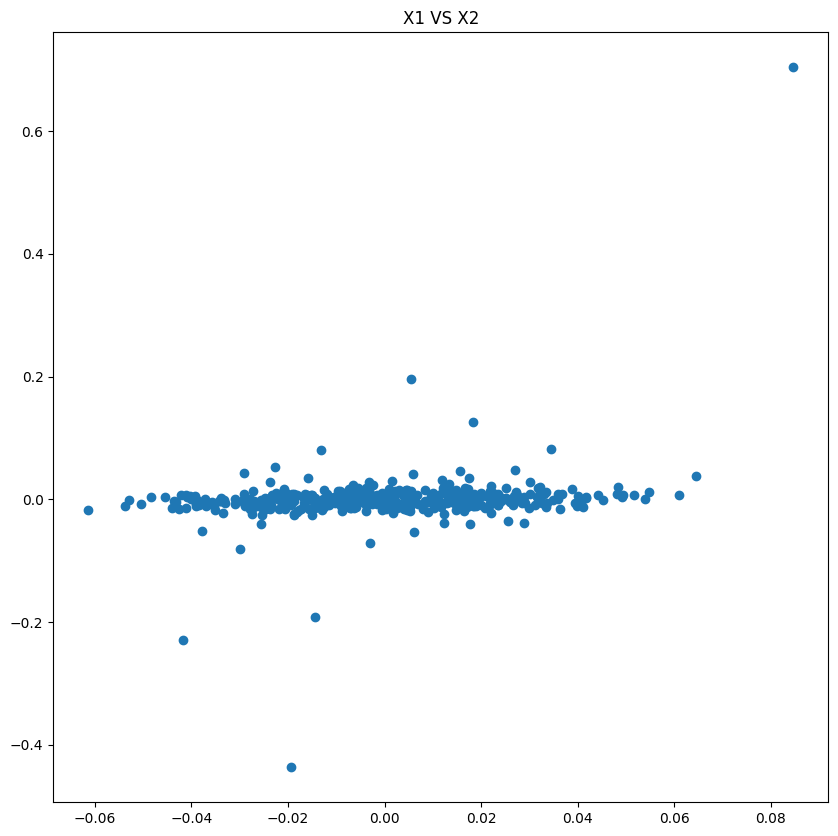

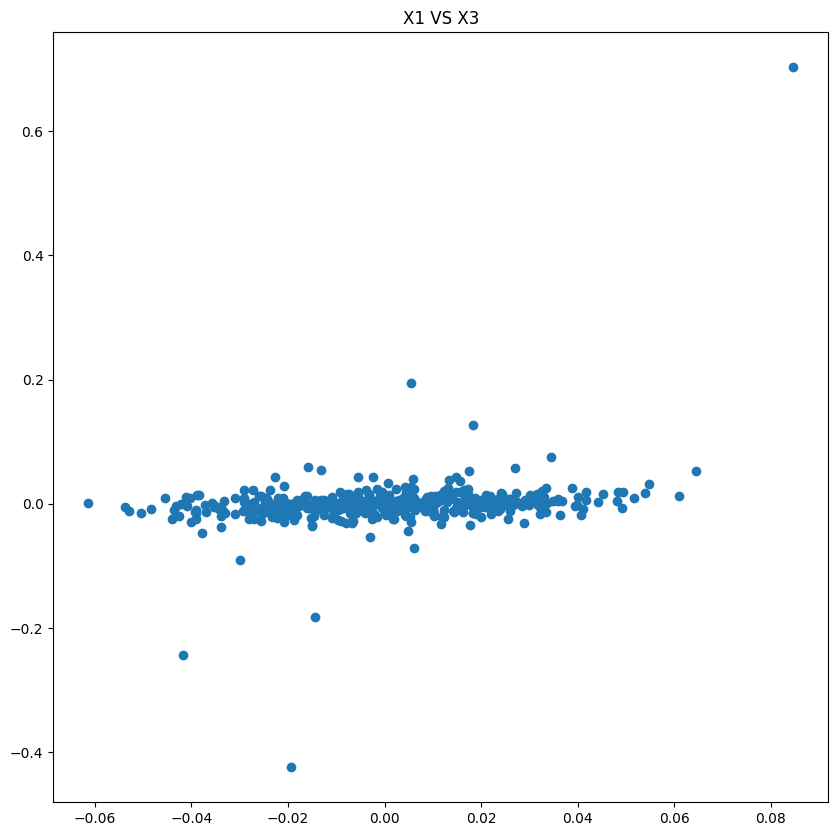

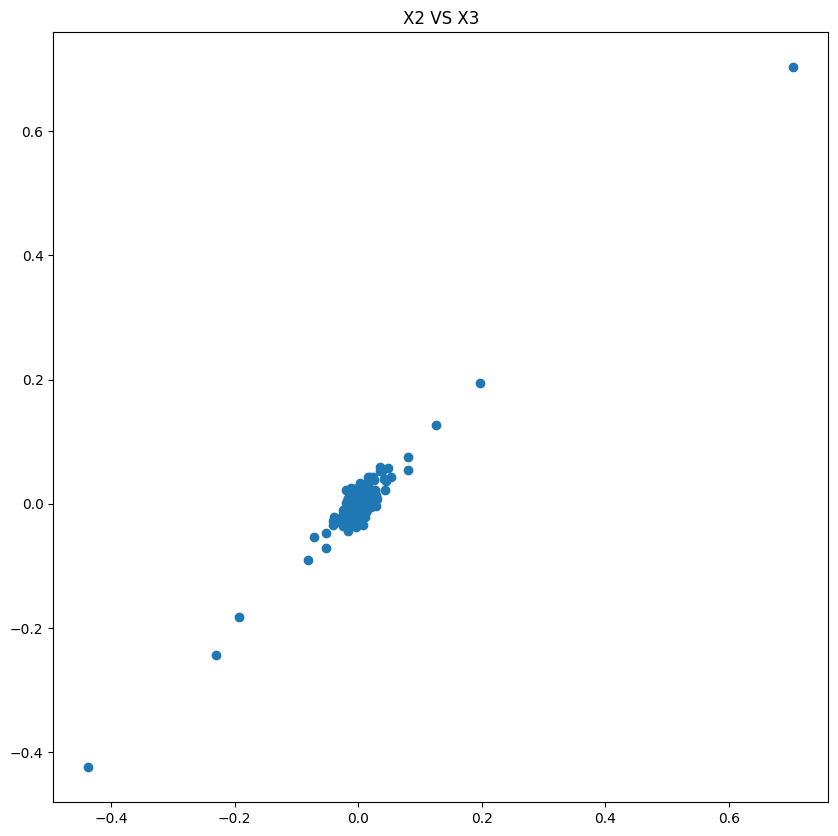

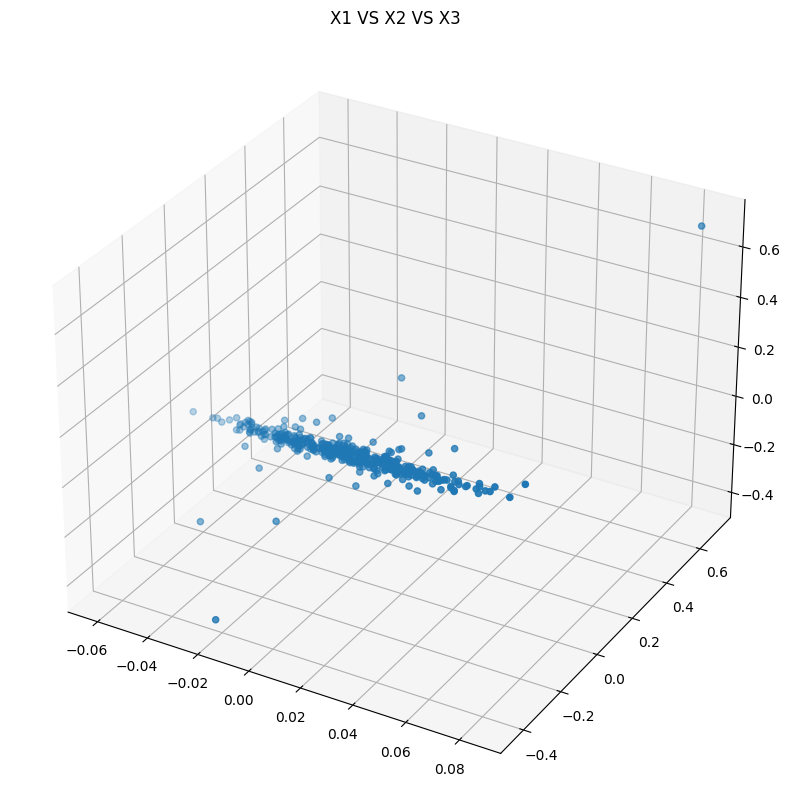

In [41]:
U, loss, outputs = solver.test(views, apply_linear_gcca)
for i in range(len(outputs)):
    outputs[i] = outputs[i].cpu()
for i in range(3):
    for j in range(i+1,3):
        plt.figure(figsize=(10,10))
        plt.scatter(outputs[i],outputs[j])
        plt.title('X'+str(i+1)+' VS X'+str(j+1))
        plt.show()
fig = plt.figure(figsize=(10,10))
ax3d = fig.add_subplot(projection='3d')
ax3d.scatter(outputs[0],outputs[1],outputs[2]) 
plt.title('X1 VS X2 VS X3')
plt.show()


In [32]:
from GCCA import gcca
import logging
import numpy as np

# set log level
logging.root.setLevel(level=logging.INFO)

# create data in advance
a = np.random.rand(50, 50)
b = np.random.rand(50, 60)
c = np.random.rand(50, 70)
d = np.random.rand(50, 80)
e = np.random.rand(50, 90)
f = np.random.rand(50, 100)
g = np.random.rand(50, 110)
h = np.random.rand(50, 120)
i = np.random.rand(50, 130)
j = np.random.rand(50, 140)
k = np.random.rand(50, 150)

# create instance of GCCA
gcca = GCCA()
# calculate GCCA
gcca.fit(a, b, c, d, e, f, g, h, i, j, k)
# transform
gcca.transform(a, b, c, d, e, f, g, h, i, j, k)
# save
gcca.save_params("save/gcca.h5")
# load
gcca.load_params("save/gcca.h5")
# plot
gcca.plot_gcca_result()

ModuleNotFoundError: No module named 'cca'